# Generation apple images with infoGAN

We first import the necesary packages

In [1]:
import os
from util import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import load_img
import natsort
from lib import gan
from infogan_rgb import *


## Functions in utils
"get_path_to_images": Function to abtain the path of each image according to it's category, along with the name of each corresponding folder.

"display_one","display_two", "display_one_gray": Functions to display images

"get_images" : Gets a numpy array of rgb images from a list of lists of paths

"unison_shuffled_copies": shuffles two arrays at unison, useul to shuffle date before feeding it in the taining phase.


In [2]:
# get "current working direntory"
cwd = os.getcwd()
image_path = cwd + '\\Apple_lite'

list_of_list_of_paths_to_img, folders_names = get_path_to_images(image_path)

# Miremos lo que GetPathToImages nos entrga 
print(list_of_list_of_paths_to_img[0][0],'\n\n',folders_names)
print('\We have ',len(list_of_list_of_paths_to_img),' lists to paths of apple images')
print('\nWe have ',len(folders_names),' categories of apples')

C:\Users\Marcos\Desktop\Recordando mis cursos de machine learning\Tarea 3\Tarea 3 Marcos Hermosilla\Apple_lite\Apple Braeburn\0_100.jpg 

 ['Apple Braeburn', 'Apple Golden 1', 'Apple Granny Smith', 'Apple Red Delicious']

Tenemos  4  listas a paths de imágenes de manzanas

Tenemos  4  categorias de manzanas


We create a dictionary that for each key (type of apple) has a list of the paths to each image of that category of apple

In [3]:
paths_to_images_dic = dict(zip(folders_names, list_of_list_of_paths_to_img))

We create a list listing all the apple classes

In [4]:
apple_classes = list(range(len(folders_names)))

## Number of images in each class

We define the labels and print the number of images in each folder.

In [ ]:
i = 0
apple_labels = []
for key, file_paths in paths_to_images_dic.items():
    print("# Elements in category",'-',key, ":", len(file_paths))
    apple_labels = apple_labels +  [apple_classes[i]]*len(file_paths)
    i = i + 1

Transform the labels to the same format as the MNIST labels (original GAN used in that dataset)

In [6]:
apple_labels = np.array(apple_labels)
apple_labels = apple_labels.astype('uint8')

#Guardar apple_labels en numpy
with open('apple_labels.npy', 'wb') as f:
    np.save(f, np.array(apple_labels))

We can calculate the total number of images/tags as:

In [7]:
print(len(apple_labels))

2608


## Load images and resize to 64x64

We use the get_images function to get a list of rgb array lists. We pass everything to an np.float32 array of shape (8538, n, n, 3) with n the size chosen for the images, the original ones are 100x100, if the computer can, in principle we can use the 100x100 ones, in case of that the computer cannot, we can choose a smaller n. 

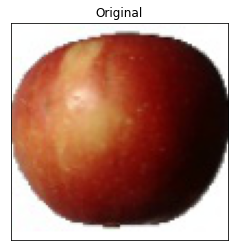

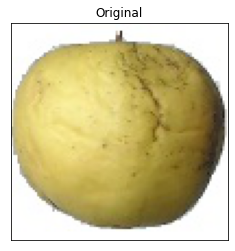

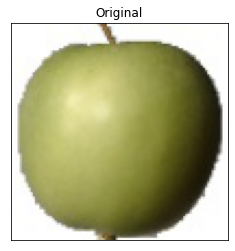

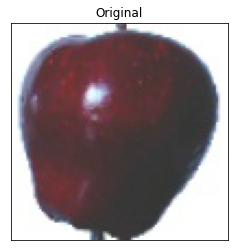

list_of_list_of_rgb_images_arrays is type =  <class 'list'>  and lenght  4
list_of_list_of_rgb_images_arrays[0] is type =  <class 'list'>  and lenght  656
list_of_list_of_rgb_images_arrays[0][0] is type =  <class 'numpy.ndarray'>  and shape  (100, 100, 3)


In [8]:
n = 100
list_of_list_of_rgb_images_arrays = get_images(list_of_list_of_paths_to_img, n)
aux_llrgb = list_of_list_of_rgb_images_arrays
print('list_of_list_of_rgb_images_arrays is type = ', type(aux_llrgb),' and lenght ', len(aux_llrgb))
print('list_of_list_of_rgb_images_arrays[0] is type = ', type(aux_llrgb[0]),' and lenght ', len(aux_llrgb[0]))
print('list_of_list_of_rgb_images_arrays[0][0] is type = ', type(aux_llrgb[0][0]),' and shape ', aux_llrgb[0][0].shape)

In [9]:
image_size = list_of_list_of_rgb_images_arrays[0][0].shape[0]

# reshape de (100, 100, 3) a (-1,100, 100, 3)

aux = np.zeros((len(apple_labels), image_size, image_size, 3), dtype = np.float32)
i = 0
for list_of_rgb_images_arrays in list_of_list_of_rgb_images_arrays:
    for rgb_image_array in list_of_rgb_images_arrays:
        aux[i] = rgb_image_array
        i += 1
        
img_array = aux

print(img_array.shape)  


(2608, 100, 100, 3)


In [10]:

#Save numpy images 

with open('Manzanas_' + str(n) + '.npy', 'wb') as f:
    np.save(f, np.array(img_array))
    

## Load numpy files with images and labels

Section to load the images according to the chosen number

In [11]:
n = 100

with open('Manzanas_' + str(n) + '.npy', 'rb') as f:
    img_array = np.load(f)
    
with open('apple_labels.npy', 'rb') as f:
    apple_labels = np.load(f)

## Train InfoGAN

We use the infoGAN implementation of "Advanced Deep Learning with Keras", originally used on the MNIST dataset, here I have adjusted the functions to work with rgb images and generate the necessary number of categories

I used 20000 or 40000 training steps, I trained one of n=32 n=64 and n=100.

Credits to the original paper by infoGAN:

"Unsupervised representation learning with deep convolutional generative adversarial networks." arXiv preprint arXiv:1511.06434 (2015)

In [ ]:

my_latent_size = 200

build_and_train_models(img_array, apple_labels, latent_size=my_latent_size, train_steps_in=20000)

sigmoid
Model: "discriminator"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 discriminator_input (InputLaye  [(None, 100, 100, 3  0          []                               
 r)                             )]                                                                
                                                                                                  
 leaky_re_lu (LeakyReLU)        (None, 100, 100, 3)  0           ['discriminator_input[0][0]']    
                                                                                                  
 conv2d (Conv2D)                (None, 50, 50, 32)   2432        ['leaky_re_lu[0][0]']            
                                                                                                  
 leaky_re_lu_1 (LeakyReLU)      (None, 50, 50, 32)   0           ['conv2d[0][0

                                                                                                  
 activation_3 (Activation)      (None, 100, 100, 32  0           ['batch_normalization_2[0][0]']  
                                )                                                                 
                                                                                                  
 conv2d_transpose_2 (Conv2DTran  (None, 100, 100, 16  12816      ['activation_3[0][0]']           
 spose)                         )                                                                 
                                                                                                  
 batch_normalization_3 (BatchNo  (None, 100, 100, 16  64         ['conv2d_transpose_2[0][0]']     
 rmalization)                   )                                                                 
                                                                                                  
 activatio

C:\Users\Marcos\anaconda3\envs\tf_gpu\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Model: "infogan_apples_img_size_100"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 z_input (InputLayer)           [(None, 200)]        0           []                               
                                                                                                  
 labels (InputLayer)            [(None, 4)]          0           []                               
                                                                                                  
 code1 (InputLayer)             [(None, 1)]          0           []                               
                                                                                                  
 code2 (InputLayer)             [(None, 1)]          0           []                               
                                                                        

32: [dis: 0.930423, bce: 0.060214, ce: 0.888804, mi: -0.001189, mi:-0.036000, acc: 0.578125] [adv: 1.196279, bce: 0.024411, ce: 1.184159, mi: 0.000712, mi:-0.025293, acc: 0.390625]
33: [dis: 0.880169, bce: 0.050714, ce: 0.809071, mi: 0.025467, mi:0.015300, acc: 0.648438] [adv: 1.095373, bce: 0.013992, ce: 1.114240, mi: -0.017957, mi:-0.047761, acc: 0.468750]
34: [dis: 0.849812, bce: 0.055036, ce: 0.794554, mi: -0.029531, mi:0.029974, acc: 0.617188] [adv: 1.108120, bce: 0.011061, ce: 1.099313, mi: 0.006365, mi:-0.010873, acc: 0.640625]
35: [dis: 0.863510, bce: 0.041464, ce: 0.779979, mi: 0.059882, mi:0.024252, acc: 0.625000] [adv: 1.120615, bce: 0.002988, ce: 1.118228, mi: -0.012626, mi:0.011425, acc: 0.421875]
36: [dis: 0.938638, bce: 0.040170, ce: 0.890501, mi: 0.033253, mi:-0.017319, acc: 0.554688] [adv: 2.634633, bce: 0.009832, ce: 2.635776, mi: -0.035764, mi:0.013815, acc: 0.234375]
37: [dis: 1.871239, bce: 0.031919, ce: 1.854133, mi: -0.013873, mi:-0.015753, acc: 0.476562] [adv: 1

78: [dis: 0.859133, bce: 0.010915, ce: 0.927532, mi: 0.025906, mi:-0.184535, acc: 0.539062] [adv: 1.337925, bce: 0.001034, ce: 1.404893, mi: 0.005439, mi:-0.141442, acc: 0.531250]
79: [dis: 2.415049, bce: 0.223631, ce: 1.984309, mi: -0.013740, mi:0.427960, acc: 0.445312] [adv: 1.127766, bce: 0.890959, ce: 0.313636, mi: -0.039853, mi:-0.113805, acc: 0.890625]
80: [dis: 1.416124, bce: 0.060416, ce: 1.337043, mi: -0.054632, mi:0.091961, acc: 0.460938] [adv: 0.287798, bce: 0.000744, ce: 0.291143, mi: 0.005444, mi:-0.013622, acc: 0.875000]
81: [dis: 1.149882, bce: 0.051421, ce: 1.161973, mi: -0.019113, mi:-0.107911, acc: 0.523438] [adv: 0.244726, bce: 0.003216, ce: 0.379794, mi: -0.023220, mi:-0.253347, acc: 0.812500]
82: [dis: 1.053901, bce: 0.019705, ce: 1.009017, mi: -0.014957, mi:0.065315, acc: 0.500000] [adv: 0.154523, bce: 0.064263, ce: 0.069233, mi: 0.001568, mi:0.040485, acc: 1.000000]
83: [dis: 0.981591, bce: 0.029026, ce: 0.959774, mi: -0.030725, mi:0.016307, acc: 0.460938] [adv: 

123: [dis: 0.747557, bce: 0.006922, ce: 0.696458, mi: -0.009526, mi:0.097881, acc: 0.750000] [adv: -1.077222, bce: 0.078548, ce: 0.175390, mi: -0.875572, mi:-1.786748, acc: 0.921875]
124: [dis: 0.653618, bce: 0.006762, ce: 0.720581, mi: -0.078010, mi:-0.069441, acc: 0.593750] [adv: -0.939827, bce: 0.004961, ce: 0.098843, mi: -1.047342, mi:-1.039919, acc: 0.968750]
125: [dis: 0.761823, bce: 0.005374, ce: 0.745370, mi: -0.111202, mi:0.133359, acc: 0.609375] [adv: -1.448374, bce: 0.033372, ce: 0.057462, mi: -1.021869, mi:-2.056546, acc: 0.968750]
126: [dis: 0.665014, bce: 0.009428, ce: 0.733718, mi: 0.088588, mi:-0.244850, acc: 0.625000] [adv: -0.638710, bce: 0.000320, ce: 0.075016, mi: -0.288778, mi:-1.139315, acc: 0.968750]
127: [dis: 0.814540, bce: 0.013428, ce: 0.679828, mi: 0.125150, mi:0.117417, acc: 0.640625] [adv: -0.841322, bce: 0.008658, ce: 0.102947, mi: -0.927168, mi:-0.978686, acc: 0.953125]
128: [dis: 0.679708, bce: 0.007143, ce: 0.676027, mi: -0.142344, mi:0.135420, acc: 0.

168: [dis: 0.463093, bce: 0.001172, ce: 0.505418, mi: -0.095266, mi:0.008273, acc: 0.765625] [adv: -1.960974, bce: 0.158605, ce: 0.005581, mi: -2.059952, mi:-2.190368, acc: 1.000000]
169: [dis: 0.318367, bce: 0.002761, ce: 0.437175, mi: -0.012489, mi:-0.230650, acc: 0.882812] [adv: -1.664265, bce: 0.094525, ce: 0.019085, mi: -2.487497, mi:-1.068251, acc: 0.984375]
170: [dis: 0.465326, bce: 0.002619, ce: 0.369185, mi: 0.178424, mi:0.008621, acc: 0.960938] [adv: -1.628875, bce: 0.508799, ce: 0.000475, mi: -1.955235, mi:-2.321062, acc: 1.000000]
171: [dis: 0.601504, bce: 0.001997, ce: 0.377778, mi: 0.118501, mi:0.324957, acc: 0.968750] [adv: -1.674041, bce: 0.016932, ce: 0.246722, mi: -1.766684, mi:-2.108706, acc: 0.984375]
172: [dis: 0.833238, bce: 0.001855, ce: 0.817347, mi: 0.017934, mi:0.010140, acc: 0.640625] [adv: -1.282312, bce: 0.009845, ce: 0.839792, mi: -1.486236, mi:-2.777660, acc: 0.890625]
173: [dis: 1.278778, bce: 0.204283, ce: 1.060318, mi: 0.112052, mi:-0.083697, acc: 0.57

212: [dis: 0.064135, bce: 0.000363, ce: 0.275632, mi: -0.050510, mi:-0.373210, acc: 0.890625] [adv: -1.421714, bce: 0.004527, ce: 0.030197, mi: -1.685662, mi:-1.227212, acc: 0.984375]
213: [dis: 2.286740, bce: 0.000002, ce: 2.362466, mi: -0.223602, mi:0.072147, acc: 0.523438] [adv: -1.775170, bce: 0.001092, ce: 0.139935, mi: -2.184692, mi:-1.647702, acc: 0.984375]
214: [dis: 0.096254, bce: 0.006190, ce: 0.475150, mi: -0.486287, mi:-0.283887, acc: 0.820312] [adv: -2.091944, bce: 0.000034, ce: 0.016359, mi: -1.092026, mi:-3.124648, acc: 0.984375]
215: [dis: -0.381561, bce: 0.014548, ce: 0.282658, mi: -0.408504, mi:-0.949030, acc: 0.906250] [adv: -2.244987, bce: 0.024321, ce: 0.032268, mi: -1.263895, mi:-3.339257, acc: 0.984375]
216: [dis: 0.448857, bce: 0.000405, ce: 0.226818, mi: 0.275692, mi:0.167576, acc: 0.937500] [adv: -2.841594, bce: 0.000046, ce: 0.001296, mi: -3.542351, mi:-2.143521, acc: 1.000000]
217: [dis: -0.088430, bce: 0.000375, ce: 0.086694, mi: 0.081148, mi:-0.432146, acc

257: [dis: -1.065031, bce: 0.000293, ce: 0.010940, mi: -1.241698, mi:-0.910830, acc: 1.000000] [adv: -2.856855, bce: 0.000005, ce: 0.174226, mi: -3.200239, mi:-2.861934, acc: 0.984375]
258: [dis: -0.584426, bce: 0.000009, ce: 0.020641, mi: -0.818124, mi:-0.392029, acc: 0.992188] [adv: -3.231252, bce: 0.005006, ce: 0.000005, mi: -3.543760, mi:-2.928767, acc: 1.000000]
259: [dis: -0.713818, bce: 0.000870, ce: 0.029073, mi: -1.146830, mi:-0.340693, acc: 0.984375] [adv: -1.417712, bce: 0.020264, ce: 0.305142, mi: -1.680059, mi:-1.806176, acc: 0.968750]
260: [dis: -1.065783, bce: 0.000065, ce: 0.001395, mi: -0.584912, mi:-1.549575, acc: 1.000000] [adv: -3.063901, bce: 0.000265, ce: 0.004829, mi: -3.313982, mi:-2.824008, acc: 1.000000]
261: [dis: -0.842719, bce: 0.000317, ce: 0.014421, mi: -1.565075, mi:-0.149840, acc: 0.992188] [adv: -2.945962, bce: 0.000001, ce: 0.000279, mi: -3.538181, mi:-2.354305, acc: 1.000000]
262: [dis: -1.800805, bce: 0.000226, ce: 0.000924, mi: -1.965136, mi:-1.638

301: [dis: -2.140736, bce: 0.000039, ce: 0.028582, mi: -2.147754, mi:-2.190961, acc: 0.992188] [adv: -3.100829, bce: 0.000239, ce: 0.000000, mi: -3.082827, mi:-3.119308, acc: 1.000000]
302: [dis: -0.998226, bce: 0.000008, ce: 0.000040, mi: -0.811800, mi:-1.184748, acc: 1.000000] [adv: -2.420255, bce: 0.000009, ce: 0.000000, mi: -3.007552, mi:-1.832975, acc: 1.000000]
303: [dis: -1.275058, bce: 0.000020, ce: 0.000145, mi: -1.649075, mi:-0.901373, acc: 1.000000] [adv: -2.433903, bce: 0.000041, ce: 0.000000, mi: -1.964372, mi:-2.903515, acc: 1.000000]
304: [dis: -0.829931, bce: 0.000049, ce: 0.000075, mi: -0.490893, mi:-1.169218, acc: 1.000000] [adv: -2.141046, bce: 0.000006, ce: 0.013119, mi: -2.221175, mi:-2.087165, acc: 0.984375]
305: [dis: -0.729389, bce: 0.000009, ce: 0.000063, mi: -1.110675, mi:-0.348247, acc: 1.000000] [adv: -2.052227, bce: 0.000038, ce: 0.000123, mi: -2.252406, mi:-1.852372, acc: 1.000000]
306: [dis: -1.285523, bce: 0.000178, ce: 0.000027, mi: -1.685115, mi:-0.886

346: [dis: -1.680274, bce: 0.000145, ce: 0.009944, mi: -1.729789, mi:-1.650935, acc: 0.992188] [adv: -3.124210, bce: 0.000010, ce: 0.000000, mi: -3.101350, mi:-3.147090, acc: 1.000000]
347: [dis: -1.532624, bce: 0.000009, ce: 0.000006, mi: -1.251330, mi:-1.813950, acc: 1.000000] [adv: -3.039777, bce: 0.001651, ce: 0.003162, mi: -3.238274, mi:-2.850905, acc: 1.000000]
348: [dis: -1.205001, bce: 0.000081, ce: 0.000095, mi: -1.154431, mi:-1.255925, acc: 1.000000] [adv: -2.530985, bce: 0.000236, ce: 0.006887, mi: -2.296771, mi:-2.779445, acc: 1.000000]
349: [dis: -1.850409, bce: 0.000095, ce: 0.028003, mi: -2.473543, mi:-1.283470, acc: 0.984375] [adv: -3.248919, bce: 0.000029, ce: 0.000000, mi: -2.663204, mi:-3.834692, acc: 1.000000]
350: [dis: -1.922361, bce: 0.000233, ce: 0.020919, mi: -2.340267, mi:-1.546760, acc: 0.992188] [adv: -2.748736, bce: 0.003138, ce: 0.000032, mi: -2.584743, mi:-2.919068, acc: 1.000000]
351: [dis: 0.084924, bce: 0.000020, ce: 1.012404, mi: -0.392189, mi:-1.4628

391: [dis: -1.468372, bce: 0.000382, ce: 0.000028, mi: -1.483410, mi:-1.454155, acc: 1.000000] [adv: -3.450189, bce: 0.000001, ce: 0.000000, mi: -3.654215, mi:-3.246164, acc: 1.000000]
392: [dis: -1.824664, bce: 0.000369, ce: 0.000057, mi: -1.360744, mi:-2.289438, acc: 1.000000] [adv: -3.006633, bce: 0.000017, ce: 0.000092, mi: -3.292665, mi:-2.720819, acc: 1.000000]
393: [dis: -1.700239, bce: 0.001173, ce: 0.000860, mi: -1.747836, mi:-1.656708, acc: 1.000000] [adv: -2.294028, bce: 0.000003, ce: 0.000000, mi: -2.564829, mi:-2.023232, acc: 1.000000]
394: [dis: -0.691684, bce: 0.000054, ce: 0.010129, mi: -0.650143, mi:-0.753593, acc: 0.992188] [adv: -3.032293, bce: 0.000002, ce: 0.005145, mi: -3.418716, mi:-2.656163, acc: 1.000000]
395: [dis: -1.679448, bce: 0.005658, ce: 0.023681, mi: -1.939528, mi:-1.478046, acc: 0.992188] [adv: -2.501087, bce: 0.069100, ce: 0.000000, mi: -2.522095, mi:-2.618279, acc: 1.000000]
396: [dis: -1.610738, bce: 0.001258, ce: 0.057872, mi: -1.005442, mi:-2.334

435: [dis: -2.153293, bce: 0.009331, ce: 0.000084, mi: -1.898857, mi:-2.426558, acc: 1.000000] [adv: -2.720551, bce: 0.743166, ce: 0.000004, mi: -3.536439, mi:-3.391003, acc: 1.000000]
436: [dis: -1.476758, bce: 0.013076, ce: 0.000618, mi: -1.922550, mi:-1.058354, acc: 1.000000] [adv: -2.394650, bce: 0.549460, ce: 0.000035, mi: -3.786112, mi:-2.102180, acc: 1.000000]
437: [dis: -1.359372, bce: 0.008837, ce: 0.001685, mi: -1.399884, mi:-1.339905, acc: 1.000000] [adv: -2.360416, bce: 0.332779, ce: 0.055334, mi: -3.312925, mi:-2.184133, acc: 0.984375]
438: [dis: -1.657945, bce: 0.007322, ce: 0.022652, mi: -1.836579, mi:-1.539259, acc: 0.984375] [adv: -3.034500, bce: 0.516078, ce: 0.001885, mi: -3.165010, mi:-3.939917, acc: 1.000000]
439: [dis: -1.165112, bce: 0.006665, ce: 0.002803, mi: -0.975171, mi:-1.373989, acc: 1.000000] [adv: -3.059088, bce: 0.206143, ce: 0.004435, mi: -3.499621, mi:-3.039711, acc: 1.000000]
440: [dis: -1.757705, bce: 0.007155, ce: 0.000527, mi: -1.777299, mi:-1.753

480: [dis: -2.852666, bce: 0.015165, ce: 0.000563, mi: -3.567130, mi:-2.169657, acc: 1.000000] [adv: -2.527165, bce: 0.023099, ce: 0.000084, mi: -2.790267, mi:-2.310428, acc: 1.000000]
481: [dis: -1.280305, bce: 0.010819, ce: 0.000332, mi: -1.182440, mi:-1.400471, acc: 1.000000] [adv: -2.701970, bce: 0.051913, ce: 0.001686, mi: -2.762892, mi:-2.748245, acc: 1.000000]
482: [dis: -1.534560, bce: 0.007943, ce: 0.000007, mi: -2.111598, mi:-0.973420, acc: 1.000000] [adv: -2.411113, bce: 0.219654, ce: 0.006024, mi: -3.222748, mi:-2.050834, acc: 1.000000]
483: [dis: -0.960823, bce: 0.016608, ce: 0.005592, mi: -1.487034, mi:-0.479012, acc: 1.000000] [adv: -2.583638, bce: 0.041730, ce: 0.000389, mi: -2.416251, mi:-2.835263, acc: 1.000000]
484: [dis: -1.945274, bce: 0.009983, ce: 0.011511, mi: -1.505132, mi:-2.428406, acc: 0.992188] [adv: -3.197967, bce: 0.102407, ce: 0.071246, mi: -3.424051, mi:-3.319188, acc: 0.984375]
485: [dis: -1.730514, bce: 0.008453, ce: 0.000038, mi: -1.737157, mi:-1.740

524: [dis: -1.508530, bce: 0.002002, ce: 0.000275, mi: -1.346233, mi:-1.675381, acc: 1.000000] [adv: -2.128981, bce: 0.022210, ce: 0.121767, mi: -2.044232, mi:-2.501683, acc: 0.984375]
525: [dis: -1.354492, bce: 0.001209, ce: 0.001218, mi: -0.633310, mi:-2.080526, acc: 1.000000] [adv: -3.271408, bce: 0.101981, ce: 0.001439, mi: -3.498416, mi:-3.251239, acc: 1.000000]
526: [dis: -1.121644, bce: 0.004759, ce: 0.000169, mi: -1.392426, mi:-0.860717, acc: 1.000000] [adv: -2.953826, bce: 0.005274, ce: 0.000611, mi: -2.599741, mi:-3.319681, acc: 1.000000]
527: [dis: -0.423993, bce: 0.005122, ce: 0.000230, mi: -0.277354, mi:-0.581336, acc: 1.000000] [adv: -2.957005, bce: 0.011170, ce: 0.001780, mi: -3.426860, mi:-2.513048, acc: 1.000000]
528: [dis: -1.740039, bce: 0.001769, ce: 0.031134, mi: -1.943950, mi:-1.601934, acc: 0.992188] [adv: -2.326540, bce: 0.094437, ce: 0.001979, mi: -2.212888, mi:-2.633023, acc: 1.000000]
529: [dis: -1.831059, bce: 0.004587, ce: 0.005814, mi: -1.649119, mi:-2.033

569: [dis: -1.218417, bce: 0.001273, ce: 0.000037, mi: -1.354294, mi:-1.085160, acc: 1.000000] [adv: -3.161242, bce: 0.053745, ce: 0.002660, mi: -2.467149, mi:-3.968145, acc: 1.000000]
570: [dis: -1.347228, bce: 0.041821, ce: 0.000164, mi: -1.378101, mi:-1.400324, acc: 1.000000] [adv: -2.464768, bce: 0.115387, ce: 0.012437, mi: -3.212541, mi:-1.972642, acc: 1.000000]
571: [dis: -1.870963, bce: 0.012681, ce: 0.000089, mi: -2.966064, mi:-0.801401, acc: 1.000000] [adv: -2.575734, bce: 0.014507, ce: 0.046724, mi: -3.406767, mi:-1.867163, acc: 0.968750]
572: [dis: -1.401178, bce: 0.000233, ce: 0.025918, mi: -1.206428, mi:-1.648229, acc: 0.992188] [adv: -2.555120, bce: 0.141892, ce: 0.148449, mi: -3.418176, mi:-2.272746, acc: 0.984375]
573: [dis: -1.591275, bce: 0.001292, ce: 0.035499, mi: -1.490794, mi:-1.765338, acc: 0.984375] [adv: -2.940386, bce: 0.049439, ce: 0.020628, mi: -2.575048, mi:-3.445858, acc: 0.984375]
574: [dis: -0.546481, bce: 0.006371, ce: 0.000781, mi: -0.365249, mi:-0.742

613: [dis: -1.574397, bce: 0.005994, ce: 0.000203, mi: -1.407604, mi:-1.753585, acc: 1.000000] [adv: -2.391061, bce: 0.261759, ce: 0.003851, mi: -2.815760, mi:-2.497582, acc: 1.000000]
614: [dis: -1.569088, bce: 0.004348, ce: 0.001159, mi: -2.002137, mi:-1.147053, acc: 1.000000] [adv: -2.214374, bce: 0.775697, ce: 0.005921, mi: -3.436091, mi:-2.555893, acc: 1.000000]
615: [dis: -1.270827, bce: 0.013661, ce: 0.001040, mi: -1.721073, mi:-0.849985, acc: 1.000000] [adv: -2.341169, bce: 0.210183, ce: 0.054186, mi: -3.506053, mi:-1.705024, acc: 0.984375]
616: [dis: -1.240328, bce: 0.005654, ce: 0.000911, mi: -1.630580, mi:-0.863205, acc: 1.000000] [adv: -1.895600, bce: 0.357345, ce: 0.003240, mi: -2.203390, mi:-2.308980, acc: 1.000000]
617: [dis: -0.965929, bce: 0.007076, ce: 0.010103, mi: -0.078292, mi:-1.887925, acc: 0.992188] [adv: -2.245326, bce: 0.413191, ce: 0.025470, mi: -3.358120, mi:-2.009853, acc: 0.984375]
618: [dis: -0.908924, bce: 0.043546, ce: 0.000331, mi: -1.004131, mi:-0.901

658: [dis: -1.457802, bce: 0.025284, ce: 0.021874, mi: -1.314225, mi:-1.695696, acc: 0.992188] [adv: -0.284294, bce: 2.116028, ce: 0.033215, mi: -2.182661, mi:-2.684414, acc: 0.984375]
659: [dis: -2.725507, bce: 0.021447, ce: 0.005105, mi: -2.287652, mi:-3.216467, acc: 1.000000] [adv: -0.263164, bce: 2.684471, ce: 0.014845, mi: -3.385643, mi:-2.539315, acc: 1.000000]
660: [dis: -2.098119, bce: 0.018614, ce: 0.026377, mi: -2.437639, mi:-1.848579, acc: 0.992188] [adv: -1.508037, bce: 1.815481, ce: 0.002063, mi: -3.977736, mi:-2.673426, acc: 1.000000]
661: [dis: -1.770794, bce: 0.016910, ce: 0.001478, mi: -1.852503, mi:-1.725862, acc: 1.000000] [adv: -0.840530, bce: 1.989885, ce: 0.003060, mi: -3.317057, mi:-2.349893, acc: 1.000000]
662: [dis: -1.322795, bce: 0.016749, ce: 0.006221, mi: -1.719878, mi:-0.971651, acc: 1.000000] [adv: -1.901031, bce: 1.282956, ce: 0.035844, mi: -2.701366, mi:-3.738296, acc: 0.984375]
663: [dis: -1.239801, bce: 0.021846, ce: 0.044624, mi: -1.570264, mi:-1.042

702: [dis: -1.648393, bce: 0.001063, ce: 0.000220, mi: -1.342585, mi:-1.956769, acc: 1.000000] [adv: -3.283501, bce: 0.018065, ce: 0.002039, mi: -3.145127, mi:-3.462081, acc: 1.000000]
703: [dis: -1.596614, bce: 0.000461, ce: 0.004362, mi: -0.969277, mi:-2.233596, acc: 1.000000] [adv: -2.890017, bce: 0.058391, ce: 0.020482, mi: -3.450023, mi:-2.487757, acc: 0.984375]
704: [dis: -1.070224, bce: 0.002101, ce: 0.025232, mi: -1.561700, mi:-0.633415, acc: 0.992188] [adv: -3.402114, bce: 0.009660, ce: 0.010581, mi: -2.662539, mi:-4.182171, acc: 1.000000]
705: [dis: -1.742285, bce: 0.005768, ce: 0.001957, mi: -1.494837, mi:-2.005184, acc: 1.000000] [adv: -3.036611, bce: 0.076706, ce: 0.000281, mi: -4.269829, mi:-1.957367, acc: 1.000000]
706: [dis: -1.026062, bce: 0.003789, ce: 0.000250, mi: -0.932147, mi:-1.128053, acc: 1.000000] [adv: -2.265711, bce: 0.006943, ce: 0.003126, mi: -2.428032, mi:-2.123530, acc: 1.000000]
707: [dis: -1.470992, bce: 0.098592, ce: 0.011227, mi: -1.950313, mi:-1.211

747: [dis: -1.387889, bce: 0.001274, ce: 0.000295, mi: -1.480693, mi:-1.298224, acc: 1.000000] [adv: -2.390943, bce: 0.065377, ce: 0.000244, mi: -2.872400, mi:-2.040728, acc: 1.000000]
748: [dis: -1.303581, bce: 0.001411, ce: 0.000654, mi: -1.479802, mi:-1.131490, acc: 1.000000] [adv: -2.314832, bce: 0.045847, ce: 0.000385, mi: -2.628718, mi:-2.093411, acc: 1.000000]
749: [dis: -1.390955, bce: 0.002120, ce: 0.000555, mi: -1.634189, mi:-1.153071, acc: 1.000000] [adv: -2.826791, bce: 0.024703, ce: 0.010957, mi: -3.428616, mi:-2.296286, acc: 1.000000]
750: [dis: -1.773257, bce: 0.001652, ce: 0.000189, mi: -1.778456, mi:-1.771742, acc: 1.000000] [adv: -3.844360, bce: 0.023301, ce: 0.000183, mi: -3.916434, mi:-3.819254, acc: 1.000000]
751: [dis: -1.425473, bce: 0.002254, ce: 0.000062, mi: -1.314869, mi:-1.540710, acc: 1.000000] [adv: -3.405513, bce: 0.034364, ce: 0.000457, mi: -2.683339, mi:-4.197330, acc: 1.000000]
752: [dis: -1.437104, bce: 0.001955, ce: 0.000451, mi: -1.346432, mi:-1.532

792: [dis: -1.210914, bce: 0.006024, ce: 0.001873, mi: -1.142412, mi:-1.295209, acc: 1.000000] [adv: -3.526706, bce: 0.038054, ce: 0.000049, mi: -3.269597, mi:-3.860022, acc: 1.000000]
793: [dis: -1.088589, bce: 0.016036, ce: 0.000056, mi: -1.047073, mi:-1.162290, acc: 1.000000] [adv: -3.062209, bce: 0.031356, ce: 0.000036, mi: -2.536372, mi:-3.650830, acc: 1.000000]
794: [dis: -1.277568, bce: 0.010554, ce: 0.000222, mi: -1.339528, mi:-1.237160, acc: 1.000000] [adv: -3.133184, bce: 0.162682, ce: 0.000005, mi: -3.456445, mi:-3.135298, acc: 1.000000]
795: [dis: -1.438205, bce: 0.030015, ce: 0.001498, mi: -1.368463, mi:-1.570973, acc: 1.000000] [adv: -2.670451, bce: 0.025110, ce: 0.000079, mi: -2.614568, mi:-2.776714, acc: 1.000000]
796: [dis: -1.307238, bce: 0.050801, ce: 0.046748, mi: -1.420978, mi:-1.388596, acc: 0.984375] [adv: 0.854980, bce: 2.091310, ce: 1.786100, mi: -4.049681, mi:-1.995180, acc: 0.796875]
797: [dis: 0.328722, bce: 1.474078, ce: 0.148509, mi: -0.893455, mi:-1.69427

836: [dis: -1.384212, bce: 0.013729, ce: 0.042936, mi: -1.219829, mi:-1.661927, acc: 0.984375] [adv: -1.152602, bce: 1.664082, ce: 0.014453, mi: -2.772078, mi:-2.890197, acc: 0.984375]
837: [dis: -1.605615, bce: 0.011547, ce: 0.001696, mi: -1.604395, mi:-1.633320, acc: 1.000000] [adv: -1.257807, bce: 1.486513, ce: 0.006881, mi: -2.996087, mi:-2.506315, acc: 1.000000]
838: [dis: -1.626209, bce: 0.009311, ce: 0.002424, mi: -1.827749, mi:-1.448139, acc: 1.000000] [adv: -1.310937, bce: 1.453252, ce: 0.017835, mi: -2.536057, mi:-3.027991, acc: 1.000000]
839: [dis: -1.827183, bce: 0.013157, ce: 0.001258, mi: -1.757989, mi:-1.925207, acc: 1.000000] [adv: -1.848416, bce: 1.224593, ce: 0.016803, mi: -3.715619, mi:-2.464007, acc: 1.000000]
840: [dis: -1.525789, bce: 0.014344, ce: 0.022337, mi: -1.502058, mi:-1.622881, acc: 0.992188] [adv: -1.301672, bce: 1.057637, ce: 0.058978, mi: -3.259136, mi:-1.577439, acc: 0.968750]
841: [dis: -1.836883, bce: 0.010776, ce: 0.000178, mi: -1.993976, mi:-1.701

881: [dis: -1.309782, bce: 0.021010, ce: 0.000500, mi: -1.051120, mi:-1.611465, acc: 1.000000] [adv: 0.350914, bce: 2.907225, ce: 0.042773, mi: -2.271375, mi:-2.926793, acc: 0.984375]
882: [dis: -1.759974, bce: 0.013921, ce: 0.000333, mi: -1.732650, mi:-1.815805, acc: 1.000000] [adv: -0.572462, bce: 1.984869, ce: 0.029014, mi: -2.142965, mi:-3.029725, acc: 0.984375]
883: [dis: -1.233382, bce: 0.022821, ce: 0.000149, mi: -1.149754, mi:-1.362948, acc: 1.000000] [adv: -0.015371, bce: 2.808795, ce: 0.004167, mi: -2.937668, mi:-2.718997, acc: 1.000000]
884: [dis: -1.699354, bce: 0.014965, ce: 0.000049, mi: -1.467726, mi:-1.961011, acc: 1.000000] [adv: -0.719366, bce: 1.742064, ce: 0.084521, mi: -2.271837, mi:-2.820065, acc: 0.984375]
885: [dis: -1.574195, bce: 0.021212, ce: 0.000048, mi: -1.643762, mi:-1.547147, acc: 1.000000] [adv: -0.287930, bce: 2.934248, ce: 0.054133, mi: -3.641618, mi:-2.911003, acc: 0.968750]
886: [dis: -1.541468, bce: 0.033928, ce: 0.000432, mi: -1.899377, mi:-1.2522

925: [dis: -1.378730, bce: 0.070908, ce: 0.002011, mi: -1.507887, mi:-1.395411, acc: 1.000000] [adv: -1.534827, bce: 1.525559, ce: 0.004604, mi: -3.289566, mi:-2.840414, acc: 1.000000]
926: [dis: -1.151498, bce: 0.106963, ce: 0.001834, mi: -1.088208, mi:-1.432382, acc: 1.000000] [adv: 2.677250, bce: 5.106040, ce: 0.000906, mi: -2.189803, mi:-2.669589, acc: 1.000000]
927: [dis: -0.891396, bce: 0.472452, ce: 0.000937, mi: -1.565257, mi:-1.164315, acc: 1.000000] [adv: -1.618209, bce: 0.602284, ce: 0.079506, mi: -1.662479, mi:-2.937519, acc: 0.953125]
928: [dis: -0.156518, bce: 1.533478, ce: 0.003903, mi: -1.494076, mi:-1.893724, acc: 1.000000] [adv: 4.748908, bce: 6.942486, ce: 0.090904, mi: -2.004688, mi:-2.564276, acc: 0.953125]
929: [dis: -1.107324, bce: 0.395205, ce: 0.003705, mi: -1.161090, mi:-1.851380, acc: 1.000000] [adv: -0.756275, bce: 1.705552, ce: 0.054022, mi: -2.202422, mi:-2.829277, acc: 0.968750]
930: [dis: -1.300021, bce: 0.288603, ce: 0.005913, mi: -1.646799, mi:-1.54227

970: [dis: -1.711060, bce: 0.052482, ce: 0.020528, mi: -1.612009, mi:-1.956131, acc: 0.992188] [adv: -0.559865, bce: 1.724422, ce: 0.066186, mi: -2.438041, mi:-2.262905, acc: 0.953125]
971: [dis: -1.435836, bce: 0.086520, ce: 0.001176, mi: -1.633209, mi:-1.413854, acc: 1.000000] [adv: -1.113448, bce: 1.564675, ce: 0.001855, mi: -2.542174, mi:-2.817782, acc: 1.000000]
972: [dis: -1.539741, bce: 0.044934, ce: 0.000498, mi: -1.545543, mi:-1.624803, acc: 1.000000] [adv: -1.219161, bce: 1.572989, ce: 0.017318, mi: -2.939014, mi:-2.679921, acc: 1.000000]
973: [dis: -1.218998, bce: 0.023592, ce: 0.000129, mi: -1.366598, mi:-1.118842, acc: 1.000000] [adv: -1.201924, bce: 1.646975, ce: 0.003968, mi: -3.156328, mi:-2.549407, acc: 1.000000]
974: [dis: -1.741861, bce: 0.051140, ce: 0.002501, mi: -1.862056, mi:-1.728949, acc: 1.000000] [adv: -2.173556, bce: 1.039016, ce: 0.007521, mi: -3.186787, mi:-3.253400, acc: 1.000000]
975: [dis: -0.969958, bce: 0.064078, ce: 0.000109, mi: -1.138639, mi:-0.929

1014: [dis: -1.878809, bce: 0.030356, ce: 0.001374, mi: -1.918972, mi:-1.902107, acc: 1.000000] [adv: -0.137190, bce: 2.297921, ce: 0.236472, mi: -2.858530, mi:-2.484637, acc: 0.937500]
1015: [dis: -2.111755, bce: 0.025809, ce: 0.005561, mi: -1.667078, mi:-2.619170, acc: 1.000000] [adv: -1.491093, bce: 2.024681, ce: 0.004148, mi: -3.436039, mi:-3.603805, acc: 1.000000]
1016: [dis: -0.926369, bce: 0.071257, ce: 0.000386, mi: -1.558582, mi:-0.437442, acc: 1.000000] [adv: -1.530964, bce: 0.709920, ce: 0.478253, mi: -2.488865, mi:-2.949410, acc: 0.843750]
1017: [dis: -1.337355, bce: 0.055132, ce: 0.000211, mi: -1.267624, mi:-1.517771, acc: 1.000000] [adv: -0.785899, bce: 2.933917, ce: 0.163658, mi: -4.232211, mi:-3.534736, acc: 0.968750]
1018: [dis: -2.010504, bce: 0.029935, ce: 0.007286, mi: -1.472734, mi:-2.622716, acc: 0.992188] [adv: -0.271553, bce: 2.649450, ce: 0.000201, mi: -2.999015, mi:-2.843391, acc: 1.000000]
1019: [dis: -1.876410, bce: 0.070759, ce: 0.004635, mi: -2.088091, mi:

1059: [dis: -1.325041, bce: 0.160872, ce: 0.001633, mi: -0.906740, mi:-2.068354, acc: 1.000000] [adv: -2.540297, bce: 0.192463, ce: 0.004308, mi: -2.348634, mi:-3.125503, acc: 1.000000]
1060: [dis: -1.291906, bce: 0.210030, ce: 0.001087, mi: -1.442840, mi:-1.563206, acc: 1.000000] [adv: 0.707348, bce: 3.753860, ce: 0.004931, mi: -3.239664, mi:-2.863221, acc: 1.000000]
1061: [dis: -1.390810, bce: 0.131491, ce: 0.000313, mi: -1.795203, mi:-1.250024, acc: 1.000000] [adv: -2.507226, bce: 0.356655, ce: 0.001125, mi: -2.946393, mi:-2.783619, acc: 1.000000]
1062: [dis: -1.237490, bce: 0.114466, ce: 0.000248, mi: -1.036453, mi:-1.667956, acc: 1.000000] [adv: -1.908708, bce: 1.286526, ce: 0.001034, mi: -2.663003, mi:-3.729533, acc: 1.000000]
1063: [dis: -1.479480, bce: 0.068402, ce: 0.001715, mi: -1.507365, mi:-1.591830, acc: 1.000000] [adv: -0.747601, bce: 2.298319, ce: 0.031591, mi: -2.734777, mi:-3.420245, acc: 0.984375]
1064: [dis: -1.375742, bce: 0.054602, ce: 0.000161, mi: -1.306272, mi:-

1103: [dis: 0.115582, bce: 1.255925, ce: 0.000248, mi: -1.258942, mi:-1.022241, acc: 1.000000] [adv: 1.256593, bce: 4.197304, ce: 0.119461, mi: -3.000771, mi:-3.119573, acc: 0.984375]
1104: [dis: -0.476476, bce: 0.787336, ce: 0.012799, mi: -1.687789, mi:-0.865431, acc: 1.000000] [adv: -2.640673, bce: 0.031780, ce: 0.004349, mi: -2.040820, mi:-3.312787, acc: 1.000000]
1105: [dis: -1.782832, bce: 0.024513, ce: 0.005521, mi: -1.660322, mi:-1.965410, acc: 1.000000] [adv: -2.392637, bce: 0.082857, ce: 0.000046, mi: -2.115137, mi:-2.835943, acc: 1.000000]
1106: [dis: -1.257211, bce: 0.016006, ce: 0.005855, mi: -1.106400, mi:-1.451743, acc: 1.000000] [adv: -2.950788, bce: 0.041768, ce: 0.024388, mi: -2.837510, mi:-3.196379, acc: 0.984375]
1107: [dis: -1.572396, bce: 0.022593, ce: 0.000211, mi: -1.680588, mi:-1.509814, acc: 1.000000] [adv: -2.450080, bce: 0.123665, ce: 0.000023, mi: -2.719097, mi:-2.428439, acc: 1.000000]
1108: [dis: -1.644372, bce: 0.019334, ce: 0.000421, mi: -1.821291, mi:-1

1148: [dis: -0.756040, bce: 0.059628, ce: 0.000247, mi: -1.268708, mi:-0.363122, acc: 1.000000] [adv: -2.151223, bce: 0.864614, ce: 0.029299, mi: -2.447043, mi:-3.643229, acc: 1.000000]
1149: [dis: -1.551886, bce: 0.066142, ce: 0.000205, mi: -1.719948, mi:-1.516519, acc: 1.000000] [adv: 0.266267, bce: 3.014728, ce: 0.036618, mi: -2.563887, mi:-3.006270, acc: 0.968750]
1150: [dis: -1.455791, bce: 0.085425, ce: 0.001124, mi: -1.672586, mi:-1.412095, acc: 1.000000] [adv: -3.348893, bce: 0.531064, ce: 0.012728, mi: -4.142413, mi:-3.642956, acc: 1.000000]
1151: [dis: -0.943531, bce: 0.093723, ce: 0.000924, mi: -1.117724, mi:-0.958632, acc: 1.000000] [adv: 0.790885, bce: 3.621472, ce: 0.109388, mi: -2.842362, mi:-3.037588, acc: 0.953125]
1152: [dis: -1.681860, bce: 0.092720, ce: 0.000412, mi: -1.605360, mi:-1.944625, acc: 1.000000] [adv: -2.385663, bce: 0.696616, ce: 0.023347, mi: -2.951148, mi:-3.260104, acc: 1.000000]
1153: [dis: -1.761579, bce: 0.114560, ce: 0.003930, mi: -1.432801, mi:-2

1193: [dis: -1.207152, bce: 0.211716, ce: 0.013971, mi: -1.109934, mi:-1.755745, acc: 0.992188] [adv: 0.282460, bce: 2.713831, ce: 0.026016, mi: -2.139979, mi:-2.774795, acc: 0.984375]
1194: [dis: -1.203706, bce: 0.130119, ce: 0.002725, mi: -1.135130, mi:-1.537969, acc: 1.000000] [adv: -3.360544, bce: 0.985341, ce: 0.000829, mi: -4.463654, mi:-4.229774, acc: 1.000000]
1195: [dis: -1.428977, bce: 0.138820, ce: 0.000862, mi: -1.622050, mi:-1.515266, acc: 1.000000] [adv: -0.108074, bce: 2.572382, ce: 0.001664, mi: -2.425174, mi:-2.939067, acc: 1.000000]
1196: [dis: -1.356050, bce: 0.123994, ce: 0.000040, mi: -1.634536, mi:-1.325633, acc: 1.000000] [adv: -2.479151, bce: 0.748424, ce: 0.005865, mi: -3.397009, mi:-3.069870, acc: 1.000000]
1197: [dis: -1.298290, bce: 0.118244, ce: 0.001336, mi: -1.420153, mi:-1.415589, acc: 1.000000] [adv: -0.638447, bce: 2.733304, ce: 0.003584, mi: -3.125146, mi:-3.625523, acc: 1.000000]
1198: [dis: -1.633581, bce: 0.139218, ce: 0.003286, mi: -2.115352, mi:-

1237: [dis: -0.910205, bce: 0.477154, ce: 0.003458, mi: -0.773505, mi:-2.008130, acc: 1.000000] [adv: -3.152986, bce: 0.199376, ce: 0.001854, mi: -2.863158, mi:-3.845273, acc: 1.000000]
1238: [dis: -0.936482, bce: 1.010254, ce: 0.015653, mi: -2.089322, mi:-1.835456, acc: 0.992188] [adv: 4.059576, bce: 7.395552, ce: 0.017981, mi: -3.493194, mi:-3.214720, acc: 0.984375]
1239: [dis: 0.228653, bce: 1.530701, ce: 0.020028, mi: -1.423131, mi:-1.221020, acc: 1.000000] [adv: -2.933357, bce: 0.409473, ce: 0.014572, mi: -3.504627, mi:-3.210177, acc: 0.984375]
1240: [dis: -0.881227, bce: 0.412753, ce: 0.003000, mi: -1.080610, mi:-1.513351, acc: 1.000000] [adv: 1.690264, bce: 4.203502, ce: 0.000142, mi: -2.981214, mi:-2.045547, acc: 1.000000]
1241: [dis: -1.330405, bce: 0.202007, ce: 0.000258, mi: -1.220047, mi:-1.845295, acc: 1.000000] [adv: -1.305380, bce: 1.783036, ce: 0.014321, mi: -3.152723, mi:-3.052752, acc: 0.984375]
1242: [dis: -1.115326, bce: 0.114411, ce: 0.000108, mi: -0.764701, mi:-1.

1282: [dis: -1.468260, bce: 0.107996, ce: 0.002856, mi: -1.931546, mi:-1.226678, acc: 1.000000] [adv: -0.797987, bce: 2.595721, ce: 0.000004, mi: -3.460608, mi:-3.326816, acc: 1.000000]
1283: [dis: -1.896547, bce: 0.100551, ce: 0.000025, mi: -2.115434, mi:-1.878813, acc: 1.000000] [adv: -0.963030, bce: 2.343488, ce: 0.000400, mi: -3.495143, mi:-3.118692, acc: 1.000000]
1284: [dis: -1.595950, bce: 0.093532, ce: 0.000642, mi: -1.789129, mi:-1.591120, acc: 1.000000] [adv: -0.712663, bce: 2.409800, ce: 0.000068, mi: -3.507427, mi:-2.737634, acc: 1.000000]
1285: [dis: -1.333365, bce: 0.123647, ce: 0.000069, mi: -1.287484, mi:-1.626679, acc: 1.000000] [adv: -1.269699, bce: 1.475063, ce: 0.000478, mi: -2.432361, mi:-3.058119, acc: 1.000000]
1286: [dis: -1.068661, bce: 0.184954, ce: 0.020507, mi: -0.985831, mi:-1.562413, acc: 0.992188] [adv: 0.539178, bce: 3.327634, ce: 0.000412, mi: -3.024835, mi:-2.552900, acc: 1.000000]
1287: [dis: -1.009567, bce: 0.198329, ce: 0.019208, mi: -0.722932, mi:-

1326: [dis: -1.484725, bce: 0.114122, ce: 0.000271, mi: -1.667801, mi:-1.530435, acc: 1.000000] [adv: -2.166630, bce: 0.852715, ce: 0.011188, mi: -2.071950, mi:-3.989116, acc: 1.000000]
1327: [dis: -1.456689, bce: 0.137525, ce: 0.000438, mi: -1.573914, mi:-1.615389, acc: 1.000000] [adv: -0.366736, bce: 2.765966, ce: 0.000010, mi: -3.157229, mi:-3.108196, acc: 1.000000]
1328: [dis: -1.047353, bce: 0.163254, ce: 0.000032, mi: -1.227688, mi:-1.193590, acc: 1.000000] [adv: -2.643097, bce: 0.692867, ce: 0.001940, mi: -2.762633, mi:-3.913175, acc: 1.000000]
1329: [dis: -1.206609, bce: 0.155342, ce: 0.110160, mi: -1.560113, mi:-1.384109, acc: 0.992188] [adv: 0.925624, bce: 3.479420, ce: 0.000774, mi: -2.521361, mi:-2.587778, acc: 1.000000]
1330: [dis: -1.081849, bce: 0.293065, ce: 0.001616, mi: -1.515487, mi:-1.237574, acc: 1.000000] [adv: -2.299855, bce: 0.424098, ce: 0.001262, mi: -2.726508, mi:-2.723924, acc: 1.000000]
1331: [dis: -1.319913, bce: 0.391185, ce: 0.000249, mi: -2.248201, mi:-

1371: [dis: -1.461765, bce: 0.151811, ce: 0.000212, mi: -1.744106, mi:-1.483470, acc: 1.000000] [adv: 0.293448, bce: 3.268844, ce: 0.000012, mi: -3.096865, mi:-2.853951, acc: 1.000000]
1372: [dis: -1.312906, bce: 0.152539, ce: 0.000137, mi: -1.141143, mi:-1.790022, acc: 1.000000] [adv: -2.014872, bce: 0.868197, ce: 0.000314, mi: -2.894632, mi:-2.872135, acc: 1.000000]
1373: [dis: -0.815801, bce: 0.267877, ce: 0.016278, mi: -1.176819, mi:-1.023094, acc: 0.992188] [adv: 3.453299, bce: 6.548914, ce: 0.093325, mi: -2.774928, mi:-3.602952, acc: 0.953125]
1374: [dis: -0.863684, bce: 0.684451, ce: 0.015027, mi: -1.453369, mi:-1.672955, acc: 0.992188] [adv: -2.708020, bce: 0.425387, ce: 0.045761, mi: -3.594924, mi:-2.763413, acc: 0.984375]
1375: [dis: -0.551390, bce: 0.526867, ce: 0.017795, mi: -1.066392, mi:-1.125711, acc: 0.992188] [adv: 0.818160, bce: 3.751477, ce: 0.025723, mi: -3.145621, mi:-2.772460, acc: 0.984375]
1376: [dis: -1.689612, bce: 0.302998, ce: 0.001318, mi: -2.080681, mi:-1.

1415: [dis: -2.044732, bce: 0.184960, ce: 0.004055, mi: -2.246771, mi:-2.220725, acc: 1.000000] [adv: -1.305140, bce: 1.420928, ce: 0.002436, mi: -2.500046, mi:-2.956962, acc: 1.000000]
1416: [dis: -1.617964, bce: 0.215957, ce: 0.000925, mi: -1.808893, mi:-1.860797, acc: 1.000000] [adv: 0.752629, bce: 3.767322, ce: 0.000003, mi: -3.042389, mi:-2.987002, acc: 1.000000]
1417: [dis: -1.141842, bce: 0.291184, ce: 0.000259, mi: -0.968168, mi:-1.898403, acc: 1.000000] [adv: -2.377098, bce: 0.519031, ce: 0.000015, mi: -2.851117, mi:-2.941173, acc: 1.000000]
1418: [dis: -1.403566, bce: 0.478400, ce: 0.000041, mi: -1.898369, mi:-1.865645, acc: 1.000000] [adv: 1.961381, bce: 4.839967, ce: 0.000045, mi: -2.613972, mi:-3.143291, acc: 1.000000]
1419: [dis: -0.995179, bce: 0.691364, ce: 0.000039, mi: -1.738201, mi:-1.634963, acc: 1.000000] [adv: -1.214181, bce: 1.076253, ce: 0.000030, mi: -1.861234, mi:-2.719695, acc: 1.000000]
1420: [dis: -0.786962, bce: 0.471892, ce: 0.003522, mi: -1.177103, mi:-1

1460: [dis: -1.131755, bce: 0.205488, ce: 0.000990, mi: -1.355660, mi:-1.320807, acc: 1.000000] [adv: -0.088804, bce: 2.519565, ce: 0.000079, mi: -2.223272, mi:-2.993623, acc: 1.000000]
1461: [dis: -1.782271, bce: 0.152206, ce: 0.000194, mi: -1.947502, mi:-1.921840, acc: 1.000000] [adv: -2.024554, bce: 1.727082, ce: 0.000085, mi: -3.400334, mi:-4.103106, acc: 1.000000]
1462: [dis: -1.303388, bce: 0.148068, ce: 0.015622, mi: -1.439226, mi:-1.494928, acc: 0.984375] [adv: -0.745980, bce: 1.947638, ce: 0.000026, mi: -2.837432, mi:-2.549856, acc: 1.000000]
1463: [dis: -1.332315, bce: 0.162396, ce: 0.000142, mi: -1.739542, mi:-1.250162, acc: 1.000000] [adv: -1.690731, bce: 1.324299, ce: 0.001596, mi: -3.761629, mi:-2.271620, acc: 1.000000]
1464: [dis: -1.227218, bce: 0.186960, ce: 0.007008, mi: -1.638382, mi:-1.203989, acc: 0.992188] [adv: -0.316603, bce: 2.410314, ce: 0.000086, mi: -2.465929, mi:-2.988077, acc: 1.000000]
1465: [dis: -1.113465, bce: 0.214546, ce: 0.000079, mi: -1.690050, mi:

1504: [dis: -1.087857, bce: 0.265136, ce: 0.000133, mi: -1.432149, mi:-1.274103, acc: 1.000000] [adv: -0.572939, bce: 2.996807, ce: 0.000030, mi: -3.998256, mi:-3.141295, acc: 1.000000]
1505: [dis: -1.018526, bce: 0.295885, ce: 0.000210, mi: -1.154749, mi:-1.474494, acc: 1.000000] [adv: -1.866156, bce: 1.122194, ce: 0.000006, mi: -3.147104, mi:-2.829609, acc: 1.000000]
1506: [dis: -1.621724, bce: 0.246783, ce: 0.001059, mi: -1.833029, mi:-1.906102, acc: 1.000000] [adv: 0.730506, bce: 3.661407, ce: 0.004632, mi: -2.988920, mi:-2.882146, acc: 1.000000]
1507: [dis: -0.846292, bce: 0.376789, ce: 0.000115, mi: -1.164299, mi:-1.282092, acc: 1.000000] [adv: -2.901013, bce: 0.779457, ce: 0.000277, mi: -3.801494, mi:-3.560002, acc: 1.000000]
1508: [dis: -1.379888, bce: 0.464190, ce: 0.000062, mi: -1.597016, mi:-2.091266, acc: 1.000000] [adv: 0.786891, bce: 4.063425, ce: 0.000044, mi: -3.217313, mi:-3.335841, acc: 1.000000]
1509: [dis: -1.228996, bce: 0.502605, ce: 0.000103, mi: -1.858676, mi:-1

1549: [dis: -1.182979, bce: 0.505917, ce: 0.021251, mi: -1.382711, mi:-2.037583, acc: 0.984375] [adv: -3.174915, bce: 0.874734, ce: 0.023488, mi: -3.685879, mi:-4.460396, acc: 0.984375]
1550: [dis: -1.106033, bce: 0.368849, ce: 0.009267, mi: -1.868393, mi:-1.099905, acc: 0.992188] [adv: -0.109539, bce: 3.105340, ce: 0.000028, mi: -2.817411, mi:-3.612404, acc: 1.000000]
1551: [dis: -1.754511, bce: 0.389676, ce: 0.001748, mi: -1.885546, mi:-2.406323, acc: 1.000000] [adv: -2.838945, bce: 0.812377, ce: 0.000003, mi: -4.266175, mi:-3.036475, acc: 1.000000]
1552: [dis: -0.952243, bce: 0.348562, ce: 0.000036, mi: -1.211840, mi:-1.389842, acc: 1.000000] [adv: -0.071311, bce: 3.429513, ce: 0.000026, mi: -3.806187, mi:-3.195514, acc: 1.000000]
1553: [dis: -0.430201, bce: 0.373194, ce: 0.000292, mi: -0.728464, mi:-0.878910, acc: 1.000000] [adv: -1.345731, bce: 1.089876, ce: 0.000122, mi: -1.893002, mi:-2.978456, acc: 1.000000]
1554: [dis: -1.614762, bce: 0.269861, ce: 0.001388, mi: -1.682534, mi:

1594: [dis: -1.412217, bce: 0.304537, ce: 0.000057, mi: -1.187743, mi:-2.245878, acc: 1.000000] [adv: -0.245652, bce: 2.684666, ce: 0.000003, mi: -3.468265, mi:-2.392375, acc: 1.000000]
1595: [dis: -1.578080, bce: 0.271566, ce: 0.000141, mi: -2.165373, mi:-1.534200, acc: 1.000000] [adv: -1.541256, bce: 1.437867, ce: 0.000055, mi: -3.117407, mi:-2.840949, acc: 1.000000]
1596: [dis: -0.766201, bce: 0.213824, ce: 0.000178, mi: -0.328817, mi:-1.631588, acc: 1.000000] [adv: 0.376096, bce: 2.669084, ce: 0.000005, mi: -2.057536, mi:-2.528449, acc: 1.000000]
1597: [dis: -1.561816, bce: 0.218573, ce: 0.000088, mi: -1.668594, mi:-1.892361, acc: 1.000000] [adv: -1.941614, bce: 1.002137, ce: 0.001777, mi: -2.591397, mi:-3.299659, acc: 1.000000]
1598: [dis: -0.868818, bce: 0.252942, ce: 0.000015, mi: -1.169361, mi:-1.074190, acc: 1.000000] [adv: -0.050337, bce: 3.441655, ce: 0.000001, mi: -3.777699, mi:-3.206286, acc: 1.000000]
1599: [dis: -1.344758, bce: 0.390823, ce: 0.000052, mi: -1.403205, mi:-

1638: [dis: -1.205165, bce: 0.239596, ce: 0.007701, mi: -0.951133, mi:-1.953791, acc: 0.992188] [adv: 0.318111, bce: 2.779454, ce: 0.001148, mi: -2.291135, mi:-2.633847, acc: 1.000000]
1639: [dis: -1.525469, bce: 0.273711, ce: 0.000346, mi: -1.599891, mi:-1.999160, acc: 1.000000] [adv: -3.035991, bce: 0.472345, ce: 0.009084, mi: -3.329056, mi:-3.705784, acc: 1.000000]
1640: [dis: -1.287225, bce: 0.376132, ce: 0.000203, mi: -0.890693, mi:-2.436428, acc: 1.000000] [adv: 0.722567, bce: 3.483459, ce: 0.001091, mi: -2.707616, mi:-2.816350, acc: 1.000000]
1641: [dis: -1.315172, bce: 0.512664, ce: 0.000328, mi: -1.995432, mi:-1.660898, acc: 1.000000] [adv: -3.004996, bce: 0.615976, ce: 0.000005, mi: -3.514733, mi:-3.727219, acc: 1.000000]
1642: [dis: -1.533045, bce: 0.298943, ce: 0.001225, mi: -1.792968, mi:-1.873456, acc: 1.000000] [adv: 0.333463, bce: 2.614843, ce: 0.000022, mi: -2.339758, mi:-2.223046, acc: 1.000000]
1643: [dis: -0.595267, bce: 0.333322, ce: 0.000335, mi: -0.711663, mi:-1.

1683: [dis: -1.018004, bce: 0.470138, ce: 0.002741, mi: -1.672127, mi:-1.309641, acc: 1.000000] [adv: 1.873672, bce: 5.132351, ce: 0.004332, mi: -3.154066, mi:-3.371955, acc: 1.000000]
1684: [dis: -1.116487, bce: 0.862049, ce: 0.033072, mi: -2.536239, mi:-1.486977, acc: 0.984375] [adv: -2.110296, bce: 0.743189, ce: 0.006422, mi: -2.782713, mi:-2.937102, acc: 1.000000]
1685: [dis: -1.420808, bce: 0.294193, ce: 0.000449, mi: -2.219108, mi:-1.211792, acc: 1.000000] [adv: -3.101115, bce: 0.708527, ce: 0.021088, mi: -3.345410, mi:-4.316051, acc: 0.984375]
1686: [dis: -0.853507, bce: 0.266139, ce: 0.000619, mi: -0.797737, mi:-1.442793, acc: 1.000000] [adv: -2.664864, bce: 0.986224, ce: 0.000312, mi: -2.836921, mi:-4.465879, acc: 1.000000]
1687: [dis: -1.494280, bce: 0.240883, ce: 0.001729, mi: -1.729994, mi:-1.743790, acc: 1.000000] [adv: -3.593903, bce: 0.282924, ce: 0.000028, mi: -3.955397, mi:-3.798312, acc: 1.000000]
1688: [dis: -0.777083, bce: 0.290028, ce: 0.000532, mi: -0.379822, mi:-

1727: [dis: -1.458931, bce: 0.324709, ce: 0.014845, mi: -2.136163, mi:-1.460805, acc: 0.992188] [adv: 0.367587, bce: 2.770223, ce: 0.000030, mi: -1.742847, mi:-3.062485, acc: 1.000000]
1728: [dis: -0.629169, bce: 0.439255, ce: 0.020584, mi: -0.769644, mi:-1.408374, acc: 0.984375] [adv: -2.938354, bce: 0.217494, ce: 0.016281, mi: -2.685063, mi:-3.659195, acc: 1.000000]
1729: [dis: -1.345607, bce: 0.240222, ce: 0.004436, mi: -1.787023, mi:-1.393506, acc: 1.000000] [adv: -0.792310, bce: 2.024697, ce: 0.025036, mi: -3.863057, mi:-1.821028, acc: 0.984375]
1730: [dis: -1.422809, bce: 0.245725, ce: 0.018100, mi: -1.508830, mi:-1.864440, acc: 0.992188] [adv: -2.923302, bce: 0.191369, ce: 0.000000, mi: -3.517653, mi:-2.711688, acc: 1.000000]
1731: [dis: -1.191808, bce: 0.296155, ce: 0.000181, mi: -1.244569, mi:-1.731719, acc: 1.000000] [adv: -1.277936, bce: 2.239608, ce: 0.003689, mi: -4.120471, mi:-2.921994, acc: 1.000000]
1732: [dis: -1.444318, bce: 0.304199, ce: 0.003613, mi: -1.623091, mi:-

1772: [dis: -0.948732, bce: 0.492509, ce: 0.004251, mi: -1.271522, mi:-1.619462, acc: 1.000000] [adv: -2.869845, bce: 0.545817, ce: 0.000013, mi: -3.262169, mi:-3.569182, acc: 1.000000]
1773: [dis: -1.155417, bce: 0.263644, ce: 0.004254, mi: -1.752893, mi:-1.093738, acc: 1.000000] [adv: -0.655095, bce: 2.385185, ce: 0.000013, mi: -3.600529, mi:-2.480058, acc: 1.000000]
1774: [dis: -1.026765, bce: 0.310960, ce: 0.000244, mi: -1.153870, mi:-1.522067, acc: 1.000000] [adv: -2.855803, bce: 0.603124, ce: 0.000002, mi: -3.825459, mi:-3.092398, acc: 1.000000]
1775: [dis: -1.110093, bce: 0.333213, ce: 0.003646, mi: -1.699663, mi:-1.194242, acc: 1.000000] [adv: 0.001428, bce: 2.806113, ce: 0.000515, mi: -2.257258, mi:-3.353143, acc: 1.000000]
1776: [dis: -1.158467, bce: 0.293354, ce: 0.000599, mi: -1.223011, mi:-1.681831, acc: 1.000000] [adv: -1.971231, bce: 0.758085, ce: 0.000003, mi: -2.537604, mi:-2.921034, acc: 1.000000]
1777: [dis: -1.585543, bce: 0.199137, ce: 0.000116, mi: -1.688528, mi:-

1816: [dis: -0.938326, bce: 0.285955, ce: 0.013947, mi: -1.117743, mi:-1.358711, acc: 0.984375] [adv: -4.523443, bce: 0.183160, ce: 0.000009, mi: -4.952425, mi:-4.460800, acc: 1.000000]
1817: [dis: -0.950057, bce: 0.319912, ce: 0.014378, mi: -1.287674, mi:-1.281021, acc: 0.992188] [adv: -1.126062, bce: 2.258940, ce: 0.055419, mi: -3.035165, mi:-3.845678, acc: 0.984375]
1818: [dis: -1.004735, bce: 0.249136, ce: 0.079666, mi: -0.832524, mi:-1.834550, acc: 0.984375] [adv: -2.849300, bce: 0.158043, ce: 0.294910, mi: -3.268221, mi:-3.336287, acc: 0.921875]
1819: [dis: -1.281414, bce: 0.192151, ce: 0.111208, mi: -1.520697, mi:-1.648849, acc: 0.937500] [adv: -1.619345, bce: 1.618981, ce: 0.073679, mi: -4.079208, mi:-2.544802, acc: 0.968750]
1820: [dis: -1.214146, bce: 0.283659, ce: 0.281245, mi: -2.183211, mi:-1.374891, acc: 0.960938] [adv: -1.758738, bce: 0.660673, ce: 0.243722, mi: -2.460175, mi:-2.866091, acc: 0.953125]
1821: [dis: -1.436780, bce: 0.146551, ce: 0.001937, mi: -1.655566, mi:

1861: [dis: -1.192861, bce: 0.257042, ce: 0.000062, mi: -1.313593, mi:-1.586336, acc: 1.000000] [adv: -1.344719, bce: 1.459235, ce: 0.000064, mi: -2.736279, mi:-2.871757, acc: 1.000000]
1862: [dis: -1.218583, bce: 0.181180, ce: 0.000152, mi: -0.977899, mi:-1.821931, acc: 1.000000] [adv: -0.137839, bce: 2.185241, ce: 0.000299, mi: -2.548902, mi:-2.097856, acc: 1.000000]
1863: [dis: -1.306661, bce: 0.170372, ce: 0.000435, mi: -1.738188, mi:-1.216750, acc: 1.000000] [adv: -1.904667, bce: 1.668295, ce: 0.002252, mi: -3.503057, mi:-3.647371, acc: 1.000000]
1864: [dis: -1.344696, bce: 0.225647, ce: 0.015009, mi: -1.505160, mi:-1.665544, acc: 0.992188] [adv: -0.222602, bce: 2.582427, ce: 0.000021, mi: -3.725753, mi:-1.884345, acc: 1.000000]
1865: [dis: -1.155871, bce: 0.248053, ce: 0.001835, mi: -1.498355, mi:-1.313163, acc: 1.000000] [adv: -1.308075, bce: 1.217487, ce: 0.000024, mi: -2.146334, mi:-2.904838, acc: 1.000000]
1866: [dis: -1.072785, bce: 0.208594, ce: 0.001902, mi: -1.149965, mi:

1905: [dis: -1.800854, bce: 0.338777, ce: 0.001079, mi: -1.889866, mi:-2.391554, acc: 1.000000] [adv: 0.475971, bce: 3.381053, ce: 0.050255, mi: -3.468494, mi:-2.442181, acc: 0.984375]
1906: [dis: -0.694085, bce: 0.454646, ce: 0.004144, mi: -1.979200, mi:-0.326549, acc: 1.000000] [adv: -2.963557, bce: 0.576915, ce: 0.000029, mi: -3.480819, mi:-3.600183, acc: 1.000000]
1907: [dis: -1.236617, bce: 0.421151, ce: 0.015756, mi: -1.782917, mi:-1.564130, acc: 0.992188] [adv: 0.626068, bce: 2.818575, ce: 0.004875, mi: -1.962474, mi:-2.432289, acc: 1.000000]
1908: [dis: -1.116613, bce: 0.264356, ce: 0.000253, mi: -1.572838, mi:-1.189605, acc: 1.000000] [adv: -1.647885, bce: 1.368826, ce: 0.000862, mi: -3.293564, mi:-2.741581, acc: 1.000000]
1909: [dis: -1.358617, bce: 0.188575, ce: 0.008620, mi: -1.518549, mi:-1.593074, acc: 0.992188] [adv: -0.568935, bce: 2.132092, ce: 0.004990, mi: -2.636027, mi:-2.776007, acc: 1.000000]
1910: [dis: -1.178166, bce: 0.243234, ce: 0.050357, mi: -1.333754, mi:-1

1950: [dis: -0.967333, bce: 0.258355, ce: 0.071728, mi: -1.493677, mi:-1.101154, acc: 0.984375] [adv: -2.010149, bce: 1.392927, ce: 0.004216, mi: -3.999881, mi:-2.814702, acc: 1.000000]
1951: [dis: -1.075732, bce: 0.215480, ce: 0.024460, mi: -1.548479, mi:-1.082866, acc: 0.992188] [adv: -1.094455, bce: 2.371901, ce: 0.002970, mi: -2.704117, mi:-4.234537, acc: 1.000000]
1952: [dis: -0.901914, bce: 0.194949, ce: 0.002444, mi: -1.038403, mi:-1.160210, acc: 1.000000] [adv: -1.628810, bce: 1.652789, ce: 0.012733, mi: -2.666004, mi:-3.922659, acc: 0.984375]
1953: [dis: -1.494649, bce: 0.210804, ce: 0.000532, mi: -1.971385, mi:-1.440587, acc: 1.000000] [adv: -0.551776, bce: 2.018261, ce: 0.016303, mi: -2.405181, mi:-2.767499, acc: 0.984375]
1954: [dis: -1.813391, bce: 0.251705, ce: 0.001351, mi: -1.646370, mi:-2.486523, acc: 1.000000] [adv: -1.860577, bce: 1.037704, ce: 0.000679, mi: -3.072275, mi:-2.725646, acc: 1.000000]
1955: [dis: -1.059780, bce: 0.299729, ce: 0.001852, mi: -1.834230, mi:

1995: [dis: -1.106200, bce: 0.453070, ce: 0.002494, mi: -1.136413, mi:-1.987115, acc: 1.000000] [adv: -0.088205, bce: 3.229577, ce: 0.090931, mi: -3.822725, mi:-2.994702, acc: 0.984375]
1996: [dis: -1.181616, bce: 0.415473, ce: 0.007274, mi: -1.919424, mi:-1.289302, acc: 1.000000] [adv: -1.889544, bce: 0.793493, ce: 0.007201, mi: -2.831850, mi:-2.548626, acc: 1.000000]
1997: [dis: -1.001711, bce: 0.280735, ce: 0.002377, mi: -1.691776, mi:-0.877871, acc: 1.000000] [adv: -0.198032, bce: 1.961564, ce: 0.000007, mi: -2.224456, mi:-2.094749, acc: 1.000000]
1998: [dis: -1.608886, bce: 0.344206, ce: 0.000071, mi: -1.893578, mi:-2.012747, acc: 1.000000] [adv: -1.609318, bce: 1.143659, ce: 0.001478, mi: -1.999831, mi:-3.509079, acc: 1.000000]
1999: [dis: -1.449631, bce: 0.274916, ce: 0.000414, mi: -1.399866, mi:-2.050056, acc: 1.000000] [adv: -0.723167, bce: 2.382169, ce: 0.007873, mi: -2.719781, mi:-3.506638, acc: 1.000000]
2000: [dis: -1.089685, bce: 0.412025, ce: 0.003880, mi: -1.326405, mi:

2039: [dis: -1.318604, bce: 0.161557, ce: 0.000863, mi: -1.573642, mi:-1.388407, acc: 1.000000] [adv: -1.508394, bce: 1.797094, ce: 0.000012, mi: -2.681046, mi:-3.929954, acc: 1.000000]
2040: [dis: -1.525222, bce: 0.177756, ce: 0.015714, mi: -1.811518, mi:-1.625865, acc: 0.992188] [adv: -0.214386, bce: 2.473091, ce: 0.168426, mi: -3.379344, mi:-2.332462, acc: 0.984375]
2041: [dis: -1.477304, bce: 0.198925, ce: 0.000052, mi: -2.308826, mi:-1.043736, acc: 1.000000] [adv: -0.768143, bce: 2.865759, ce: 0.009525, mi: -3.605294, mi:-3.681560, acc: 1.000000]
2042: [dis: -1.079352, bce: 0.226518, ce: 0.000044, mi: -1.148526, mi:-1.463302, acc: 1.000000] [adv: -2.493775, bce: 1.026419, ce: 0.075642, mi: -3.619493, mi:-3.572178, acc: 0.968750]
2043: [dis: -1.221718, bce: 0.257098, ce: 0.000398, mi: -1.455480, mi:-1.502948, acc: 1.000000] [adv: -0.148473, bce: 2.844470, ce: 0.023672, mi: -3.179711, mi:-2.853518, acc: 0.984375]
2044: [dis: -1.263106, bce: 0.284572, ce: 0.000101, mi: -1.939162, mi:

2084: [dis: -1.422978, bce: 0.171770, ce: 0.000433, mi: -1.877205, mi:-1.313157, acc: 1.000000] [adv: -0.443615, bce: 2.400199, ce: 0.005226, mi: -3.490330, mi:-2.207751, acc: 1.000000]
2085: [dis: -1.466092, bce: 0.212268, ce: 0.000024, mi: -1.948542, mi:-1.408226, acc: 1.000000] [adv: -2.071795, bce: 1.162838, ce: 0.000077, mi: -3.113290, mi:-3.356130, acc: 1.000000]
2086: [dis: -1.219306, bce: 0.271717, ce: 0.000290, mi: -1.377992, mi:-1.604633, acc: 1.000000] [adv: 0.884384, bce: 4.321855, ce: 0.147535, mi: -4.386000, mi:-2.784012, acc: 0.984375]
2087: [dis: -1.404911, bce: 0.729859, ce: 0.000787, mi: -2.232450, mi:-2.038663, acc: 1.000000] [adv: -0.332805, bce: 1.711574, ce: 0.448350, mi: -2.769969, mi:-2.215490, acc: 0.875000]
2088: [dis: -1.039559, bce: 0.364680, ce: 0.000023, mi: -1.377624, mi:-1.430899, acc: 1.000000] [adv: 1.338339, bce: 4.666471, ce: 0.000015, mi: -3.804524, mi:-2.851771, acc: 1.000000]
2089: [dis: -1.010702, bce: 0.488265, ce: 0.000014, mi: -1.257664, mi:-1

2128: [dis: -1.091680, bce: 0.215051, ce: 0.000302, mi: -1.121913, mi:-1.492155, acc: 1.000000] [adv: -1.422965, bce: 1.654117, ce: 0.000067, mi: -2.891871, mi:-3.262426, acc: 1.000000]
2129: [dis: -1.319084, bce: 0.183956, ce: 0.026845, mi: -1.840794, mi:-1.218975, acc: 0.992188] [adv: -0.331987, bce: 2.458271, ce: 0.003875, mi: -2.509432, mi:-3.078834, acc: 1.000000]
2130: [dis: -0.755616, bce: 0.254319, ce: 0.000625, mi: -0.939912, mi:-1.081207, acc: 1.000000] [adv: -1.570341, bce: 1.277671, ce: 0.000209, mi: -2.935591, mi:-2.760850, acc: 1.000000]
2131: [dis: -1.446606, bce: 0.200125, ce: 0.000478, mi: -1.515091, mi:-1.779327, acc: 1.000000] [adv: -0.474226, bce: 2.651237, ce: 0.012169, mi: -3.821548, mi:-2.453716, acc: 0.984375]
2132: [dis: -1.402224, bce: 0.291322, ce: 0.000341, mi: -1.109484, mi:-2.278290, acc: 1.000000] [adv: -2.323088, bce: 0.931547, ce: 0.042835, mi: -3.574342, mi:-3.020598, acc: 0.984375]
2133: [dis: -1.002212, bce: 0.354206, ce: 0.000061, mi: -1.417103, mi:

2173: [dis: -1.156991, bce: 0.392608, ce: 0.006472, mi: -1.926340, mi:-1.185801, acc: 1.000000] [adv: -1.530782, bce: 1.487511, ce: 0.000623, mi: -3.222384, mi:-2.815448, acc: 1.000000]
2174: [dis: -0.710361, bce: 0.287770, ce: 0.003276, mi: -0.867555, mi:-1.135258, acc: 1.000000] [adv: -0.858416, bce: 2.483977, ce: 0.000178, mi: -2.989599, mi:-3.695545, acc: 1.000000]
2175: [dis: -0.793250, bce: 0.429211, ce: 0.000039, mi: -0.952801, mi:-1.492198, acc: 1.000000] [adv: -0.671701, bce: 1.883347, ce: 0.000100, mi: -2.521184, mi:-2.589110, acc: 1.000000]
2176: [dis: -1.781890, bce: 0.313625, ce: 0.000053, mi: -2.316813, mi:-1.874324, acc: 1.000000] [adv: 0.438329, bce: 3.011160, ce: 0.000088, mi: -2.817803, mi:-2.328036, acc: 1.000000]
2177: [dis: -1.513737, bce: 0.311602, ce: 0.000016, mi: -1.971538, mi:-1.679174, acc: 1.000000] [adv: -2.075735, bce: 1.333977, ce: 0.000265, mi: -2.050513, mi:-4.769441, acc: 1.000000]
2178: [dis: -1.181364, bce: 0.254794, ce: 0.000051, mi: -1.750553, mi:-

2217: [dis: -1.799832, bce: 0.327724, ce: 0.001744, mi: -1.763233, mi:-2.495365, acc: 1.000000] [adv: -1.048396, bce: 2.177074, ce: 0.002957, mi: -3.483640, mi:-2.973214, acc: 1.000000]
2218: [dis: -1.218743, bce: 0.221849, ce: 0.000041, mi: -1.750730, mi:-1.130538, acc: 1.000000] [adv: -0.707420, bce: 2.263372, ce: 0.000028, mi: -2.636415, mi:-3.305227, acc: 1.000000]
2219: [dis: -1.063212, bce: 0.290803, ce: 0.001109, mi: -1.513261, mi:-1.196986, acc: 1.000000] [adv: -2.203067, bce: 1.228568, ce: 0.000005, mi: -3.852671, mi:-3.010607, acc: 1.000000]
2220: [dis: -1.027959, bce: 0.338712, ce: 0.003455, mi: -1.606342, mi:-1.133912, acc: 1.000000] [adv: -0.084793, bce: 2.719485, ce: 0.001266, mi: -2.951214, mi:-2.659873, acc: 1.000000]
2221: [dis: -1.471336, bce: 0.321989, ce: 0.000037, mi: -1.675439, mi:-1.911284, acc: 1.000000] [adv: -1.864506, bce: 0.796016, ce: 0.008212, mi: -2.440609, mi:-2.896860, acc: 1.000000]
2222: [dis: -1.789908, bce: 0.414721, ce: 0.000068, mi: -2.639880, mi:

2262: [dis: -1.069217, bce: 0.476791, ce: 0.000058, mi: -1.583698, mi:-1.508433, acc: 1.000000] [adv: -0.341667, bce: 2.562935, ce: 0.001936, mi: -2.985340, mi:-2.827736, acc: 1.000000]
2263: [dis: -0.509962, bce: 0.511446, ce: 0.124059, mi: -1.281387, mi:-1.009546, acc: 0.945312] [adv: -0.132330, bce: 1.566170, ce: 1.609667, mi: -2.962501, mi:-3.653833, acc: 0.781250]
2264: [dis: -0.371262, bce: 0.273886, ce: 0.403516, mi: -0.996918, mi:-1.100411, acc: 0.882812] [adv: -0.923454, bce: 1.353792, ce: 0.404629, mi: -3.039021, mi:-2.324730, acc: 0.921875]
2265: [dis: -0.940880, bce: 0.268992, ce: 0.020612, mi: -1.440638, mi:-1.020331, acc: 0.992188] [adv: -0.946145, bce: 2.278631, ce: 0.000505, mi: -3.970033, mi:-2.480529, acc: 1.000000]
2266: [dis: -0.734893, bce: 0.253273, ce: 0.000009, mi: -0.737203, mi:-1.239147, acc: 1.000000] [adv: -1.345165, bce: 1.897894, ce: 0.066264, mi: -3.348755, mi:-3.269893, acc: 0.984375]
2267: [dis: -1.225659, bce: 0.263928, ce: 0.000007, mi: -1.600570, mi:

2306: [dis: -1.106222, bce: 0.223809, ce: 0.000030, mi: -1.379473, mi:-1.280647, acc: 1.000000] [adv: -1.188157, bce: 1.610619, ce: 0.001377, mi: -3.577353, mi:-2.022953, acc: 1.000000]
2307: [dis: -1.139248, bce: 0.187851, ce: 0.000752, mi: -1.483870, mi:-1.171832, acc: 1.000000] [adv: 0.861677, bce: 3.657466, ce: 0.024953, mi: -2.386859, mi:-3.254626, acc: 0.984375]
2308: [dis: -1.013653, bce: 0.556406, ce: 0.000050, mi: -1.846990, mi:-1.293229, acc: 1.000000] [adv: -2.134211, bce: 0.711712, ce: 0.000075, mi: -2.464607, mi:-3.227390, acc: 1.000000]
2309: [dis: -0.898973, bce: 0.794063, ce: 0.000152, mi: -1.610737, mi:-1.775639, acc: 1.000000] [adv: 2.708388, bce: 5.280738, ce: 0.000987, mi: -2.598045, mi:-2.548630, acc: 1.000000]
2310: [dis: -0.272016, bce: 1.010396, ce: 0.000028, mi: -1.618394, mi:-0.946484, acc: 1.000000] [adv: -1.438669, bce: 0.903748, ce: 0.120903, mi: -2.150528, mi:-2.776111, acc: 0.984375]
2311: [dis: -0.243887, bce: 1.271783, ce: 0.049520, mi: -1.776516, mi:-1

2351: [dis: -1.079574, bce: 0.231730, ce: 0.000010, mi: -1.147296, mi:-1.475333, acc: 1.000000] [adv: -0.797248, bce: 1.823270, ce: 0.000115, mi: -2.937152, mi:-2.304112, acc: 1.000000]
2352: [dis: -1.344964, bce: 0.281212, ce: 0.000266, mi: -2.233856, mi:-1.019030, acc: 1.000000] [adv: -1.995091, bce: 1.574262, ce: 0.003235, mi: -3.844511, mi:-3.300666, acc: 1.000000]
2353: [dis: -0.963000, bce: 0.271065, ce: 0.000184, mi: -1.054989, mi:-1.413508, acc: 1.000000] [adv: -1.183033, bce: 1.955333, ce: 0.045794, mi: -2.276738, mi:-4.091583, acc: 0.953125]
2354: [dis: -1.030249, bce: 0.298975, ce: 0.000053, mi: -1.177368, mi:-1.481186, acc: 1.000000] [adv: -2.659666, bce: 1.071964, ce: 0.007495, mi: -4.182622, mi:-3.295629, acc: 1.000000]
2355: [dis: -1.018178, bce: 0.454135, ce: 0.000217, mi: -1.524145, mi:-1.420915, acc: 1.000000] [adv: 0.875037, bce: 4.100728, ce: 0.000013, mi: -3.165385, mi:-3.286024, acc: 1.000000]
2356: [dis: -0.685249, bce: 0.640973, ce: 0.000157, mi: -1.159037, mi:-

2396: [dis: -0.956385, bce: 0.297791, ce: 0.001000, mi: -1.261984, mi:-1.248369, acc: 1.000000] [adv: -0.635294, bce: 2.648288, ce: 0.000196, mi: -3.565060, mi:-3.002495, acc: 1.000000]
2397: [dis: -1.510678, bce: 0.400690, ce: 0.000149, mi: -1.798174, mi:-2.024858, acc: 1.000000] [adv: -1.936464, bce: 1.256052, ce: 0.000326, mi: -3.159096, mi:-3.226588, acc: 1.000000]
2398: [dis: -1.185420, bce: 0.298479, ce: 0.000148, mi: -1.386197, mi:-1.581897, acc: 1.000000] [adv: -0.013030, bce: 2.928611, ce: 0.000030, mi: -3.440855, mi:-2.442487, acc: 1.000000]
2399: [dis: -1.143443, bce: 0.333105, ce: 0.000049, mi: -1.919142, mi:-1.034051, acc: 1.000000] [adv: -2.353204, bce: 1.246102, ce: 0.001603, mi: -3.025446, mi:-4.176372, acc: 1.000000]
2400: [dis: -0.457792, bce: 0.294134, ce: 0.000032, mi: -0.289178, mi:-1.214737, acc: 1.000000] [adv: 0.846426, bce: 3.011749, ce: 0.000018, mi: -2.345690, mi:-1.984993, acc: 1.000000]
2401: [dis: -1.318146, bce: 0.418364, ce: 0.000293, mi: -1.271976, mi:-

2440: [dis: -1.496122, bce: 0.219361, ce: 0.000041, mi: -1.559243, mi:-1.871807, acc: 1.000000] [adv: -1.315462, bce: 1.834149, ce: 0.009855, mi: -2.507981, mi:-3.810951, acc: 1.000000]
2441: [dis: -1.658020, bce: 0.323537, ce: 0.010129, mi: -2.193801, mi:-1.789572, acc: 0.992188] [adv: -0.612763, bce: 2.015290, ce: 0.001696, mi: -2.313281, mi:-2.946218, acc: 1.000000]
2442: [dis: -1.885708, bce: 0.279392, ce: 0.000350, mi: -1.716173, mi:-2.614726, acc: 1.000000] [adv: -1.965518, bce: 1.492693, ce: 0.000847, mi: -3.793095, mi:-3.125021, acc: 1.000000]
2443: [dis: -1.327546, bce: 0.276807, ce: 0.000014, mi: -1.529107, mi:-1.679626, acc: 1.000000] [adv: -0.807810, bce: 2.224344, ce: 0.001322, mi: -2.991386, mi:-3.075566, acc: 1.000000]
2444: [dis: -0.814998, bce: 0.312949, ce: 0.013535, mi: -1.142863, mi:-1.140102, acc: 0.992188] [adv: -2.217806, bce: 1.392429, ce: 0.000000, mi: -3.360102, mi:-3.860370, acc: 1.000000]
2445: [dis: -1.279583, bce: 0.296372, ce: 0.000795, mi: -1.760564, mi:

2485: [dis: -1.484128, bce: 0.266375, ce: 0.000044, mi: -1.422644, mi:-2.078449, acc: 1.000000] [adv: -2.039163, bce: 1.408122, ce: 0.000109, mi: -3.467317, mi:-3.427471, acc: 1.000000]
2486: [dis: -1.185169, bce: 0.341269, ce: 0.000717, mi: -1.292833, mi:-1.761477, acc: 1.000000] [adv: -1.523637, bce: 1.770638, ce: 0.004249, mi: -4.127027, mi:-2.470020, acc: 1.000000]
2487: [dis: -0.961843, bce: 0.343268, ce: 0.000025, mi: -0.887706, mi:-1.722566, acc: 1.000000] [adv: -0.579141, bce: 2.119619, ce: 0.000025, mi: -2.678560, mi:-2.719009, acc: 1.000000]
2488: [dis: -1.526853, bce: 0.317639, ce: 0.000635, mi: -2.099298, mi:-1.590957, acc: 1.000000] [adv: -1.774566, bce: 1.870770, ce: 0.000009, mi: -3.745935, mi:-3.544756, acc: 1.000000]
2489: [dis: -1.154401, bce: 0.264445, ce: 0.001273, mi: -1.749075, mi:-1.091161, acc: 1.000000] [adv: -1.908541, bce: 1.083705, ce: 0.000392, mi: -2.935408, mi:-3.049868, acc: 1.000000]
2490: [dis: -1.568392, bce: 0.305760, ce: 0.002055, mi: -1.703597, mi:

2529: [dis: -1.235901, bce: 0.342687, ce: 0.001878, mi: -2.116210, mi:-1.044723, acc: 1.000000] [adv: -1.972695, bce: 1.499722, ce: 0.000051, mi: -3.936093, mi:-3.008843, acc: 1.000000]
2530: [dis: -1.031752, bce: 0.263884, ce: 0.000301, mi: -0.745617, mi:-1.846258, acc: 1.000000] [adv: -1.305198, bce: 1.403373, ce: 0.000010, mi: -2.600056, mi:-2.817106, acc: 1.000000]
2531: [dis: -0.911772, bce: 0.295636, ce: 0.000396, mi: -0.450415, mi:-1.965192, acc: 1.000000] [adv: -0.965096, bce: 1.819697, ce: 0.000951, mi: -3.467333, mi:-2.104155, acc: 1.000000]
2532: [dis: -1.124578, bce: 0.267155, ce: 0.000194, mi: -1.336828, mi:-1.447027, acc: 1.000000] [adv: -2.666182, bce: 1.350335, ce: 0.000036, mi: -3.659611, mi:-4.373496, acc: 1.000000]
2533: [dis: -0.573491, bce: 0.289043, ce: 0.000568, mi: -0.478216, mi:-1.247988, acc: 1.000000] [adv: -1.173018, bce: 2.060284, ce: 0.000527, mi: -3.968130, mi:-2.499527, acc: 1.000000]
2534: [dis: -1.569281, bce: 0.361073, ce: 0.001053, mi: -1.737438, mi:

2574: [dis: -1.259165, bce: 0.413879, ce: 0.000002, mi: -1.970038, mi:-1.376055, acc: 1.000000] [adv: -2.405059, bce: 0.931785, ce: 0.000113, mi: -3.290122, mi:-3.383795, acc: 1.000000]
2575: [dis: -1.465387, bce: 0.555868, ce: 0.037830, mi: -2.183190, mi:-1.934978, acc: 0.992188] [adv: 0.065815, bce: 3.180944, ce: 0.069927, mi: -3.382131, mi:-2.987981, acc: 0.984375]
2576: [dis: -0.262108, bce: 0.615769, ce: 0.000129, mi: -0.647601, mi:-1.108412, acc: 1.000000] [adv: -2.302936, bce: 0.740046, ce: 0.000000, mi: -2.238434, mi:-3.847530, acc: 1.000000]
2577: [dis: -0.539805, bce: 0.696812, ce: 0.004583, mi: -0.505127, mi:-1.977272, acc: 1.000000] [adv: -0.520008, bce: 2.528089, ce: 0.000009, mi: -3.068063, mi:-3.028148, acc: 1.000000]
2578: [dis: -0.965561, bce: 0.397202, ce: 0.001760, mi: -1.417714, mi:-1.311330, acc: 1.000000] [adv: -1.550965, bce: 1.001521, ce: 0.000006, mi: -2.696827, mi:-2.408157, acc: 1.000000]
2579: [dis: -0.580068, bce: 0.316999, ce: 0.000010, mi: -1.277255, mi:-

2618: [dis: -1.154888, bce: 0.399575, ce: 0.001176, mi: -0.788610, mi:-2.322669, acc: 1.000000] [adv: -1.509175, bce: 1.817686, ce: 0.092357, mi: -2.911830, mi:-3.926605, acc: 0.984375]
2619: [dis: -1.490475, bce: 0.315924, ce: 0.000024, mi: -1.902277, mi:-1.710570, acc: 1.000000] [adv: -1.046056, bce: 1.591921, ce: 0.002207, mi: -3.163418, mi:-2.116950, acc: 1.000000]
2620: [dis: -1.222280, bce: 0.292222, ce: 0.000007, mi: -1.497072, mi:-1.531946, acc: 1.000000] [adv: -1.737301, bce: 1.977485, ce: 0.000012, mi: -2.932730, mi:-4.496867, acc: 1.000000]
2621: [dis: -1.158115, bce: 0.334569, ce: 0.007216, mi: -1.215913, mi:-1.783887, acc: 0.992188] [adv: -1.826298, bce: 1.262538, ce: 0.000760, mi: -3.081821, mi:-3.097372, acc: 1.000000]
2622: [dis: -1.397931, bce: 0.285939, ce: 0.010702, mi: -1.962829, mi:-1.426315, acc: 0.992188] [adv: -1.751707, bce: 1.826531, ce: 0.000014, mi: -3.926192, mi:-3.230312, acc: 1.000000]
2623: [dis: -1.104915, bce: 0.350613, ce: 0.002519, mi: -1.502625, mi:

2663: [dis: -0.666791, bce: 0.362171, ce: 0.000802, mi: -0.823046, mi:-1.236482, acc: 1.000000] [adv: -0.702446, bce: 1.620300, ce: 0.000005, mi: -2.288046, mi:-2.357455, acc: 1.000000]
2664: [dis: -0.658078, bce: 0.303360, ce: 0.000107, mi: -1.120826, mi:-0.802264, acc: 1.000000] [adv: -1.743415, bce: 1.687573, ce: 0.000029, mi: -3.818398, mi:-3.043636, acc: 1.000000]
2665: [dis: -0.925139, bce: 0.320692, ce: 0.001092, mi: -1.059261, mi:-1.434584, acc: 1.000000] [adv: -1.927003, bce: 1.207562, ce: 0.000020, mi: -4.137909, mi:-2.131261, acc: 1.000000]
2666: [dis: -1.690952, bce: 0.352940, ce: 0.000024, mi: -2.033540, mi:-2.054292, acc: 1.000000] [adv: -1.727702, bce: 2.073336, ce: 0.000535, mi: -3.942958, mi:-3.660189, acc: 1.000000]
2667: [dis: -1.048829, bce: 0.457273, ce: 0.000044, mi: -1.184914, mi:-1.827377, acc: 1.000000] [adv: -2.493556, bce: 0.758021, ce: 0.000009, mi: -3.365520, mi:-3.137651, acc: 1.000000]
2668: [dis: -1.556837, bce: 0.508667, ce: 0.000003, mi: -2.072258, mi:

2707: [dis: -1.296021, bce: 0.442179, ce: 0.000197, mi: -1.729886, mi:-1.746907, acc: 1.000000] [adv: -0.365186, bce: 2.247858, ce: 0.000019, mi: -2.774063, mi:-2.452065, acc: 1.000000]
2708: [dis: -0.997255, bce: 0.453811, ce: 0.000653, mi: -1.411093, mi:-1.492346, acc: 1.000000] [adv: -3.122968, bce: 0.748755, ce: 0.007861, mi: -4.056483, mi:-3.702683, acc: 1.000000]
2709: [dis: -1.229047, bce: 0.428423, ce: 0.000325, mi: -1.707429, mi:-1.608161, acc: 1.000000] [adv: -0.639033, bce: 2.173421, ce: 0.000006, mi: -2.752315, mi:-2.872607, acc: 1.000000]
2710: [dis: -1.104860, bce: 0.455116, ce: 0.001272, mi: -1.243655, mi:-1.878840, acc: 1.000000] [adv: -1.331838, bce: 1.142035, ce: 0.000102, mi: -2.160583, mi:-2.787368, acc: 1.000000]
2711: [dis: -1.344815, bce: 0.420553, ce: 0.000184, mi: -2.308352, mi:-1.222750, acc: 1.000000] [adv: -1.315711, bce: 2.053011, ce: 0.001934, mi: -3.338338, mi:-3.402974, acc: 1.000000]
2712: [dis: -1.695286, bce: 0.417640, ce: 0.000028, mi: -1.728673, mi:

2752: [dis: -0.599070, bce: 0.355901, ce: 0.140098, mi: -1.296151, mi:-0.893986, acc: 0.992188] [adv: -1.735365, bce: 1.433536, ce: 0.060587, mi: -2.977997, mi:-3.480980, acc: 0.984375]
2753: [dis: -0.990639, bce: 0.336804, ce: 0.000111, mi: -0.923238, mi:-1.731870, acc: 1.000000] [adv: -2.297180, bce: 1.095310, ce: 0.000069, mi: -3.663455, mi:-3.121664, acc: 1.000000]
2754: [dis: -1.526159, bce: 0.338944, ce: 0.000000, mi: -1.913503, mi:-1.816704, acc: 1.000000] [adv: -1.688028, bce: 1.435977, ce: 0.007250, mi: -3.240520, mi:-3.021990, acc: 1.000000]
2755: [dis: -1.628765, bce: 0.336072, ce: 0.030432, mi: -2.382971, mi:-1.607569, acc: 0.992188] [adv: -1.834754, bce: 0.999665, ce: 0.000083, mi: -2.438912, mi:-3.230091, acc: 1.000000]
2756: [dis: -1.315209, bce: 0.301465, ce: 0.006687, mi: -1.508447, mi:-1.738276, acc: 0.992188] [adv: -1.661066, bce: 1.807582, ce: 0.000003, mi: -3.002657, mi:-3.934644, acc: 1.000000]
2757: [dis: -1.076613, bce: 0.330303, ce: 0.000003, mi: -1.596384, mi:

2797: [dis: -1.637359, bce: 0.441355, ce: 0.000024, mi: -1.845054, mi:-2.312423, acc: 1.000000] [adv: -3.063057, bce: 0.666654, ce: 0.000079, mi: -3.644381, mi:-3.815199, acc: 1.000000]
2798: [dis: -1.337859, bce: 0.545135, ce: 0.026015, mi: -2.243053, mi:-1.574965, acc: 0.984375] [adv: -0.680151, bce: 2.400490, ce: 0.001805, mi: -3.312517, mi:-2.852376, acc: 1.000000]
2799: [dis: -1.498561, bce: 0.552379, ce: 0.000257, mi: -1.730542, mi:-2.371852, acc: 1.000000] [adv: -1.577595, bce: 0.709218, ce: 0.152704, mi: -2.015754, mi:-2.863281, acc: 0.953125]
2800: [dis: -1.400984, bce: 0.409943, ce: 0.000076, mi: -2.022711, mi:-1.599295, acc: 1.000000] [adv: -0.908988, bce: 1.986232, ce: 0.001766, mi: -2.618173, mi:-3.175801, acc: 1.000000]
2801: [dis: -1.327890, bce: 0.352616, ce: 0.000096, mi: -1.788810, mi:-1.572393, acc: 1.000000] [adv: -2.436860, bce: 0.903206, ce: 0.080174, mi: -3.532102, mi:-3.308376, acc: 0.984375]
2802: [dis: -0.379428, bce: 0.431931, ce: 0.000008, mi: -1.563324, mi:

2841: [dis: -0.412736, bce: 0.601340, ce: 0.000016, mi: -0.781387, mi:-1.246795, acc: 1.000000] [adv: -2.545550, bce: 0.877408, ce: 0.000019, mi: -4.152849, mi:-2.693106, acc: 1.000000]
2842: [dis: -0.799864, bce: 0.470850, ce: 0.000004, mi: -1.544925, mi:-0.996510, acc: 1.000000] [adv: -1.294585, bce: 2.040610, ce: 0.000018, mi: -4.007262, mi:-2.663165, acc: 1.000000]
2843: [dis: -1.370598, bce: 0.564796, ce: 0.000001, mi: -2.294155, mi:-1.576635, acc: 1.000000] [adv: -1.819381, bce: 0.891997, ce: 0.000000, mi: -2.950918, mi:-2.471838, acc: 1.000000]
2844: [dis: -1.262510, bce: 0.490614, ce: 0.000002, mi: -2.012328, mi:-1.493923, acc: 1.000000] [adv: -1.469830, bce: 1.678850, ce: 0.000000, mi: -3.003727, mi:-3.293632, acc: 1.000000]
2845: [dis: -1.462799, bce: 0.399304, ce: 0.000003, mi: -2.197226, mi:-1.526986, acc: 1.000000] [adv: -2.636518, bce: 1.106556, ce: 0.000122, mi: -4.105929, mi:-3.380463, acc: 1.000000]
2846: [dis: -1.038093, bce: 0.380530, ce: 0.000005, mi: -1.128132, mi:

2886: [dis: -1.118017, bce: 0.435325, ce: 0.000013, mi: -1.796933, mi:-1.309776, acc: 1.000000] [adv: -2.332572, bce: 0.727137, ce: 0.000000, mi: -3.481131, mi:-2.638286, acc: 1.000000]
2887: [dis: -1.331887, bce: 0.376742, ce: 0.000000, mi: -1.477304, mi:-1.939954, acc: 1.000000] [adv: -0.735557, bce: 2.072904, ce: 0.000001, mi: -3.675668, mi:-1.941254, acc: 1.000000]
2888: [dis: -1.286271, bce: 0.421731, ce: 0.000394, mi: -1.626650, mi:-1.790141, acc: 1.000000] [adv: -1.943381, bce: 0.646419, ce: 0.072070, mi: -3.291602, mi:-2.032137, acc: 0.984375]
2889: [dis: -0.997433, bce: 0.435906, ce: 0.000002, mi: -1.258387, mi:-1.608294, acc: 1.000000] [adv: -0.665163, bce: 2.675050, ce: 0.000001, mi: -3.029609, mi:-3.650820, acc: 1.000000]
2890: [dis: -0.881983, bce: 0.466802, ce: 0.000001, mi: -1.485342, mi:-1.212230, acc: 1.000000] [adv: -2.129495, bce: 0.787547, ce: 0.000004, mi: -2.987693, mi:-2.846398, acc: 1.000000]
2891: [dis: -0.910901, bce: 0.532576, ce: 0.000028, mi: -1.913112, mi:

2930: [dis: -1.357901, bce: 0.403086, ce: 0.000004, mi: -1.834070, mi:-1.687912, acc: 1.000000] [adv: -0.611219, bce: 2.346320, ce: 0.000003, mi: -3.341119, mi:-2.573964, acc: 1.000000]
2931: [dis: -0.758245, bce: 0.627524, ce: 0.000003, mi: -1.109121, mi:-1.662424, acc: 1.000000] [adv: -2.521725, bce: 0.583737, ce: 0.000000, mi: -2.905625, mi:-3.305299, acc: 1.000000]
2932: [dis: -1.659008, bce: 0.524763, ce: 0.000001, mi: -2.064159, mi:-2.303383, acc: 1.000000] [adv: -1.299992, bce: 2.236424, ce: 0.000010, mi: -4.011099, mi:-3.061753, acc: 1.000000]
2933: [dis: -0.820332, bce: 0.440953, ce: 0.000002, mi: -1.128700, mi:-1.393875, acc: 1.000000] [adv: -1.701594, bce: 0.910423, ce: 0.000001, mi: -2.205460, mi:-3.018574, acc: 1.000000]
2934: [dis: -1.327838, bce: 0.447375, ce: 0.000061, mi: -1.851335, mi:-1.699212, acc: 1.000000] [adv: -0.982967, bce: 2.069875, ce: 0.000081, mi: -3.273044, mi:-2.832800, acc: 1.000000]
2935: [dis: -1.077250, bce: 0.516239, ce: 0.005703, mi: -1.197735, mi:

2975: [dis: -0.535781, bce: 0.655604, ce: 0.000552, mi: -0.927247, mi:-1.456625, acc: 1.000000] [adv: -1.119234, bce: 2.310517, ce: 0.000135, mi: -2.949968, mi:-3.909804, acc: 1.000000]
2976: [dis: -0.858144, bce: 0.477919, ce: 0.000372, mi: -1.211389, mi:-1.461481, acc: 1.000000] [adv: -2.339022, bce: 1.174144, ce: 0.000426, mi: -4.191492, mi:-2.835692, acc: 1.000000]
2977: [dis: -1.517837, bce: 0.345905, ce: 0.000000, mi: -1.961662, mi:-1.765822, acc: 1.000000] [adv: -1.679720, bce: 1.472822, ce: 0.000153, mi: -2.923719, mi:-3.381672, acc: 1.000000]
2978: [dis: -0.855850, bce: 0.319502, ce: 0.000034, mi: -1.679862, mi:-0.670910, acc: 1.000000] [adv: -0.735273, bce: 1.676796, ce: 0.000494, mi: -2.311176, mi:-2.513950, acc: 1.000000]
2979: [dis: -1.451898, bce: 0.345959, ce: 0.000007, mi: -2.542818, mi:-1.052912, acc: 1.000000] [adv: -2.475114, bce: 1.258700, ce: 0.000080, mi: -3.388182, mi:-4.079606, acc: 1.000000]
2980: [dis: -1.478356, bce: 0.316353, ce: 0.022627, mi: -1.792047, mi:

3019: [dis: -1.280240, bce: 0.330959, ce: 0.000002, mi: -1.532150, mi:-1.690253, acc: 1.000000] [adv: -1.235777, bce: 1.601297, ce: 0.000000, mi: -3.111945, mi:-2.562204, acc: 1.000000]
3020: [dis: -1.313401, bce: 0.342122, ce: 0.017219, mi: -2.138973, mi:-1.206511, acc: 0.992188] [adv: -2.055900, bce: 1.242948, ce: 0.000001, mi: -3.323250, mi:-3.274447, acc: 1.000000]
3021: [dis: -1.207986, bce: 0.320816, ce: 0.031645, mi: -1.595490, mi:-1.525403, acc: 0.984375] [adv: -0.960934, bce: 1.501487, ce: 0.000011, mi: -2.559802, mi:-2.365062, acc: 1.000000]
3022: [dis: -0.820121, bce: 0.348654, ce: 0.000033, mi: -0.504466, mi:-1.833151, acc: 1.000000] [adv: -1.272754, bce: 1.247990, ce: 0.000034, mi: -1.894659, mi:-3.146898, acc: 1.000000]
3023: [dis: -1.409129, bce: 0.297965, ce: 0.000261, mi: -1.727818, mi:-1.686892, acc: 1.000000] [adv: -1.257594, bce: 1.740776, ce: 0.000095, mi: -3.413580, mi:-2.583351, acc: 1.000000]
3024: [dis: -1.005990, bce: 0.316499, ce: 0.000028, mi: -1.331080, mi:

3064: [dis: -1.098477, bce: 0.390472, ce: 0.000219, mi: -1.195676, mi:-1.782660, acc: 1.000000] [adv: -1.390869, bce: 2.027951, ce: 0.000091, mi: -3.881126, mi:-2.956695, acc: 1.000000]
3065: [dis: -0.742781, bce: 0.372417, ce: 0.000051, mi: -1.131383, mi:-1.099114, acc: 1.000000] [adv: -2.080888, bce: 1.129623, ce: 0.006357, mi: -3.367135, mi:-3.066600, acc: 1.000000]
3066: [dis: -1.867986, bce: 0.389736, ce: 0.001624, mi: -1.668750, mi:-2.849942, acc: 1.000000] [adv: -1.033464, bce: 2.084502, ce: 0.000001, mi: -3.008790, mi:-3.227142, acc: 1.000000]
3067: [dis: -1.075756, bce: 0.415563, ce: 0.000002, mi: -1.607046, mi:-1.375595, acc: 1.000000] [adv: -1.890326, bce: 0.901457, ce: 0.000000, mi: -3.292737, mi:-2.290830, acc: 1.000000]
3068: [dis: -1.023777, bce: 0.470988, ce: 0.000003, mi: -1.265350, mi:-1.724185, acc: 1.000000] [adv: 1.088900, bce: 3.225547, ce: 0.000000, mi: -2.004392, mi:-2.268902, acc: 1.000000]
3069: [dis: -1.270341, bce: 0.724160, ce: 0.000021, mi: -2.463045, mi:-

3108: [dis: -1.166911, bce: 0.592211, ce: 0.075093, mi: -1.593915, mi:-2.074513, acc: 0.968750] [adv: -1.060657, bce: 1.865741, ce: 0.114436, mi: -3.253916, mi:-2.827753, acc: 0.953125]
3109: [dis: -1.046257, bce: 0.429370, ce: 0.000372, mi: -1.422233, mi:-1.529765, acc: 1.000000] [adv: -1.833985, bce: 1.199892, ce: 0.000009, mi: -3.404753, mi:-2.663019, acc: 1.000000]
3110: [dis: -0.889699, bce: 0.343447, ce: 0.019009, mi: -0.470455, mi:-2.033854, acc: 0.992188] [adv: -1.525888, bce: 2.121637, ce: 0.001085, mi: -2.835496, mi:-4.461724, acc: 1.000000]
3111: [dis: -1.284208, bce: 0.489232, ce: 0.000172, mi: -1.972914, mi:-1.574311, acc: 1.000000] [adv: -2.173525, bce: 0.692420, ce: 0.000008, mi: -3.345868, mi:-2.386037, acc: 1.000000]
3112: [dis: -1.840600, bce: 0.472066, ce: 0.000322, mi: -2.427587, mi:-2.198389, acc: 1.000000] [adv: -0.761736, bce: 2.678734, ce: 0.002326, mi: -2.975441, mi:-3.910150, acc: 1.000000]
3113: [dis: -0.907151, bce: 0.608045, ce: 0.006246, mi: -1.650378, mi:

3153: [dis: -0.824458, bce: 0.555541, ce: 0.000927, mi: -1.368237, mi:-1.393615, acc: 1.000000] [adv: -2.735679, bce: 1.005415, ce: 0.000037, mi: -4.421705, mi:-3.060558, acc: 1.000000]
3154: [dis: -1.354175, bce: 0.453065, ce: 0.000197, mi: -1.626322, mi:-1.988551, acc: 1.000000] [adv: -1.204418, bce: 1.788525, ce: 0.000000, mi: -3.550540, mi:-2.435346, acc: 1.000000]
3155: [dis: -0.838575, bce: 0.503425, ce: 0.000066, mi: -1.658752, mi:-1.025379, acc: 1.000000] [adv: -2.326078, bce: 1.174427, ce: 0.000000, mi: -2.980547, mi:-4.020462, acc: 1.000000]
3156: [dis: -1.257654, bce: 0.459124, ce: 0.000003, mi: -1.775254, mi:-1.658310, acc: 1.000000] [adv: -0.911590, bce: 2.241868, ce: 0.000797, mi: -3.506408, mi:-2.802102, acc: 1.000000]
3157: [dis: -0.871024, bce: 0.448723, ce: 0.000002, mi: -1.035926, mi:-1.603572, acc: 1.000000] [adv: -2.839909, bce: 1.210992, ce: 0.000000, mi: -4.045415, mi:-4.056388, acc: 1.000000]
3158: [dis: -1.172499, bce: 0.415435, ce: 0.000028, mi: -1.553854, mi:

3198: [dis: -1.054359, bce: 0.390264, ce: 0.000011, mi: -1.537903, mi:-1.351366, acc: 1.000000] [adv: -1.700106, bce: 1.794606, ce: 0.000000, mi: -3.756107, mi:-3.233318, acc: 1.000000]
3199: [dis: -1.051936, bce: 0.455361, ce: 0.003288, mi: -1.794614, mi:-1.226557, acc: 1.000000] [adv: -1.785533, bce: 0.630632, ce: 0.000009, mi: -2.023124, mi:-2.809224, acc: 1.000000]
3200: [dis: -0.901909, bce: 0.520953, ce: 0.000017, mi: -1.718659, mi:-1.127099, acc: 1.000000] [adv: 0.293456, bce: 3.029131, ce: 0.000000, mi: -2.771455, mi:-2.699896, acc: 1.000000]
3201: [dis: -1.203094, bce: 0.516950, ce: 0.000001, mi: -1.901098, mi:-1.538991, acc: 1.000000] [adv: -2.644249, bce: 0.788166, ce: 0.000125, mi: -2.968302, mi:-3.896778, acc: 1.000000]
3202: [dis: -0.627203, bce: 0.493686, ce: 0.000061, mi: -0.859007, mi:-1.382893, acc: 1.000000] [adv: -0.896654, bce: 1.943568, ce: 0.013726, mi: -2.933584, mi:-2.774312, acc: 0.984375]
3203: [dis: -0.457044, bce: 0.503563, ce: 0.000009, mi: -0.204092, mi:-

3242: [dis: -1.687702, bce: 0.445876, ce: 0.000030, mi: -1.926973, mi:-2.340244, acc: 1.000000] [adv: -2.455686, bce: 0.760245, ce: 0.029250, mi: -3.329045, mi:-3.161317, acc: 0.984375]
3243: [dis: -0.715724, bce: 0.772865, ce: 0.000076, mi: -2.184981, mi:-0.792349, acc: 1.000000] [adv: -1.126549, bce: 2.498826, ce: 0.001232, mi: -4.524520, mi:-2.728694, acc: 1.000000]
3244: [dis: -1.020134, bce: 0.551147, ce: 0.000963, mi: -1.333679, mi:-1.810810, acc: 1.000000] [adv: -1.691157, bce: 1.137412, ce: 0.000001, mi: -2.557601, mi:-3.099537, acc: 1.000000]
3245: [dis: -0.216304, bce: 0.411721, ce: 0.000288, mi: -0.907338, mi:-0.349288, acc: 1.000000] [adv: -1.021593, bce: 1.800998, ce: 0.000000, mi: -2.437017, mi:-3.208166, acc: 1.000000]
3246: [dis: -1.398510, bce: 0.396571, ce: 0.000002, mi: -2.081158, mi:-1.509009, acc: 1.000000] [adv: -2.307302, bce: 0.867924, ce: 0.002439, mi: -3.261389, mi:-3.093944, acc: 1.000000]
3247: [dis: -0.815169, bce: 0.485758, ce: 0.000013, mi: -1.493172, mi:

3287: [dis: -0.741016, bce: 0.510871, ce: 0.000106, mi: -0.737191, mi:-1.766795, acc: 1.000000] [adv: -0.605823, bce: 2.361284, ce: 0.009888, mi: -3.447875, mi:-2.506114, acc: 1.000000]
3288: [dis: -0.715151, bce: 0.548443, ce: 0.070912, mi: -1.781752, mi:-0.887259, acc: 0.992188] [adv: -1.544378, bce: 0.975655, ce: 0.000033, mi: -2.160057, mi:-2.880075, acc: 1.000000]
3289: [dis: -0.822288, bce: 0.479711, ce: 0.024446, mi: -1.424811, mi:-1.228078, acc: 0.992188] [adv: -0.494799, bce: 2.088645, ce: 0.000004, mi: -2.610117, mi:-2.556780, acc: 1.000000]
3290: [dis: -0.648632, bce: 0.456592, ce: 0.000003, mi: -0.981417, mi:-1.229038, acc: 1.000000] [adv: -2.322272, bce: 1.059503, ce: 0.004431, mi: -3.660896, mi:-3.111517, acc: 1.000000]
3291: [dis: -1.237433, bce: 0.392545, ce: 0.000009, mi: -1.962424, mi:-1.297552, acc: 1.000000] [adv: -0.990341, bce: 1.741332, ce: 0.000000, mi: -3.013067, mi:-2.450280, acc: 1.000000]
3292: [dis: -1.073689, bce: 0.373455, ce: 0.000055, mi: -2.167681, mi:

3331: [dis: -1.238791, bce: 0.564385, ce: 0.000250, mi: -1.860780, mi:-1.746073, acc: 1.000000] [adv: -2.762652, bce: 0.861843, ce: 0.002837, mi: -4.004871, mi:-3.249793, acc: 1.000000]
3332: [dis: -0.685503, bce: 0.537723, ce: 0.009062, mi: -1.050875, mi:-1.413701, acc: 0.992188] [adv: -0.297800, bce: 2.485934, ce: 0.000057, mi: -2.814061, mi:-2.753522, acc: 1.000000]
3333: [dis: -1.399986, bce: 0.466417, ce: 0.004397, mi: -2.133819, mi:-1.607781, acc: 1.000000] [adv: -1.700112, bce: 0.951108, ce: 0.000002, mi: -3.022688, mi:-2.279755, acc: 1.000000]
3334: [dis: -1.319322, bce: 0.440115, ce: 0.000013, mi: -1.794647, mi:-1.724255, acc: 1.000000] [adv: -0.747536, bce: 2.476269, ce: 0.000113, mi: -3.760860, mi:-2.686976, acc: 1.000000]
3335: [dis: -0.754600, bce: 0.533304, ce: 0.000002, mi: -1.359796, mi:-1.216016, acc: 1.000000] [adv: -2.169053, bce: 0.955762, ce: 0.000113, mi: -2.043416, mi:-4.206441, acc: 1.000000]
3336: [dis: -0.506251, bce: 0.428330, ce: 0.000026, mi: -0.457670, mi:

3376: [dis: -0.791436, bce: 0.372878, ce: 0.000038, mi: -1.466104, mi:-0.862601, acc: 1.000000] [adv: 0.082328, bce: 2.730427, ce: 0.000002, mi: -2.262945, mi:-3.033257, acc: 1.000000]
3377: [dis: -1.148503, bce: 0.548919, ce: 0.000001, mi: -2.085697, mi:-1.309148, acc: 1.000000] [adv: -2.819507, bce: 0.556181, ce: 0.000000, mi: -3.590702, mi:-3.160675, acc: 1.000000]
3378: [dis: -1.478088, bce: 0.645919, ce: 0.000012, mi: -2.205734, mi:-2.042305, acc: 1.000000] [adv: -0.974753, bce: 2.625891, ce: 0.001285, mi: -4.052302, mi:-3.151556, acc: 1.000000]
3379: [dis: -1.015546, bce: 0.674294, ce: 0.000280, mi: -1.901428, mi:-1.478812, acc: 1.000000] [adv: -2.929770, bce: 0.657891, ce: 0.000001, mi: -4.416841, mi:-2.758483, acc: 1.000000]
3380: [dis: -1.507602, bce: 0.596959, ce: 0.000041, mi: -2.930777, mi:-1.278427, acc: 1.000000] [adv: -0.140439, bce: 2.845428, ce: 0.000002, mi: -3.377504, mi:-2.594233, acc: 1.000000]
3381: [dis: -0.378449, bce: 0.604097, ce: 0.000020, mi: -0.573204, mi:-

3420: [dis: -1.717382, bce: 0.458095, ce: 0.000431, mi: -1.964710, mi:-2.387107, acc: 1.000000] [adv: -2.281482, bce: 0.817546, ce: 0.000096, mi: -3.146430, mi:-3.051817, acc: 1.000000]
3421: [dis: -1.216916, bce: 0.478158, ce: 0.000484, mi: -1.574576, mi:-1.816540, acc: 1.000000] [adv: -0.571996, bce: 2.917633, ce: 0.000003, mi: -4.763629, mi:-2.215636, acc: 1.000000]
3422: [dis: -1.278777, bce: 0.606609, ce: 0.000010, mi: -2.137276, mi:-1.633514, acc: 1.000000] [adv: -2.604652, bce: 0.787272, ce: 0.000316, mi: -3.345676, mi:-3.438804, acc: 1.000000]
3423: [dis: -1.005710, bce: 0.505567, ce: 0.000035, mi: -1.521631, mi:-1.500994, acc: 1.000000] [adv: -1.134646, bce: 2.128145, ce: 0.000001, mi: -2.978946, mi:-3.546638, acc: 1.000000]
3424: [dis: -1.303919, bce: 0.445722, ce: 0.000040, mi: -1.765673, mi:-1.733690, acc: 1.000000] [adv: -1.467477, bce: 1.008266, ce: 0.000000, mi: -2.590087, mi:-2.361402, acc: 1.000000]
3425: [dis: -0.987415, bce: 0.460530, ce: 0.000015, mi: -1.098337, mi:

3465: [dis: -1.057698, bce: 0.365018, ce: 0.000010, mi: -1.341505, mi:-1.503945, acc: 1.000000] [adv: -2.029462, bce: 1.303699, ce: 0.000012, mi: -3.354239, mi:-3.312107, acc: 1.000000]
3466: [dis: -1.240896, bce: 0.319425, ce: 0.028700, mi: -1.470587, mi:-1.707454, acc: 0.992188] [adv: -0.747590, bce: 2.184064, ce: 0.000012, mi: -3.083499, mi:-2.779834, acc: 1.000000]
3467: [dis: -1.312656, bce: 0.384873, ce: 0.048546, mi: -2.015391, mi:-1.476760, acc: 0.968750] [adv: -2.239288, bce: 0.898869, ce: 0.684867, mi: -3.991963, mi:-3.654086, acc: 0.890625]
3468: [dis: -1.036455, bce: 0.387382, ce: 0.000162, mi: -1.367765, mi:-1.480233, acc: 1.000000] [adv: -1.150562, bce: 2.270011, ce: 0.000150, mi: -3.680456, mi:-3.160990, acc: 1.000000]
3469: [dis: -1.164388, bce: 0.480179, ce: 0.000761, mi: -1.682494, mi:-1.608161, acc: 1.000000] [adv: -2.105649, bce: 0.782314, ce: 0.059578, mi: -2.759986, mi:-3.135095, acc: 0.968750]
3470: [dis: -1.076590, bce: 0.418411, ce: 0.000157, mi: -1.415936, mi:

3509: [dis: -0.928024, bce: 0.444493, ce: 0.001409, mi: -0.762630, mi:-1.985221, acc: 1.000000] [adv: -2.453888, bce: 1.291149, ce: 0.000000, mi: -4.524726, mi:-2.965350, acc: 1.000000]
3510: [dis: -1.153371, bce: 0.341003, ce: 0.000235, mi: -0.950123, mi:-2.039094, acc: 1.000000] [adv: -1.283257, bce: 1.793480, ce: 0.000015, mi: -3.305733, mi:-2.847771, acc: 1.000000]
3511: [dis: -1.133281, bce: 0.380012, ce: 0.000062, mi: -1.089630, mi:-1.937079, acc: 1.000000] [adv: -1.614796, bce: 0.985315, ce: 0.000110, mi: -2.682624, mi:-2.517819, acc: 1.000000]
3512: [dis: -1.330465, bce: 0.424876, ce: 0.005347, mi: -1.281004, mi:-2.240372, acc: 1.000000] [adv: 0.505723, bce: 3.040493, ce: 0.000107, mi: -2.572868, mi:-2.496888, acc: 1.000000]
3513: [dis: -0.605155, bce: 0.542251, ce: 0.005972, mi: -1.270174, mi:-1.036582, acc: 1.000000] [adv: -2.477459, bce: 0.737326, ce: 0.000036, mi: -2.884865, mi:-3.544778, acc: 1.000000]
3514: [dis: -1.230393, bce: 0.521790, ce: 0.000069, mi: -1.963825, mi:-

3554: [dis: -0.908381, bce: 0.460669, ce: 0.000009, mi: -1.271615, mi:-1.466504, acc: 1.000000] [adv: -1.796081, bce: 2.081276, ce: 0.000142, mi: -4.253055, mi:-3.501943, acc: 1.000000]
3555: [dis: -0.937736, bce: 0.397033, ce: 0.001884, mi: -1.245515, mi:-1.427791, acc: 1.000000] [adv: -2.751637, bce: 1.319641, ce: 0.013123, mi: -4.556413, mi:-3.612391, acc: 1.000000]
3556: [dis: -1.023795, bce: 0.387553, ce: 0.000190, mi: -1.319615, mi:-1.503460, acc: 1.000000] [adv: -0.985387, bce: 1.947695, ce: 0.000004, mi: -2.284158, mi:-3.582014, acc: 1.000000]
3557: [dis: -1.528646, bce: 0.477986, ce: 0.002082, mi: -2.268803, mi:-1.748625, acc: 1.000000] [adv: -1.788886, bce: 1.304410, ce: 0.000000, mi: -3.805735, mi:-2.380857, acc: 1.000000]
3558: [dis: -1.019870, bce: 0.435264, ce: 0.000025, mi: -1.331296, mi:-1.579023, acc: 1.000000] [adv: -1.099096, bce: 1.524581, ce: 0.000001, mi: -2.759194, mi:-2.488161, acc: 1.000000]
3559: [dis: -0.981680, bce: 0.375082, ce: 0.000020, mi: -1.072814, mi:

3599: [dis: -1.240416, bce: 0.471776, ce: 0.000002, mi: -1.399904, mi:-2.024483, acc: 1.000000] [adv: -0.700537, bce: 2.122781, ce: 0.000160, mi: -2.704453, mi:-2.942502, acc: 1.000000]
3600: [dis: -0.964658, bce: 0.613768, ce: 0.000036, mi: -1.434012, mi:-1.722911, acc: 1.000000] [adv: -2.425955, bce: 0.703297, ce: 0.000024, mi: -3.666670, mi:-2.591881, acc: 1.000000]
3601: [dis: -0.557255, bce: 0.548337, ce: 0.000015, mi: -0.945328, mi:-1.265885, acc: 1.000000] [adv: 0.440493, bce: 3.529164, ce: 0.000025, mi: -2.662194, mi:-3.515198, acc: 1.000000]
3602: [dis: -0.419345, bce: 0.709656, ce: 0.032286, mi: -1.271921, mi:-1.050653, acc: 0.992188] [adv: -1.684031, bce: 0.852660, ce: 0.373322, mi: -2.809808, mi:-3.010218, acc: 0.875000]
3603: [dis: -1.106408, bce: 0.440250, ce: 0.004875, mi: -1.614907, mi:-1.488157, acc: 1.000000] [adv: -1.275236, bce: 1.756133, ce: 0.000079, mi: -2.821464, mi:-3.241430, acc: 1.000000]
3604: [dis: -1.599296, bce: 0.331012, ce: 0.004160, mi: -2.489434, mi:-

3643: [dis: -0.874569, bce: 0.420416, ce: 0.000001, mi: -1.407782, mi:-1.182189, acc: 1.000000] [adv: -0.312891, bce: 2.426510, ce: 0.000012, mi: -2.536401, mi:-2.942424, acc: 1.000000]
3644: [dis: -1.288251, bce: 0.440807, ce: 0.002450, mi: -1.640060, mi:-1.822956, acc: 1.000000] [adv: -2.801453, bce: 1.090020, ce: 0.001241, mi: -4.273633, mi:-3.511795, acc: 1.000000]
3645: [dis: -1.200169, bce: 0.447347, ce: 0.000009, mi: -1.669648, mi:-1.625401, acc: 1.000000] [adv: -1.258382, bce: 1.717077, ce: 0.005360, mi: -3.795274, mi:-2.166363, acc: 1.000000]
3646: [dis: -1.255083, bce: 0.341490, ce: 0.013293, mi: -1.562532, mi:-1.657202, acc: 0.992188] [adv: -1.778155, bce: 1.304364, ce: 0.000084, mi: -2.343771, mi:-3.821435, acc: 1.000000]
3647: [dis: -1.038623, bce: 0.411392, ce: 0.027200, mi: -2.019988, mi:-0.934442, acc: 0.992188] [adv: -1.201449, bce: 2.090891, ce: 0.193747, mi: -3.236317, mi:-3.735857, acc: 0.968750]
3648: [dis: -1.167924, bce: 0.403538, ce: 0.000027, mi: -2.014739, mi:

3688: [dis: -0.690765, bce: 0.284475, ce: 0.000185, mi: -1.070970, mi:-0.879879, acc: 1.000000] [adv: -2.065358, bce: 1.857192, ce: 0.000002, mi: -4.134746, mi:-3.710359, acc: 1.000000]
3689: [dis: -1.059124, bce: 0.375328, ce: 0.000811, mi: -0.831962, mi:-2.038566, acc: 1.000000] [adv: -1.887751, bce: 1.556398, ce: 0.000910, mi: -3.159677, mi:-3.730440, acc: 1.000000]
3690: [dis: -0.416305, bce: 0.493501, ce: 0.000008, mi: -0.196349, mi:-1.623278, acc: 1.000000] [adv: -0.351728, bce: 2.565814, ce: 0.000801, mi: -3.686175, mi:-2.150511, acc: 1.000000]
3691: [dis: -1.114684, bce: 0.474575, ce: 0.000001, mi: -1.401090, mi:-1.777430, acc: 1.000000] [adv: -2.101453, bce: 0.851148, ce: 0.015184, mi: -2.500258, mi:-3.435311, acc: 0.984375]
3692: [dis: -1.044585, bce: 0.577535, ce: 0.000085, mi: -2.145169, mi:-1.099242, acc: 1.000000] [adv: 0.020314, bce: 2.692000, ce: 0.000000, mi: -2.493297, mi:-2.850076, acc: 1.000000]
3693: [dis: -0.421878, bce: 0.574246, ce: 0.000001, mi: -1.082143, mi:-

3732: [dis: -1.222600, bce: 0.351189, ce: 0.000003, mi: -1.565845, mi:-1.581740, acc: 1.000000] [adv: -0.491034, bce: 1.905072, ce: 0.000000, mi: -2.017811, mi:-2.774401, acc: 1.000000]
3733: [dis: -1.207661, bce: 0.390840, ce: 0.000001, mi: -2.012669, mi:-1.184335, acc: 1.000000] [adv: -1.457823, bce: 0.822512, ce: 0.000001, mi: -2.219463, mi:-2.341206, acc: 1.000000]
3734: [dis: -0.788625, bce: 0.384564, ce: 0.000010, mi: -0.867357, mi:-1.479042, acc: 1.000000] [adv: -0.138674, bce: 2.193762, ce: 0.046926, mi: -2.110107, mi:-2.648616, acc: 0.984375]
3735: [dis: -0.826727, bce: 0.376200, ce: 0.000049, mi: -1.065999, mi:-1.339953, acc: 1.000000] [adv: -1.902749, bce: 1.020929, ce: 0.000098, mi: -3.110046, mi:-2.737506, acc: 1.000000]
3736: [dis: -0.880309, bce: 0.411391, ce: 0.000023, mi: -1.523721, mi:-1.059725, acc: 1.000000] [adv: -1.438620, bce: 2.285803, ce: 0.000009, mi: -3.669572, mi:-3.779292, acc: 1.000000]
3737: [dis: -0.904254, bce: 0.523326, ce: 0.000039, mi: -1.252191, mi:

3777: [dis: -1.011206, bce: 0.447814, ce: 0.000133, mi: -1.374083, mi:-1.544222, acc: 1.000000] [adv: -2.323031, bce: 1.009515, ce: 0.006791, mi: -3.211968, mi:-3.466706, acc: 1.000000]
3778: [dis: -0.831500, bce: 0.538031, ce: 0.000018, mi: -1.056592, mi:-1.682507, acc: 1.000000] [adv: -1.359123, bce: 1.799206, ce: 0.000002, mi: -2.389971, mi:-3.926691, acc: 1.000000]
3779: [dis: -1.393501, bce: 0.413931, ce: 0.000080, mi: -1.868166, mi:-1.746859, acc: 1.000000] [adv: -0.908487, bce: 1.445356, ce: 0.000041, mi: -3.206393, mi:-1.501375, acc: 1.000000]
3780: [dis: -1.334140, bce: 0.364471, ce: 0.002036, mi: -1.581467, mi:-1.819827, acc: 1.000000] [adv: -1.463591, bce: 1.434642, ce: 0.025380, mi: -2.465524, mi:-3.381702, acc: 0.984375]
3781: [dis: -1.153347, bce: 0.333395, ce: 0.000033, mi: -1.410545, mi:-1.563004, acc: 1.000000] [adv: -1.996225, bce: 1.262077, ce: 0.000001, mi: -3.856771, mi:-2.659834, acc: 1.000000]
3782: [dis: -1.011380, bce: 0.321063, ce: 0.000051, mi: -1.123120, mi:

3821: [dis: -0.844216, bce: 0.605473, ce: 0.000337, mi: -1.134856, mi:-1.765196, acc: 1.000000] [adv: -2.324306, bce: 0.900006, ce: 0.000005, mi: -3.069220, mi:-3.379413, acc: 1.000000]
3822: [dis: -1.130874, bce: 0.440136, ce: 0.000039, mi: -1.737833, mi:-1.404267, acc: 1.000000] [adv: 0.567202, bce: 3.210555, ce: 0.000029, mi: -2.017225, mi:-3.269538, acc: 1.000000]
3823: [dis: -1.186839, bce: 0.604629, ce: 0.000706, mi: -2.352322, mi:-1.232025, acc: 1.000000] [adv: -2.633487, bce: 0.812121, ce: 0.000141, mi: -4.096658, mi:-2.794841, acc: 1.000000]
3824: [dis: -1.342578, bce: 0.650493, ce: 0.000015, mi: -1.821955, mi:-2.164216, acc: 1.000000] [adv: -1.176201, bce: 2.101958, ce: 0.000005, mi: -2.966627, mi:-3.589700, acc: 1.000000]
3825: [dis: -0.594016, bce: 0.660939, ce: 0.000201, mi: -1.369331, mi:-1.140983, acc: 1.000000] [adv: -1.523833, bce: 1.068468, ce: 0.001111, mi: -2.618003, mi:-2.568821, acc: 1.000000]
3826: [dis: -1.280684, bce: 0.383700, ce: 0.000045, mi: -1.055294, mi:-

3866: [dis: -0.775471, bce: 0.432194, ce: 0.000260, mi: -1.309758, mi:-1.106091, acc: 1.000000] [adv: -2.066395, bce: 1.085033, ce: 0.000066, mi: -2.767522, mi:-3.535466, acc: 1.000000]
3867: [dis: -1.004651, bce: 0.445251, ce: 0.003651, mi: -1.515490, mi:-1.391616, acc: 1.000000] [adv: -1.520487, bce: 1.947556, ce: 0.000006, mi: -2.382929, mi:-4.553168, acc: 1.000000]
3868: [dis: -1.467453, bce: 0.412013, ce: 0.003539, mi: -1.247767, mi:-2.518243, acc: 1.000000] [adv: -1.957560, bce: 1.017898, ce: 0.002646, mi: -2.833189, mi:-3.123019, acc: 1.000000]
3869: [dis: -1.195438, bce: 0.347883, ce: 0.000223, mi: -1.666391, mi:-1.420698, acc: 1.000000] [adv: -0.971400, bce: 2.103431, ce: 0.001620, mi: -2.345884, mi:-3.807017, acc: 1.000000]
3870: [dis: -1.193806, bce: 0.350937, ce: 0.011519, mi: -1.448609, mi:-1.663914, acc: 0.992188] [adv: -2.227055, bce: 1.206629, ce: 0.000002, mi: -3.277278, mi:-3.590092, acc: 1.000000]
3871: [dis: -1.122840, bce: 0.345740, ce: 0.000048, mi: -1.470179, mi:

3910: [dis: -0.707339, bce: 0.365463, ce: 0.000007, mi: -1.146595, mi:-0.999024, acc: 1.000000] [adv: -0.741958, bce: 2.209779, ce: 0.000066, mi: -3.056738, mi:-2.846867, acc: 1.000000]
3911: [dis: -1.070450, bce: 0.470774, ce: 0.000151, mi: -1.435549, mi:-1.647199, acc: 1.000000] [adv: -2.161839, bce: 0.603362, ce: 0.000001, mi: -3.545800, mi:-1.984604, acc: 1.000000]
3912: [dis: -1.079217, bce: 0.559023, ce: 0.000413, mi: -1.697773, mi:-1.579533, acc: 1.000000] [adv: 0.046596, bce: 2.916720, ce: 0.002978, mi: -3.426178, mi:-2.320025, acc: 1.000000]
3913: [dis: -1.060669, bce: 0.627062, ce: 0.001429, mi: -1.863810, mi:-1.514509, acc: 1.000000] [adv: -1.626006, bce: 0.783039, ce: 0.000004, mi: -2.440972, mi:-2.377125, acc: 1.000000]
3914: [dis: -1.349702, bce: 0.429479, ce: 0.000043, mi: -1.819907, mi:-1.738541, acc: 1.000000] [adv: -1.060999, bce: 2.135948, ce: 0.000007, mi: -3.295923, mi:-3.097985, acc: 1.000000]
3915: [dis: -1.067704, bce: 0.447567, ce: 0.000516, mi: -1.650385, mi:-

3955: [dis: -1.003039, bce: 0.411932, ce: 0.000042, mi: -0.958205, mi:-1.871821, acc: 1.000000] [adv: -2.192825, bce: 1.104154, ce: 0.001068, mi: -2.762531, mi:-3.833562, acc: 1.000000]
3956: [dis: -1.253945, bce: 0.439496, ce: 0.000428, mi: -1.516859, mi:-1.870880, acc: 1.000000] [adv: -0.933410, bce: 2.197477, ce: 0.000676, mi: -4.102854, mi:-2.160270, acc: 1.000000]
3957: [dis: -0.680752, bce: 0.435099, ce: 0.012529, mi: -1.109302, mi:-1.147457, acc: 0.992188] [adv: -2.181732, bce: 1.111415, ce: 0.000028, mi: -3.442395, mi:-3.143953, acc: 1.000000]
3958: [dis: -0.714365, bce: 0.432446, ce: 0.019860, mi: -1.213288, mi:-1.120052, acc: 0.992188] [adv: -1.876939, bce: 1.950105, ce: 0.001819, mi: -3.273829, mi:-4.383897, acc: 1.000000]
3959: [dis: -0.689361, bce: 0.424257, ce: 0.010500, mi: -1.299017, mi:-0.949218, acc: 1.000000] [adv: -1.848804, bce: 0.952073, ce: 0.023918, mi: -2.692916, mi:-2.956674, acc: 0.984375]
3960: [dis: -1.093522, bce: 0.373837, ce: 0.000001, mi: -1.765251, mi:

4000: [dis: -1.088687, bce: 0.377828, ce: 0.000341, mi: -1.596255, mi:-1.337457, acc: 1.000000] [adv: -0.643329, bce: 2.401166, ce: 0.000000, mi: -3.386827, mi:-2.702164, acc: 1.000000]
4001: [dis: -1.246787, bce: 0.460669, ce: 0.000030, mi: -1.463653, mi:-1.951318, acc: 1.000000] [adv: -2.533571, bce: 0.894445, ce: 0.008878, mi: -3.727554, mi:-3.146235, acc: 1.000000]
4002: [dis: -1.291517, bce: 0.516751, ce: 0.000002, mi: -2.222500, mi:-1.394040, acc: 1.000000] [adv: -1.040787, bce: 2.140698, ce: 0.000000, mi: -2.959174, mi:-3.403797, acc: 1.000000]
4003: [dis: -0.912581, bce: 0.445284, ce: 0.000004, mi: -0.956696, mi:-1.759042, acc: 1.000000] [adv: -2.555877, bce: 1.118574, ce: 0.000005, mi: -3.250032, mi:-4.098881, acc: 1.000000]
4004: [dis: -1.376537, bce: 0.375523, ce: 0.000025, mi: -2.304869, mi:-1.199301, acc: 1.000000] [adv: -1.426441, bce: 1.663331, ce: 0.000010, mi: -2.700974, mi:-3.478592, acc: 1.000000]
4005: [dis: -1.093389, bce: 0.320071, ce: 0.000065, mi: -1.416517, mi:

4044: [dis: -0.703625, bce: 0.440945, ce: 0.000032, mi: -1.192569, mi:-1.096634, acc: 1.000000] [adv: -0.918829, bce: 2.063641, ce: 0.000002, mi: -3.853499, mi:-2.111444, acc: 1.000000]
4045: [dis: -1.296517, bce: 0.478993, ce: 0.005691, mi: -1.985927, mi:-1.576475, acc: 1.000000] [adv: -2.321883, bce: 0.827016, ce: 0.000104, mi: -2.866451, mi:-3.431555, acc: 1.000000]
4046: [dis: -1.607410, bce: 0.431428, ce: 0.006636, mi: -1.862803, mi:-2.228146, acc: 1.000000] [adv: 0.224807, bce: 2.676530, ce: 0.000003, mi: -2.632056, mi:-2.271395, acc: 1.000000]
4047: [dis: -1.479267, bce: 0.455750, ce: 0.011678, mi: -2.310572, mi:-1.582816, acc: 0.992188] [adv: -2.763133, bce: 1.005975, ce: 0.000002, mi: -3.542456, mi:-3.995764, acc: 1.000000]
4048: [dis: -1.355519, bce: 0.433632, ce: 0.032430, mi: -1.808851, mi:-1.834310, acc: 0.992188] [adv: -1.926778, bce: 1.865990, ce: 0.014783, mi: -3.901228, mi:-3.713875, acc: 0.984375]
4049: [dis: -0.582111, bce: 0.540772, ce: 0.014207, mi: -1.228198, mi:-

4089: [dis: -1.629206, bce: 0.315391, ce: 0.000001, mi: -1.803323, mi:-2.085873, acc: 1.000000] [adv: -2.249171, bce: 1.082667, ce: 0.000000, mi: -3.731359, mi:-2.932316, acc: 1.000000]
4090: [dis: -1.191880, bce: 0.332540, ce: 0.000003, mi: -1.158506, mi:-1.890338, acc: 1.000000] [adv: -1.185161, bce: 1.731837, ce: 0.000012, mi: -2.892916, mi:-2.941104, acc: 1.000000]
4091: [dis: -1.637978, bce: 0.295802, ce: 0.000032, mi: -1.969634, mi:-1.897992, acc: 1.000000] [adv: -1.642277, bce: 1.656747, ce: 0.000167, mi: -2.878797, mi:-3.719586, acc: 1.000000]
4092: [dis: -0.851636, bce: 0.401593, ce: 0.000005, mi: -1.005929, mi:-1.500539, acc: 1.000000] [adv: -1.184908, bce: 1.626584, ce: 0.000024, mi: -3.082578, mi:-2.540452, acc: 1.000000]
4093: [dis: -0.905388, bce: 0.340483, ce: 0.000022, mi: -1.749088, mi:-0.742698, acc: 1.000000] [adv: -1.574154, bce: 1.629108, ce: 0.000003, mi: -3.658273, mi:-2.748258, acc: 1.000000]
4094: [dis: -1.199115, bce: 0.300505, ce: 0.000208, mi: -1.525690, mi:

4133: [dis: -0.970910, bce: 0.530258, ce: 0.000023, mi: -1.677229, mi:-1.325150, acc: 1.000000] [adv: 0.084477, bce: 2.814244, ce: 0.000040, mi: -2.388483, mi:-3.071132, acc: 1.000000]
4134: [dis: -1.106599, bce: 0.491263, ce: 0.000215, mi: -1.211900, mi:-1.984253, acc: 1.000000] [adv: -2.858832, bce: 0.945057, ce: 0.002235, mi: -3.795969, mi:-3.816279, acc: 1.000000]
4135: [dis: -0.839782, bce: 0.393834, ce: 0.000006, mi: -1.153576, mi:-1.313668, acc: 1.000000] [adv: -1.295770, bce: 2.419709, ce: 0.000173, mi: -3.384609, mi:-4.046694, acc: 1.000000]
4136: [dis: -0.914004, bce: 0.460965, ce: 0.002054, mi: -1.043967, mi:-1.710080, acc: 1.000000] [adv: -2.284743, bce: 0.871431, ce: 0.000020, mi: -3.513507, mi:-2.798882, acc: 1.000000]
4137: [dis: -1.296736, bce: 0.439308, ce: 0.000029, mi: -2.114759, mi:-1.357385, acc: 1.000000] [adv: -0.375425, bce: 2.055825, ce: 0.001498, mi: -2.314281, mi:-2.551214, acc: 1.000000]
4138: [dis: -1.007241, bce: 0.384646, ce: 0.000027, mi: -1.959081, mi:-

4178: [dis: -1.291179, bce: 0.347401, ce: 0.000001, mi: -1.591610, mi:-1.685552, acc: 1.000000] [adv: -1.873515, bce: 1.352095, ce: 0.000004, mi: -3.359787, mi:-3.091440, acc: 1.000000]
4179: [dis: -1.339595, bce: 0.306230, ce: 0.000000, mi: -1.427662, mi:-1.863988, acc: 1.000000] [adv: -1.731523, bce: 2.010505, ce: 0.000000, mi: -3.735785, mi:-3.748272, acc: 1.000000]
4180: [dis: -1.036057, bce: 0.376164, ce: 0.000240, mi: -1.315732, mi:-1.509191, acc: 1.000000] [adv: -1.403857, bce: 0.896901, ce: 0.000021, mi: -2.082014, mi:-2.519543, acc: 1.000000]
4181: [dis: -0.703511, bce: 0.403106, ce: 0.002249, mi: -1.138875, mi:-1.078856, acc: 1.000000] [adv: -0.345085, bce: 3.130726, ce: 0.077214, mi: -2.916388, mi:-4.189664, acc: 0.984375]
4182: [dis: -0.579313, bce: 0.742034, ce: 0.000321, mi: -1.052944, mi:-1.590392, acc: 1.000000] [adv: -2.418550, bce: 0.628377, ce: 0.000000, mi: -2.337908, mi:-3.755948, acc: 1.000000]
4183: [dis: -0.645507, bce: 0.568983, ce: 0.000002, mi: -0.556912, mi:

4222: [dis: -0.741115, bce: 0.494464, ce: 0.000003, mi: -1.727660, mi:-0.743501, acc: 1.000000] [adv: -0.033450, bce: 2.380940, ce: 0.000000, mi: -2.531972, mi:-2.296808, acc: 1.000000]
4223: [dis: -1.135089, bce: 0.432672, ce: 0.000473, mi: -1.618201, mi:-1.518268, acc: 1.000000] [adv: -2.196071, bce: 0.935015, ce: 0.000015, mi: -3.294091, mi:-2.968112, acc: 1.000000]
4224: [dis: -1.307350, bce: 0.415453, ce: 0.000034, mi: -1.506444, mi:-1.939231, acc: 1.000000] [adv: -0.729758, bce: 2.353852, ce: 0.000001, mi: -3.039129, mi:-3.128092, acc: 1.000000]
4225: [dis: -1.289098, bce: 0.409961, ce: 0.000003, mi: -1.891820, mi:-1.506306, acc: 1.000000] [adv: -2.493657, bce: 1.027792, ce: 0.000001, mi: -3.745626, mi:-3.297274, acc: 1.000000]
4226: [dis: -1.174919, bce: 0.416488, ce: 0.001727, mi: -1.861521, mi:-1.324747, acc: 1.000000] [adv: -1.249156, bce: 2.155365, ce: 0.002029, mi: -3.700371, mi:-3.112729, acc: 1.000000]
4227: [dis: -1.029865, bce: 0.376217, ce: 0.000044, mi: -1.135330, mi:

4267: [dis: -0.927741, bce: 0.471896, ce: 0.002976, mi: -1.425523, mi:-1.379705, acc: 1.000000] [adv: -1.616700, bce: 1.704565, ce: 0.000021, mi: -3.389567, mi:-3.253005, acc: 1.000000]
4268: [dis: -1.189848, bce: 0.346894, ce: 0.000023, mi: -1.603833, mi:-1.469698, acc: 1.000000] [adv: -1.510804, bce: 1.445338, ce: 0.009871, mi: -2.523275, mi:-3.408751, acc: 1.000000]
4269: [dis: -1.552004, bce: 0.314259, ce: 0.005061, mi: -1.595451, mi:-2.147197, acc: 1.000000] [adv: -0.969924, bce: 1.844573, ce: 0.000006, mi: -3.241346, mi:-2.387661, acc: 1.000000]
4270: [dis: -1.096511, bce: 0.334751, ce: 0.000059, mi: -1.380463, mi:-1.482180, acc: 1.000000] [adv: -1.609510, bce: 1.779402, ce: 0.000514, mi: -3.528697, mi:-3.250155, acc: 1.000000]
4271: [dis: -1.177335, bce: 0.347528, ce: 0.000352, mi: -1.256395, mi:-1.794036, acc: 1.000000] [adv: -1.749633, bce: 1.315229, ce: 0.000042, mi: -3.310851, mi:-2.818957, acc: 1.000000]
4272: [dis: -1.576323, bce: 0.409725, ce: 0.005825, mi: -2.103450, mi:

4311: [dis: -1.161532, bce: 0.403276, ce: 0.007864, mi: -1.217631, mi:-1.927713, acc: 0.992188] [adv: -0.540764, bce: 2.027286, ce: 0.000001, mi: -2.509940, mi:-2.626162, acc: 1.000000]
4312: [dis: -0.851358, bce: 0.414171, ce: 0.164008, mi: -1.524010, mi:-1.335066, acc: 0.953125] [adv: -0.733582, bce: 0.819293, ce: 1.724695, mi: -2.898504, mi:-3.656636, acc: 0.796875]
4313: [dis: -1.032081, bce: 0.345747, ce: 0.004834, mi: -1.704979, mi:-1.060347, acc: 1.000000] [adv: -0.493238, bce: 2.544068, ce: 0.000000, mi: -3.166273, mi:-2.908340, acc: 1.000000]
4314: [dis: -1.401179, bce: 0.384649, ce: 0.000002, mi: -1.826539, mi:-1.745122, acc: 1.000000] [adv: -2.258347, bce: 1.156799, ce: 0.000002, mi: -3.689149, mi:-3.141146, acc: 1.000000]
4315: [dis: -0.965083, bce: 0.367037, ce: 0.000001, mi: -1.455557, mi:-1.208684, acc: 1.000000] [adv: -0.223601, bce: 2.145949, ce: 0.002702, mi: -2.494342, mi:-2.250162, acc: 1.000000]
4316: [dis: -1.087107, bce: 0.375814, ce: 0.003730, mi: -1.230025, mi:

4356: [dis: -1.014169, bce: 0.401625, ce: 0.008431, mi: -0.647968, mi:-2.200480, acc: 0.992188] [adv: -1.564585, bce: 2.331154, ce: 0.000006, mi: -3.016699, mi:-4.774791, acc: 1.000000]
4357: [dis: -0.967081, bce: 0.476041, ce: 0.001632, mi: -1.750032, mi:-1.139475, acc: 1.000000] [adv: -0.742466, bce: 1.148483, ce: 0.000000, mi: -1.622879, mi:-2.159018, acc: 1.000000]
4358: [dis: -1.113562, bce: 0.499997, ce: 0.005175, mi: -1.588446, mi:-1.649023, acc: 1.000000] [adv: -0.053740, bce: 2.504384, ce: 0.000002, mi: -2.215027, mi:-2.901225, acc: 1.000000]
4359: [dis: -1.549689, bce: 0.663868, ce: 0.000080, mi: -1.930041, mi:-2.497231, acc: 1.000000] [adv: -2.248124, bce: 0.625701, ce: 0.010290, mi: -2.853285, mi:-2.914945, acc: 1.000000]
4360: [dis: -1.671879, bce: 0.673414, ce: 0.000173, mi: -2.443698, mi:-2.247234, acc: 1.000000] [adv: -1.037129, bce: 2.351530, ce: 0.000030, mi: -2.794033, mi:-3.983346, acc: 1.000000]
4361: [dis: -0.591484, bce: 0.540065, ce: 0.000041, mi: -0.966739, mi:

4400: [dis: -1.313064, bce: 0.351130, ce: 0.000999, mi: -1.682780, mi:-1.647607, acc: 1.000000] [adv: -1.245275, bce: 1.263121, ce: 0.000040, mi: -2.249201, mi:-2.767671, acc: 1.000000]
4401: [dis: -1.151457, bce: 0.322828, ce: 0.000100, mi: -2.112492, mi:-0.836277, acc: 1.000000] [adv: -0.743330, bce: 2.038427, ce: 0.000749, mi: -2.220384, mi:-3.344630, acc: 1.000000]
4402: [dis: -1.040430, bce: 0.362722, ce: 0.001392, mi: -1.668196, mi:-1.140891, acc: 1.000000] [adv: -1.648914, bce: 1.027249, ce: 0.000000, mi: -2.215093, mi:-3.137232, acc: 1.000000]
4403: [dis: -0.360830, bce: 0.351974, ce: 0.000089, mi: -0.432203, mi:-0.993583, acc: 1.000000] [adv: -0.357137, bce: 2.980067, ce: 0.000069, mi: -2.913821, mi:-3.760725, acc: 1.000000]
4404: [dis: -0.919347, bce: 0.768030, ce: 0.000070, mi: -1.849433, mi:-1.525461, acc: 1.000000] [adv: -2.331704, bce: 0.529005, ce: 0.000057, mi: -3.452137, mi:-2.269394, acc: 1.000000]
4405: [dis: -0.597963, bce: 0.844430, ce: 0.000005, mi: -1.595843, mi:

4445: [dis: -1.117706, bce: 0.402155, ce: 0.000033, mi: -1.434874, mi:-1.604915, acc: 1.000000] [adv: -1.612022, bce: 1.755852, ce: 0.000000, mi: -3.558350, mi:-3.177400, acc: 1.000000]
4446: [dis: -0.747298, bce: 0.361026, ce: 0.000077, mi: -0.893819, mi:-1.322982, acc: 1.000000] [adv: -1.974728, bce: 1.390433, ce: 0.000876, mi: -3.230203, mi:-3.501871, acc: 1.000000]
4447: [dis: -0.632098, bce: 0.336711, ce: 0.000034, mi: -0.420284, mi:-1.517403, acc: 1.000000] [adv: -0.898080, bce: 1.862725, ce: 0.000006, mi: -2.321018, mi:-3.200604, acc: 1.000000]
4448: [dis: -1.153395, bce: 0.441874, ce: 0.001186, mi: -1.538049, mi:-1.654861, acc: 1.000000] [adv: -2.271158, bce: 1.098923, ce: 0.000359, mi: -3.498266, mi:-3.242615, acc: 1.000000]
4449: [dis: -1.107733, bce: 0.417009, ce: 0.000045, mi: -1.751284, mi:-1.298292, acc: 1.000000] [adv: 0.197846, bce: 2.845448, ce: 0.000010, mi: -2.174855, mi:-3.120368, acc: 1.000000]
4450: [dis: -1.160700, bce: 0.494850, ce: 0.000101, mi: -1.809283, mi:-

4490: [dis: -1.115976, bce: 0.366756, ce: 0.000014, mi: -2.078604, mi:-0.886889, acc: 1.000000] [adv: -1.678961, bce: 1.561054, ce: 0.000006, mi: -3.465803, mi:-3.014239, acc: 1.000000]
4491: [dis: -1.350051, bce: 0.405845, ce: 0.000265, mi: -1.201510, mi:-2.310811, acc: 1.000000] [adv: -1.632468, bce: 1.186054, ce: 0.000102, mi: -2.671810, mi:-2.965439, acc: 1.000000]
4492: [dis: -1.670226, bce: 0.330118, ce: 0.000125, mi: -1.960612, mi:-2.040325, acc: 1.000000] [adv: -1.344371, bce: 1.648435, ce: 0.001824, mi: -2.769720, mi:-3.219538, acc: 1.000000]
4493: [dis: -1.259240, bce: 0.298579, ce: 0.000635, mi: -1.849146, mi:-1.267763, acc: 1.000000] [adv: -1.273535, bce: 1.680420, ce: 0.000034, mi: -2.803762, mi:-3.104216, acc: 1.000000]
4494: [dis: -0.926174, bce: 0.329967, ce: 0.000036, mi: -1.276474, mi:-1.235880, acc: 1.000000] [adv: -1.704238, bce: 1.210253, ce: 0.000013, mi: -3.417903, mi:-2.411105, acc: 1.000000]
4495: [dis: -0.579652, bce: 0.380654, ce: 0.000028, mi: -0.733750, mi:

4534: [dis: -1.050681, bce: 0.519593, ce: 0.000033, mi: -1.680250, mi:-1.460364, acc: 1.000000] [adv: -2.881293, bce: 0.928114, ce: 0.000000, mi: -4.081143, mi:-3.537670, acc: 1.000000]
4535: [dis: -1.582843, bce: 0.366293, ce: 0.000097, mi: -2.331472, mi:-1.566996, acc: 1.000000] [adv: -0.729922, bce: 2.687504, ce: 0.000000, mi: -3.162722, mi:-3.672131, acc: 1.000000]
4536: [dis: -1.251207, bce: 0.517368, ce: 0.000959, mi: -2.138655, mi:-1.400412, acc: 1.000000] [adv: -1.781494, bce: 0.753639, ce: 0.000008, mi: -2.665998, mi:-2.404284, acc: 1.000000]
4537: [dis: -1.695448, bce: 0.456364, ce: 0.000023, mi: -2.130642, mi:-2.173026, acc: 1.000000] [adv: 0.330818, bce: 2.715995, ce: 0.000000, mi: -1.471653, mi:-3.298703, acc: 1.000000]
4538: [dis: -1.130841, bce: 0.442854, ce: 0.000609, mi: -1.865296, mi:-1.283312, acc: 1.000000] [adv: -2.751275, bce: 1.103781, ce: 0.000112, mi: -3.320316, mi:-4.390018, acc: 1.000000]
4539: [dis: -0.603233, bce: 0.818761, ce: 0.000412, mi: -0.963948, mi:-

4579: [dis: -1.010909, bce: 0.300586, ce: 0.000592, mi: -1.228184, mi:-1.395992, acc: 1.000000] [adv: -2.049847, bce: 1.966829, ce: 0.000519, mi: -3.486021, mi:-4.548368, acc: 1.000000]
4580: [dis: -1.280609, bce: 0.347304, ce: 0.001902, mi: -2.167674, mi:-1.091955, acc: 1.000000] [adv: -2.451928, bce: 1.076260, ce: 0.000002, mi: -3.816741, mi:-3.239639, acc: 1.000000]
4581: [dis: -1.223250, bce: 0.385340, ce: 0.000058, mi: -1.803038, mi:-1.414259, acc: 1.000000] [adv: -0.611853, bce: 2.291877, ce: 0.000076, mi: -3.001098, mi:-2.806514, acc: 1.000000]
4582: [dis: -1.323373, bce: 0.462015, ce: 0.000076, mi: -1.781047, mi:-1.789880, acc: 1.000000] [adv: -2.336411, bce: 1.222312, ce: 0.052778, mi: -4.237338, mi:-2.985663, acc: 0.984375]
4583: [dis: -1.766747, bce: 0.396985, ce: 0.000002, mi: -2.232490, mi:-2.094978, acc: 1.000000] [adv: -0.580350, bce: 2.597244, ce: 0.000029, mi: -3.073107, mi:-3.282137, acc: 1.000000]
4584: [dis: -1.864465, bce: 0.487249, ce: 0.000204, mi: -1.878982, mi:

4623: [dis: -0.776175, bce: 0.305401, ce: 0.000010, mi: -1.114571, mi:-1.048603, acc: 1.000000] [adv: -1.067940, bce: 2.061097, ce: 0.000136, mi: -3.321150, mi:-2.937196, acc: 1.000000]
4624: [dis: -0.894592, bce: 0.339666, ce: 0.000005, mi: -1.975311, mi:-0.493215, acc: 1.000000] [adv: -2.354135, bce: 1.078715, ce: 0.000005, mi: -3.322876, mi:-3.542834, acc: 1.000000]
4625: [dis: -0.863260, bce: 0.509407, ce: 0.000304, mi: -1.276393, mi:-1.469549, acc: 1.000000] [adv: -0.737028, bce: 2.622167, ce: 0.000000, mi: -4.163563, mi:-2.554827, acc: 1.000000]
4626: [dis: -1.300838, bce: 0.469927, ce: 0.000033, mi: -1.833901, mi:-1.707697, acc: 1.000000] [adv: -1.972596, bce: 0.846121, ce: 0.000236, mi: -2.211089, mi:-3.426818, acc: 1.000000]
4627: [dis: -0.857809, bce: 0.468486, ce: 0.000009, mi: -0.959269, mi:-1.693340, acc: 1.000000] [adv: -1.130798, bce: 2.169024, ce: 0.000000, mi: -2.899574, mi:-3.700071, acc: 1.000000]
4628: [dis: -1.033085, bce: 0.422300, ce: 0.000033, mi: -1.158093, mi:

4668: [dis: -1.649906, bce: 0.307903, ce: 0.000012, mi: -1.761628, mi:-2.154015, acc: 1.000000] [adv: -1.474420, bce: 1.333271, ce: 0.000053, mi: -3.279639, mi:-2.335850, acc: 1.000000]
4669: [dis: -1.194985, bce: 0.343211, ce: 0.000008, mi: -1.533531, mi:-1.542877, acc: 1.000000] [adv: -1.243544, bce: 2.076971, ce: 0.000201, mi: -3.838961, mi:-2.802470, acc: 1.000000]
4670: [dis: -1.267091, bce: 0.365303, ce: 0.000001, mi: -1.536383, mi:-1.728407, acc: 1.000000] [adv: -2.420908, bce: 0.663967, ce: 0.000010, mi: -2.973729, mi:-3.196039, acc: 1.000000]
4671: [dis: -1.124924, bce: 0.486375, ce: 0.000004, mi: -2.218913, mi:-1.003693, acc: 1.000000] [adv: 0.850090, bce: 3.836400, ce: 0.000013, mi: -4.074396, mi:-1.898249, acc: 1.000000]
4672: [dis: -1.249407, bce: 0.654730, ce: 0.000022, mi: -2.044247, mi:-1.764070, acc: 1.000000] [adv: -2.656312, bce: 0.991581, ce: 0.000000, mi: -3.200321, mi:-4.095464, acc: 1.000000]
4673: [dis: -0.316049, bce: 0.607089, ce: 0.000004, mi: -0.348902, mi:-

4712: [dis: -0.813929, bce: 0.491569, ce: 0.000017, mi: -1.479552, mi:-1.131478, acc: 1.000000] [adv: 0.520581, bce: 3.729157, ce: 0.000000, mi: -2.642394, mi:-3.774757, acc: 1.000000]
4713: [dis: -0.877256, bce: 0.655117, ce: 0.003404, mi: -1.548327, mi:-1.523228, acc: 1.000000] [adv: -1.863891, bce: 0.991351, ce: 0.000015, mi: -2.739336, mi:-2.971177, acc: 1.000000]
4714: [dis: -1.016403, bce: 0.409013, ce: 0.000002, mi: -1.601274, mi:-1.249562, acc: 1.000000] [adv: -1.047787, bce: 1.909524, ce: 0.000055, mi: -3.596842, mi:-2.317892, acc: 1.000000]
4715: [dis: -1.106822, bce: 0.343732, ce: 0.000086, mi: -1.711782, mi:-1.189496, acc: 1.000000] [adv: -1.858242, bce: 1.164165, ce: 0.006461, mi: -3.130003, mi:-2.927733, acc: 1.000000]
4716: [dis: -1.445560, bce: 0.316451, ce: 0.000091, mi: -2.002728, mi:-1.521475, acc: 1.000000] [adv: -0.897436, bce: 2.135664, ce: 0.000014, mi: -3.229104, mi:-2.837125, acc: 1.000000]
4717: [dis: -1.169867, bce: 0.405211, ce: 0.000010, mi: -1.398420, mi:-

4757: [dis: -1.183328, bce: 0.340499, ce: 0.000030, mi: -2.102116, mi:-0.945598, acc: 1.000000] [adv: -0.849696, bce: 1.822148, ce: 0.000058, mi: -2.921211, mi:-2.422593, acc: 1.000000]
4758: [dis: -0.827268, bce: 0.317864, ce: 0.000004, mi: -1.068614, mi:-1.221658, acc: 1.000000] [adv: -1.745131, bce: 1.133399, ce: 0.000166, mi: -3.240836, mi:-2.516554, acc: 1.000000]
4759: [dis: -1.146969, bce: 0.335534, ce: 0.003812, mi: -1.510607, mi:-1.462022, acc: 1.000000] [adv: -1.233608, bce: 2.173687, ce: 0.000013, mi: -2.967889, mi:-3.846725, acc: 1.000000]
4760: [dis: -1.249301, bce: 0.293381, ce: 0.000269, mi: -1.680193, mi:-1.405707, acc: 1.000000] [adv: -1.787490, bce: 1.340311, ce: 0.000001, mi: -2.200424, mi:-4.055181, acc: 1.000000]
4761: [dis: -1.109457, bce: 0.315804, ce: 0.001201, mi: -1.656741, mi:-1.196183, acc: 1.000000] [adv: -1.046016, bce: 2.292340, ce: 0.000007, mi: -3.525412, mi:-3.151315, acc: 1.000000]
4762: [dis: -0.795354, bce: 0.370611, ce: 0.001333, mi: -0.931051, mi:

4801: [dis: -0.869335, bce: 0.313907, ce: 0.000630, mi: -0.681169, mi:-1.686574, acc: 1.000000] [adv: -1.297196, bce: 1.479968, ce: 0.000000, mi: -2.531354, mi:-3.022973, acc: 1.000000]
4802: [dis: -0.896547, bce: 0.299524, ce: 0.000174, mi: -0.710601, mi:-1.681888, acc: 1.000000] [adv: -1.251941, bce: 1.731991, ce: 0.000002, mi: -2.452597, mi:-3.515273, acc: 1.000000]
4803: [dis: -1.451160, bce: 0.301948, ce: 0.000143, mi: -1.732843, mi:-1.773662, acc: 1.000000] [adv: -2.434300, bce: 1.514003, ce: 0.000019, mi: -4.998718, mi:-2.897927, acc: 1.000000]
4804: [dis: -0.770311, bce: 0.304368, ce: 0.000492, mi: -0.934568, mi:-1.215775, acc: 1.000000] [adv: -1.942626, bce: 1.217337, ce: 0.000080, mi: -3.031501, mi:-3.288586, acc: 1.000000]
4805: [dis: -1.108936, bce: 0.325319, ce: 0.000124, mi: -1.579211, mi:-1.289547, acc: 1.000000] [adv: -1.720040, bce: 1.790534, ce: 0.000163, mi: -3.849260, mi:-3.172214, acc: 1.000000]
4806: [dis: -1.274617, bce: 0.320400, ce: 0.000659, mi: -1.856295, mi:

4846: [dis: -1.358058, bce: 0.376552, ce: 0.000276, mi: -1.739826, mi:-1.729946, acc: 1.000000] [adv: -2.392106, bce: 1.063878, ce: 0.000180, mi: -3.739561, mi:-3.172766, acc: 1.000000]
4847: [dis: -1.412364, bce: 0.344351, ce: 0.000045, mi: -1.943151, mi:-1.570367, acc: 1.000000] [adv: -0.923954, bce: 2.081166, ce: 0.000342, mi: -3.048671, mi:-2.962253, acc: 1.000000]
4848: [dis: -1.644626, bce: 0.354453, ce: 0.000005, mi: -2.056206, mi:-1.941962, acc: 1.000000] [adv: -1.285877, bce: 1.107528, ce: 0.000003, mi: -2.330802, mi:-2.456014, acc: 1.000000]
4849: [dis: -1.855684, bce: 0.343853, ce: 0.037726, mi: -2.159947, mi:-2.314580, acc: 0.992188] [adv: -0.397000, bce: 2.070369, ce: 0.000052, mi: -3.135272, mi:-1.799570, acc: 1.000000]
4850: [dis: -1.378100, bce: 0.375698, ce: 0.000825, mi: -1.213567, mi:-2.295680, acc: 1.000000] [adv: -2.219352, bce: 1.077233, ce: 0.000000, mi: -3.348351, mi:-3.244820, acc: 1.000000]
4851: [dis: -1.195028, bce: 0.323765, ce: 0.000128, mi: -1.322112, mi:

4891: [dis: -1.480870, bce: 0.416221, ce: 0.000373, mi: -2.251492, mi:-1.543437, acc: 1.000000] [adv: -0.522182, bce: 2.467772, ce: 0.003639, mi: -2.646140, mi:-3.341045, acc: 1.000000]
4892: [dis: -1.349034, bce: 0.465589, ce: 0.009195, mi: -2.212959, mi:-1.434676, acc: 0.992188] [adv: -2.411851, bce: 0.888278, ce: 0.000113, mi: -3.438643, mi:-3.161843, acc: 1.000000]
4893: [dis: -1.199667, bce: 0.464150, ce: 0.002004, mi: -1.474558, mi:-1.857086, acc: 1.000000] [adv: 0.001637, bce: 2.302867, ce: 0.000001, mi: -2.259540, mi:-2.342923, acc: 1.000000]
4894: [dis: -0.347659, bce: 0.363980, ce: 0.000000, mi: -0.436700, mi:-0.986579, acc: 1.000000] [adv: -2.097941, bce: 0.992748, ce: 0.000000, mi: -2.936603, mi:-3.244776, acc: 1.000000]
4895: [dis: -0.671227, bce: 0.406394, ce: 0.000003, mi: -1.142778, mi:-1.012470, acc: 1.000000] [adv: -0.181821, bce: 2.640139, ce: 0.000796, mi: -2.526304, mi:-3.119207, acc: 1.000000]
4896: [dis: -1.337126, bce: 0.409698, ce: 0.000078, mi: -1.808566, mi:-

4935: [dis: -1.294576, bce: 0.283134, ce: 0.000033, mi: -1.336244, mi:-1.819242, acc: 1.000000] [adv: -1.035262, bce: 2.339402, ce: 0.000017, mi: -3.095541, mi:-3.653821, acc: 1.000000]
4936: [dis: -1.603599, bce: 0.261111, ce: 0.000171, mi: -1.783859, mi:-1.945904, acc: 1.000000] [adv: -1.346905, bce: 1.125422, ce: 0.000008, mi: -2.148934, mi:-2.795735, acc: 1.000000]
4937: [dis: -2.080101, bce: 0.358464, ce: 0.000142, mi: -2.179501, mi:-2.697914, acc: 1.000000] [adv: -0.598376, bce: 2.505959, ce: 0.000028, mi: -2.730140, mi:-3.478585, acc: 1.000000]
4938: [dis: -1.462575, bce: 0.299275, ce: 0.000010, mi: -1.893215, mi:-1.630504, acc: 1.000000] [adv: -0.987759, bce: 1.449587, ce: 0.000000, mi: -2.583051, mi:-2.291642, acc: 1.000000]
4939: [dis: -1.232047, bce: 0.438187, ce: 0.000847, mi: -1.841260, mi:-1.500901, acc: 1.000000] [adv: -1.001902, bce: 2.242361, ce: 0.000012, mi: -3.786037, mi:-2.702512, acc: 1.000000]
4940: [dis: -0.850736, bce: 0.466576, ce: 0.000122, mi: -1.171012, mi:

4980: [dis: -0.986619, bce: 0.387566, ce: 0.031756, mi: -1.643982, mi:-1.167901, acc: 0.992188] [adv: -1.269830, bce: 2.472301, ce: 0.000015, mi: -3.525487, mi:-3.958803, acc: 1.000000]
4981: [dis: -1.024879, bce: 0.378905, ce: 0.011174, mi: -1.265996, mi:-1.563920, acc: 0.992188] [adv: -2.039948, bce: 1.225708, ce: 0.000012, mi: -3.340107, mi:-3.191230, acc: 1.000000]
4982: [dis: -1.094502, bce: 0.325083, ce: 0.020340, mi: -0.951704, mi:-1.928147, acc: 0.992188] [adv: -0.449307, bce: 2.581211, ce: 0.000000, mi: -2.653801, mi:-3.407235, acc: 1.000000]
4983: [dis: -0.532505, bce: 0.470103, ce: 0.004754, mi: -0.523411, mi:-1.491312, acc: 1.000000] [adv: -2.386013, bce: 0.815748, ce: 0.000083, mi: -3.161776, mi:-3.241912, acc: 1.000000]
4984: [dis: -0.784060, bce: 0.483373, ce: 0.000091, mi: -0.859195, mi:-1.675853, acc: 1.000000] [adv: -0.589265, bce: 2.554878, ce: 0.000665, mi: -2.513492, mi:-3.776123, acc: 1.000000]
4985: [dis: -1.055461, bce: 0.470964, ce: 0.000056, mi: -1.464728, mi:

5024: [dis: -0.925483, bce: 0.389634, ce: 0.000118, mi: -1.296754, mi:-1.333717, acc: 1.000000] [adv: 0.045993, bce: 2.799658, ce: 0.000001, mi: -2.757242, mi:-2.750090, acc: 1.000000]
5025: [dis: -1.157842, bce: 0.369167, ce: 0.000043, mi: -1.519943, mi:-1.534163, acc: 1.000000] [adv: -1.966270, bce: 1.375587, ce: 0.000127, mi: -2.607641, mi:-4.076327, acc: 1.000000]
5026: [dis: -0.575895, bce: 0.524581, ce: 0.000024, mi: -0.691529, mi:-1.509472, acc: 1.000000] [adv: -0.935857, bce: 2.540735, ce: 0.000001, mi: -3.196870, mi:-3.756318, acc: 1.000000]
5027: [dis: -0.737188, bce: 0.480135, ce: 0.000500, mi: -1.521801, mi:-0.913843, acc: 1.000000] [adv: -2.404028, bce: 1.021020, ce: 0.000085, mi: -3.425931, mi:-3.424336, acc: 1.000000]
5028: [dis: -1.212421, bce: 0.414823, ce: 0.000098, mi: -1.382467, mi:-1.872219, acc: 1.000000] [adv: -1.296750, bce: 2.464161, ce: 0.000049, mi: -3.932015, mi:-3.589905, acc: 1.000000]
5029: [dis: -1.238822, bce: 0.468464, ce: 0.000737, mi: -1.805520, mi:-

5069: [dis: -1.581661, bce: 0.309900, ce: 0.001545, mi: -1.731736, mi:-2.054477, acc: 1.000000] [adv: -1.661921, bce: 1.357132, ce: 0.000008, mi: -2.304540, mi:-3.733583, acc: 1.000000]
5070: [dis: -1.284528, bce: 0.411134, ce: 0.002894, mi: -1.967468, mi:-1.429643, acc: 1.000000] [adv: -0.277019, bce: 2.058371, ce: 0.000000, mi: -2.601749, mi:-2.069030, acc: 1.000000]
5071: [dis: -1.071397, bce: 0.346922, ce: 0.001300, mi: -1.485682, mi:-1.353555, acc: 1.000000] [adv: -2.019683, bce: 1.113449, ce: 0.000002, mi: -3.096813, mi:-3.169456, acc: 1.000000]
5072: [dis: -1.093067, bce: 0.331212, ce: 0.000114, mi: -1.608967, mi:-1.239818, acc: 1.000000] [adv: -0.886998, bce: 2.403261, ce: 0.000014, mi: -3.383290, mi:-3.197257, acc: 1.000000]
5073: [dis: -1.310398, bce: 0.354648, ce: 0.000179, mi: -2.463500, mi:-0.866950, acc: 1.000000] [adv: -1.865894, bce: 1.068948, ce: 0.000019, mi: -2.831276, mi:-3.038446, acc: 1.000000]
5074: [dis: -1.504026, bce: 0.363953, ce: 0.000026, mi: -2.280544, mi:

5113: [dis: -1.106673, bce: 0.438158, ce: 0.000029, mi: -1.502740, mi:-1.586980, acc: 1.000000] [adv: -0.411663, bce: 2.743535, ce: 0.000001, mi: -3.099626, mi:-3.210773, acc: 1.000000]
5114: [dis: -0.307253, bce: 0.447490, ce: 0.000039, mi: -1.276000, mi:-0.233565, acc: 1.000000] [adv: -1.996948, bce: 0.797625, ce: 0.000782, mi: -3.074953, mi:-2.515759, acc: 1.000000]
5115: [dis: -1.121714, bce: 0.395274, ce: 0.000641, mi: -1.876996, mi:-1.158262, acc: 1.000000] [adv: -0.537263, bce: 2.195892, ce: 0.002250, mi: -2.918556, mi:-2.552253, acc: 1.000000]
5116: [dis: -1.003164, bce: 0.428840, ce: 0.000038, mi: -1.239102, mi:-1.624981, acc: 1.000000] [adv: -1.850512, bce: 1.163999, ce: 0.000017, mi: -3.143505, mi:-2.885550, acc: 1.000000]
5117: [dis: -0.510901, bce: 0.378726, ce: 0.006228, mi: -0.814027, mi:-0.977683, acc: 0.992188] [adv: -0.184143, bce: 2.974902, ce: 0.000375, mi: -3.215477, mi:-3.103363, acc: 1.000000]
5118: [dis: -1.317607, bce: 0.410349, ce: 0.016574, mi: -2.023131, mi:

5158: [dis: -1.183671, bce: 0.266776, ce: 0.000013, mi: -1.157687, mi:-1.743233, acc: 1.000000] [adv: -1.011808, bce: 1.518824, ce: 0.000036, mi: -2.275477, mi:-2.785859, acc: 1.000000]
5159: [dis: -1.122489, bce: 0.268040, ce: 0.000018, mi: -1.619695, mi:-1.161400, acc: 1.000000] [adv: -0.858447, bce: 2.107116, ce: 0.000001, mi: -2.590754, mi:-3.340375, acc: 1.000000]
5160: [dis: -0.915334, bce: 0.272288, ce: 0.000143, mi: -0.859420, mi:-1.516112, acc: 1.000000] [adv: -1.990170, bce: 1.239363, ce: 0.000002, mi: -2.884688, mi:-3.574382, acc: 1.000000]
5161: [dis: -1.194103, bce: 0.386942, ce: 0.000008, mi: -1.441431, mi:-1.720675, acc: 1.000000] [adv: -0.277359, bce: 2.947140, ce: 0.000066, mi: -3.567520, mi:-2.881609, acc: 1.000000]
5162: [dis: -1.152790, bce: 0.442519, ce: 0.000051, mi: -1.646350, mi:-1.544369, acc: 1.000000] [adv: -2.058220, bce: 0.516351, ce: 0.000966, mi: -2.019669, mi:-3.131407, acc: 1.000000]
5163: [dis: -0.847079, bce: 0.574028, ce: 0.000019, mi: -1.114549, mi:

5202: [dis: -1.646831, bce: 0.349352, ce: 0.000048, mi: -2.263446, mi:-1.729015, acc: 1.000000] [adv: -1.399601, bce: 2.291845, ce: 0.000153, mi: -3.717118, mi:-3.666080, acc: 1.000000]
5203: [dis: -0.995307, bce: 0.304329, ce: 0.000016, mi: -1.051842, mi:-1.547461, acc: 1.000000] [adv: -2.174340, bce: 1.517546, ce: 0.000001, mi: -4.344958, mi:-3.038816, acc: 1.000000]
5204: [dis: -0.919948, bce: 0.278821, ce: 0.000007, mi: -0.751629, mi:-1.645923, acc: 1.000000] [adv: -0.369873, bce: 1.975757, ce: 0.000030, mi: -2.243819, mi:-2.447500, acc: 1.000000]
5205: [dis: -1.116770, bce: 0.270405, ce: 0.000033, mi: -1.408531, mi:-1.365885, acc: 1.000000] [adv: -1.606210, bce: 1.572077, ce: 0.000147, mi: -2.976057, mi:-3.380810, acc: 1.000000]
5206: [dis: -1.336765, bce: 0.281950, ce: 0.000015, mi: -1.889175, mi:-1.348285, acc: 1.000000] [adv: -1.670922, bce: 2.175807, ce: 0.000001, mi: -3.326716, mi:-4.366744, acc: 1.000000]
5207: [dis: -1.303858, bce: 0.255292, ce: 0.000114, mi: -1.683625, mi:

5247: [dis: -1.451957, bce: 0.348722, ce: 0.000004, mi: -2.012796, mi:-1.588571, acc: 1.000000] [adv: -1.971728, bce: 1.216278, ce: 0.000009, mi: -3.203599, mi:-3.172430, acc: 1.000000]
5248: [dis: -1.353034, bce: 0.294449, ce: 0.000014, mi: -1.132056, mi:-2.162938, acc: 1.000000] [adv: -1.032669, bce: 2.140408, ce: 0.000001, mi: -3.121181, mi:-3.224975, acc: 1.000000]
5249: [dis: -0.825916, bce: 0.326818, ce: 0.000005, mi: -0.809574, mi:-1.495906, acc: 1.000000] [adv: -1.974302, bce: 1.436482, ce: 0.000004, mi: -3.936930, mi:-2.884645, acc: 1.000000]
5250: [dis: -0.975438, bce: 0.304212, ce: 0.007745, mi: -0.847407, mi:-1.727382, acc: 0.992188] [adv: -0.420847, bce: 2.544934, ce: 0.003048, mi: -4.583789, mi:-1.353868, acc: 1.000000]
5251: [dis: -1.505835, bce: 0.391702, ce: 0.000069, mi: -1.274634, mi:-2.520579, acc: 1.000000] [adv: -2.533180, bce: 1.434690, ce: 0.000000, mi: -3.982660, mi:-3.953081, acc: 1.000000]
5252: [dis: -1.764484, bce: 0.349145, ce: 0.007625, mi: -2.228765, mi:

5292: [dis: -0.773788, bce: 0.406941, ce: 0.001523, mi: -0.963408, mi:-1.401096, acc: 1.000000] [adv: -1.474013, bce: 2.288095, ce: 0.000000, mi: -3.234743, mi:-4.289473, acc: 1.000000]
5293: [dis: -0.830123, bce: 0.388434, ce: 0.001039, mi: -1.166118, mi:-1.273074, acc: 1.000000] [adv: -1.527518, bce: 1.172467, ce: 0.000000, mi: -1.823790, mi:-3.576180, acc: 1.000000]
5294: [dis: -1.114219, bce: 0.356248, ce: 0.000006, mi: -1.679277, mi:-1.261670, acc: 1.000000] [adv: -0.942985, bce: 2.322842, ce: 0.000007, mi: -3.364625, mi:-3.167044, acc: 1.000000]
5295: [dis: -1.133085, bce: 0.301998, ce: 0.000362, mi: -0.555406, mi:-2.315485, acc: 1.000000] [adv: -0.928272, bce: 1.356747, ce: 0.000000, mi: -1.929882, mi:-2.640157, acc: 1.000000]
5296: [dis: -1.241703, bce: 0.291107, ce: 0.000028, mi: -1.849808, mi:-1.215866, acc: 1.000000] [adv: -1.500279, bce: 1.780841, ce: 0.000035, mi: -3.296910, mi:-3.265402, acc: 1.000000]
5297: [dis: -1.130277, bce: 0.313916, ce: 0.000267, mi: -1.740402, mi:

5336: [dis: -0.556863, bce: 0.494922, ce: 0.000005, mi: -1.219615, mi:-0.883964, acc: 1.000000] [adv: -1.441425, bce: 2.261043, ce: 0.000000, mi: -3.540936, mi:-3.864001, acc: 1.000000]
5337: [dis: -1.115012, bce: 0.331391, ce: 0.000058, mi: -1.695917, mi:-1.197005, acc: 1.000000] [adv: -1.515663, bce: 1.311533, ce: 0.000004, mi: -2.414728, mi:-3.239671, acc: 1.000000]
5338: [dis: -1.074046, bce: 0.289838, ce: 0.000029, mi: -1.247666, mi:-1.480161, acc: 1.000000] [adv: -0.954646, bce: 1.866031, ce: 0.000010, mi: -2.558384, mi:-3.082988, acc: 1.000000]
5339: [dis: -1.515163, bce: 0.246819, ce: 0.000038, mi: -1.547114, mi:-1.976926, acc: 1.000000] [adv: -1.587728, bce: 1.735411, ce: 0.000000, mi: -2.501557, mi:-4.144721, acc: 1.000000]
5340: [dis: -0.859160, bce: 0.234980, ce: 0.000004, mi: -0.822483, mi:-1.365806, acc: 1.000000] [adv: -1.380797, bce: 1.796545, ce: 0.000000, mi: -2.603323, mi:-3.751360, acc: 1.000000]
5341: [dis: -1.331379, bce: 0.323551, ce: 0.000023, mi: -1.904226, mi:

5381: [dis: -1.548803, bce: 0.266853, ce: 0.006688, mi: -2.425832, mi:-1.218857, acc: 1.000000] [adv: -1.830050, bce: 1.124374, ce: 0.000004, mi: -2.779975, mi:-3.128881, acc: 1.000000]
5382: [dis: -1.252018, bce: 0.358565, ce: 0.000010, mi: -1.173009, mi:-2.048178, acc: 1.000000] [adv: -0.326980, bce: 2.625242, ce: 0.000000, mi: -2.164127, mi:-3.740317, acc: 1.000000]
5383: [dis: -1.113994, bce: 0.320226, ce: 0.000024, mi: -1.263141, mi:-1.605347, acc: 1.000000] [adv: -1.494019, bce: 1.220819, ce: 0.000000, mi: -1.765596, mi:-3.664080, acc: 1.000000]
5384: [dis: -1.372701, bce: 0.520758, ce: 0.000545, mi: -1.988019, mi:-1.799989, acc: 1.000000] [adv: -1.279202, bce: 2.157939, ce: 0.000002, mi: -4.064543, mi:-2.809743, acc: 1.000000]
5385: [dis: -1.323717, bce: 0.364493, ce: 0.000269, mi: -1.494332, mi:-1.882627, acc: 1.000000] [adv: -2.102790, bce: 1.287833, ce: 0.000012, mi: -3.196066, mi:-3.585202, acc: 1.000000]
5386: [dis: -1.945462, bce: 0.331825, ce: 0.000013, mi: -2.989483, mi:

5425: [dis: -1.438333, bce: 0.366160, ce: 0.000611, mi: -2.118721, mi:-1.491485, acc: 1.000000] [adv: -0.368642, bce: 2.829559, ce: 0.000001, mi: -3.078913, mi:-3.317492, acc: 1.000000]
5426: [dis: -1.914519, bce: 0.425179, ce: 0.000201, mi: -2.756814, mi:-1.922986, acc: 1.000000] [adv: -2.961425, bce: 0.913926, ce: 0.004745, mi: -3.870201, mi:-3.889991, acc: 1.000000]
5427: [dis: -0.842609, bce: 0.486269, ce: 0.000701, mi: -1.852576, mi:-0.806582, acc: 1.000000] [adv: 0.264910, bce: 2.845618, ce: 0.000001, mi: -2.979074, mi:-2.182343, acc: 1.000000]
5428: [dis: -1.495533, bce: 0.422488, ce: 0.002133, mi: -2.012424, mi:-1.827884, acc: 1.000000] [adv: -1.780543, bce: 1.061532, ce: 0.078396, mi: -2.703725, mi:-3.137218, acc: 0.984375]
5429: [dis: -1.045640, bce: 0.381572, ce: 0.000223, mi: -1.124045, mi:-1.730824, acc: 1.000000] [adv: 0.301483, bce: 3.177071, ce: 0.000002, mi: -2.460428, mi:-3.290752, acc: 1.000000]
5430: [dis: -1.273193, bce: 0.423770, ce: 0.000163, mi: -1.103499, mi:-2

5470: [dis: -0.836519, bce: 0.472117, ce: 0.000227, mi: -1.324820, mi:-1.292907, acc: 1.000000] [adv: -1.980734, bce: 0.673376, ce: 0.000004, mi: -2.756082, mi:-2.552145, acc: 1.000000]
5471: [dis: -1.140975, bce: 0.511529, ce: 0.000064, mi: -2.156850, mi:-1.148286, acc: 1.000000] [adv: 1.314343, bce: 4.176156, ce: 0.038265, mi: -2.480128, mi:-3.320027, acc: 0.984375]
5472: [dis: -0.728442, bce: 0.659394, ce: 0.000161, mi: -1.799889, mi:-0.976104, acc: 1.000000] [adv: -2.618709, bce: 0.961840, ce: 0.000057, mi: -3.210278, mi:-3.950934, acc: 1.000000]
5473: [dis: -1.053366, bce: 0.403504, ce: 0.000113, mi: -1.817698, mi:-1.096269, acc: 1.000000] [adv: -0.010460, bce: 3.309952, ce: 0.000004, mi: -2.583683, mi:-4.057150, acc: 1.000000]
5474: [dis: -1.395806, bce: 0.585895, ce: 0.002558, mi: -2.393846, mi:-1.574672, acc: 1.000000] [adv: -2.682731, bce: 0.653244, ce: 0.000082, mi: -3.017173, mi:-3.654942, acc: 1.000000]
5475: [dis: -0.407006, bce: 0.555850, ce: 0.000144, mi: -0.498491, mi:-

5514: [dis: -1.439948, bce: 0.314178, ce: 0.000093, mi: -1.836437, mi:-1.672000, acc: 1.000000] [adv: -0.926409, bce: 2.275621, ce: 0.000078, mi: -2.483723, mi:-3.920493, acc: 1.000000]
5515: [dis: -1.416975, bce: 0.254786, ce: 0.002030, mi: -1.888405, mi:-1.459178, acc: 1.000000] [adv: -2.762323, bce: 1.277086, ce: 0.000428, mi: -3.286551, mi:-4.793122, acc: 1.000000]
5516: [dis: -1.564854, bce: 0.346178, ce: 0.004864, mi: -2.244121, mi:-1.587672, acc: 1.000000] [adv: -0.594864, bce: 2.402632, ce: 0.000001, mi: -3.498056, mi:-2.496937, acc: 1.000000]
5517: [dis: -0.770984, bce: 0.390735, ce: 0.001538, mi: -1.187357, mi:-1.139158, acc: 1.000000] [adv: -2.114826, bce: 0.843603, ce: 0.002739, mi: -3.588530, mi:-2.333807, acc: 1.000000]
5518: [dis: -0.749691, bce: 0.518611, ce: 0.000316, mi: -1.630715, mi:-0.906522, acc: 1.000000] [adv: 0.101684, bce: 3.127468, ce: 0.000000, mi: -2.906178, mi:-3.145391, acc: 1.000000]
5519: [dis: -1.072811, bce: 0.492859, ce: 0.000582, mi: -1.864220, mi:-

5559: [dis: -0.784794, bce: 0.433011, ce: 0.008151, mi: -1.085231, mi:-1.366679, acc: 0.992188] [adv: -1.571113, bce: 1.091982, ce: 0.000000, mi: -2.948702, mi:-2.377487, acc: 1.000000]
5560: [dis: -0.721085, bce: 0.470234, ce: 0.000728, mi: -1.209088, mi:-1.175008, acc: 1.000000] [adv: -0.318212, bce: 2.525959, ce: 0.000810, mi: -2.528346, mi:-3.161616, acc: 1.000000]
5561: [dis: -1.546755, bce: 0.300757, ce: 0.016124, mi: -2.970825, mi:-0.756448, acc: 0.992188] [adv: -1.762332, bce: 1.314750, ce: 0.102364, mi: -3.160845, mi:-3.198045, acc: 0.968750]
5562: [dis: -1.422607, bce: 0.273562, ce: 0.000109, mi: -1.703224, mi:-1.689332, acc: 1.000000] [adv: -0.772885, bce: 2.266184, ce: 0.014145, mi: -4.165093, mi:-1.941334, acc: 0.984375]
5563: [dis: -0.882956, bce: 0.279302, ce: 0.000122, mi: -0.673880, mi:-1.650879, acc: 1.000000] [adv: -1.815867, bce: 1.182054, ce: 0.000001, mi: -2.706440, mi:-3.289404, acc: 1.000000]
5564: [dis: -1.201833, bce: 0.265757, ce: 0.000000, mi: -0.964015, mi:

5603: [dis: -1.642850, bce: 0.271849, ce: 0.000018, mi: -1.548613, mi:-2.280822, acc: 1.000000] [adv: -1.015187, bce: 2.370993, ce: 0.000053, mi: -3.733382, mi:-3.039083, acc: 1.000000]
5604: [dis: -1.101586, bce: 0.312039, ce: 0.000008, mi: -1.680666, mi:-1.146600, acc: 1.000000] [adv: -2.669698, bce: 1.439658, ce: 0.000005, mi: -4.766903, mi:-3.451819, acc: 1.000000]
5605: [dis: -0.416032, bce: 0.360507, ce: 0.001121, mi: -0.778484, mi:-0.776836, acc: 1.000000] [adv: -0.551089, bce: 2.720795, ce: 0.000001, mi: -3.308537, mi:-3.235232, acc: 1.000000]
5606: [dis: -1.063160, bce: 0.328719, ce: 0.000048, mi: -1.214868, mi:-1.568986, acc: 1.000000] [adv: -1.541450, bce: 1.540475, ce: 0.000000, mi: -3.235847, mi:-2.928002, acc: 1.000000]
5607: [dis: -0.966905, bce: 0.386611, ce: 0.000013, mi: -1.235926, mi:-1.471132, acc: 1.000000] [adv: -0.974108, bce: 2.790764, ce: 0.000007, mi: -4.107186, mi:-3.422572, acc: 1.000000]
5608: [dis: -0.818332, bce: 0.302355, ce: 0.000039, mi: -1.124065, mi:

5648: [dis: -1.031139, bce: 0.288601, ce: 0.000083, mi: -1.391765, mi:-1.247881, acc: 1.000000] [adv: -1.074145, bce: 1.959652, ce: 0.034789, mi: -3.478883, mi:-2.658287, acc: 0.984375]
5649: [dis: -0.932442, bce: 0.258202, ce: 0.000004, mi: -1.024520, mi:-1.356777, acc: 1.000000] [adv: -0.235019, bce: 2.226581, ce: 0.000000, mi: -1.715459, mi:-3.207739, acc: 1.000000]
5650: [dis: -1.492874, bce: 0.261133, ce: 0.000192, mi: -1.942072, mi:-1.566326, acc: 1.000000] [adv: -0.632130, bce: 2.146350, ce: 0.000002, mi: -2.170051, mi:-3.386914, acc: 1.000000]
5651: [dis: -0.934463, bce: 0.281901, ce: 0.000023, mi: -1.311477, mi:-1.121297, acc: 1.000000] [adv: -1.159704, bce: 1.757318, ce: 0.000000, mi: -2.823552, mi:-3.010491, acc: 1.000000]
5652: [dis: -0.806499, bce: 0.366807, ce: 0.000196, mi: -0.781661, mi:-1.565344, acc: 1.000000] [adv: 0.085200, bce: 2.892071, ce: 0.000001, mi: -2.896528, mi:-2.717216, acc: 1.000000]
5653: [dis: -0.984460, bce: 0.429508, ce: 0.000037, mi: -1.281984, mi:-

5693: [dis: -1.187023, bce: 0.355528, ce: 0.000018, mi: -1.659563, mi:-1.425575, acc: 1.000000] [adv: 0.642296, bce: 3.236875, ce: 0.000001, mi: -2.880859, mi:-2.308301, acc: 1.000000]
5694: [dis: -1.373801, bce: 0.420553, ce: 0.000023, mi: -2.017859, mi:-1.570894, acc: 1.000000] [adv: -2.151802, bce: 0.830704, ce: 0.000004, mi: -2.865798, mi:-3.099221, acc: 1.000000]
5695: [dis: -1.342841, bce: 0.381154, ce: 0.000154, mi: -1.904684, mi:-1.543613, acc: 1.000000] [adv: 0.083481, bce: 3.072967, ce: 0.000003, mi: -3.181807, mi:-2.797170, acc: 1.000000]
5696: [dis: -1.066781, bce: 0.435596, ce: 0.000136, mi: -2.071671, mi:-0.933356, acc: 1.000000] [adv: -1.371593, bce: 1.363834, ce: 0.000008, mi: -2.197410, mi:-3.273459, acc: 1.000000]
5697: [dis: -1.662388, bce: 0.239514, ce: 0.000123, mi: -1.396462, mi:-2.407588, acc: 1.000000] [adv: -1.231185, bce: 2.266240, ce: 0.000000, mi: -3.878061, mi:-3.116789, acc: 1.000000]
5698: [dis: -1.099759, bce: 0.310195, ce: 0.000338, mi: -1.610727, mi:-1

5737: [dis: -1.674583, bce: 0.275863, ce: 0.000025, mi: -1.965483, mi:-1.935458, acc: 1.000000] [adv: -0.472060, bce: 1.903605, ce: 0.000015, mi: -1.532368, mi:-3.218992, acc: 1.000000]
5738: [dis: -1.587445, bce: 0.235403, ce: 0.000083, mi: -1.599910, mi:-2.045952, acc: 1.000000] [adv: -1.223190, bce: 1.975677, ce: 0.001104, mi: -3.258046, mi:-3.141897, acc: 1.000000]
5739: [dis: -1.260503, bce: 0.236995, ce: 0.000014, mi: -2.140379, mi:-0.854645, acc: 1.000000] [adv: -1.969653, bce: 1.669420, ce: 0.000017, mi: -4.424237, mi:-2.853942, acc: 1.000000]
5740: [dis: -1.611594, bce: 0.239663, ce: 0.000100, mi: -1.691687, mi:-2.011026, acc: 1.000000] [adv: -0.535392, bce: 2.195288, ce: 0.000005, mi: -2.701003, mi:-2.760366, acc: 1.000000]
5741: [dis: -1.706809, bce: 0.212273, ce: 0.000002, mi: -1.849639, mi:-1.988528, acc: 1.000000] [adv: -1.009377, bce: 2.242795, ce: 0.000000, mi: -2.982412, mi:-3.521932, acc: 1.000000]
5742: [dis: -1.618423, bce: 0.237252, ce: 0.000011, mi: -2.229552, mi:

5782: [dis: -1.343621, bce: 0.262480, ce: 0.000008, mi: -1.770801, mi:-1.441417, acc: 1.000000] [adv: -0.874944, bce: 2.582228, ce: 0.008251, mi: -3.787139, mi:-3.143707, acc: 1.000000]
5783: [dis: -1.227920, bce: 0.372541, ce: 0.000512, mi: -1.504788, mi:-1.697157, acc: 1.000000] [adv: -1.592480, bce: 1.046995, ce: 0.000003, mi: -2.997812, mi:-2.281145, acc: 1.000000]
5784: [dis: -1.695365, bce: 0.403078, ce: 0.000004, mi: -2.174755, mi:-2.022139, acc: 1.000000] [adv: -0.793120, bce: 3.172126, ce: 0.000033, mi: -3.822026, mi:-4.108532, acc: 1.000000]
5785: [dis: -0.928899, bce: 0.420351, ce: 0.000037, mi: -1.737028, mi:-0.961545, acc: 1.000000] [adv: -1.386375, bce: 1.528869, ce: 0.000000, mi: -2.597311, mi:-3.233177, acc: 1.000000]
5786: [dis: -1.412442, bce: 0.284815, ce: 0.000062, mi: -1.820793, mi:-1.573847, acc: 1.000000] [adv: -0.800355, bce: 2.675466, ce: 0.000001, mi: -3.817506, mi:-3.134138, acc: 1.000000]
5787: [dis: -1.593955, bce: 0.307734, ce: 0.000909, mi: -1.880473, mi:

5826: [dis: -1.153723, bce: 0.477532, ce: 0.001029, mi: -2.246603, mi:-1.017967, acc: 1.000000] [adv: -1.760259, bce: 1.107098, ce: 0.000000, mi: -2.657575, mi:-3.077139, acc: 1.000000]
5827: [dis: -1.273037, bce: 0.342693, ce: 0.000407, mi: -1.171000, mi:-2.061275, acc: 1.000000] [adv: -0.696999, bce: 3.094558, ce: 0.000000, mi: -3.240919, mi:-4.342194, acc: 1.000000]
5828: [dis: -0.869523, bce: 0.332398, ce: 0.000949, mi: -0.935044, mi:-1.470695, acc: 1.000000] [adv: -1.069852, bce: 1.130227, ce: 0.000003, mi: -2.360211, mi:-2.039954, acc: 1.000000]
5829: [dis: -1.078852, bce: 0.277934, ce: 0.000004, mi: -1.117890, mi:-1.595689, acc: 1.000000] [adv: -0.896143, bce: 2.153214, ce: 0.000142, mi: -2.556746, mi:-3.542252, acc: 1.000000]
5830: [dis: -1.466750, bce: 0.295732, ce: 0.000029, mi: -1.929734, mi:-1.595287, acc: 1.000000] [adv: -1.403483, bce: 1.612976, ce: 0.000294, mi: -3.303319, mi:-2.730187, acc: 1.000000]
5831: [dis: -1.026106, bce: 0.262236, ce: 0.000011, mi: -1.690333, mi:

5871: [dis: -1.446087, bce: 0.247010, ce: 0.000239, mi: -1.285120, mi:-2.101552, acc: 1.000000] [adv: -1.294268, bce: 2.321473, ce: 0.000000, mi: -3.725279, mi:-3.506203, acc: 1.000000]
5872: [dis: -1.267862, bce: 0.232905, ce: 0.000012, mi: -1.478070, mi:-1.523488, acc: 1.000000] [adv: -1.847394, bce: 1.298201, ce: 0.000000, mi: -3.133318, mi:-3.157871, acc: 1.000000]
5873: [dis: -1.343491, bce: 0.355833, ce: 0.000074, mi: -2.120650, mi:-1.278146, acc: 1.000000] [adv: 1.505303, bce: 4.396059, ce: 0.000000, mi: -2.563574, mi:-3.217939, acc: 1.000000]
5874: [dis: -1.464737, bce: 0.608842, ce: 0.000896, mi: -2.594221, mi:-1.554730, acc: 1.000000] [adv: -1.904562, bce: 1.009195, ce: 0.001229, mi: -2.399011, mi:-3.430961, acc: 1.000000]
5875: [dis: -1.257123, bce: 0.493678, ce: 0.000108, mi: -1.216577, mi:-2.285240, acc: 1.000000] [adv: -0.081414, bce: 2.667222, ce: 0.000001, mi: -2.865539, mi:-2.631733, acc: 1.000000]
5876: [dis: -0.374765, bce: 0.418856, ce: 0.002120, mi: -0.758785, mi:-

5915: [dis: -1.028826, bce: 0.540754, ce: 0.002245, mi: -1.983340, mi:-1.160311, acc: 1.000000] [adv: -2.258287, bce: 1.141111, ce: 0.000247, mi: -3.647001, mi:-3.152288, acc: 1.000000]
5916: [dis: -1.130909, bce: 0.457527, ce: 0.002991, mi: -1.626134, mi:-1.556720, acc: 1.000000] [adv: 0.890544, bce: 3.338350, ce: 0.000229, mi: -2.307817, mi:-2.588253, acc: 1.000000]
5917: [dis: -1.245182, bce: 0.401719, ce: 0.003777, mi: -1.837856, mi:-1.463502, acc: 1.000000] [adv: -1.334066, bce: 1.079033, ce: 0.000036, mi: -3.172691, mi:-1.653578, acc: 1.000000]
5918: [dis: -0.948680, bce: 0.441005, ce: 0.009023, mi: -1.172809, mi:-1.624607, acc: 0.992188] [adv: 0.071406, bce: 3.003862, ce: 0.000000, mi: -2.844452, mi:-3.020462, acc: 1.000000]
5919: [dis: -0.937839, bce: 0.427811, ce: 0.265564, mi: -2.065768, mi:-1.196660, acc: 0.914062] [adv: -0.693346, bce: 1.675450, ce: 0.301252, mi: -2.588786, mi:-2.751309, acc: 0.937500]
5920: [dis: -1.505385, bce: 0.308000, ce: 0.068533, mi: -1.857015, mi:-1

5960: [dis: -1.453088, bce: 0.272419, ce: 0.000522, mi: -1.910351, mi:-1.541705, acc: 1.000000] [adv: -0.607188, bce: 2.407615, ce: 0.000001, mi: -3.087592, mi:-2.942015, acc: 1.000000]
5961: [dis: -1.159092, bce: 0.296967, ce: 0.000517, mi: -1.913080, mi:-1.000074, acc: 1.000000] [adv: -2.206289, bce: 1.597423, ce: 0.000055, mi: -3.302128, mi:-4.305405, acc: 1.000000]
5962: [dis: -1.141546, bce: 0.220379, ce: 0.001068, mi: -1.142680, mi:-1.583306, acc: 1.000000] [adv: -0.670373, bce: 2.004976, ce: 0.000001, mi: -3.235977, mi:-2.114722, acc: 1.000000]
5963: [dis: -1.724282, bce: 0.220690, ce: 0.000866, mi: -2.362287, mi:-1.529389, acc: 1.000000] [adv: -1.456648, bce: 1.809616, ce: 0.000000, mi: -3.534319, mi:-2.998209, acc: 1.000000]
5964: [dis: -1.920597, bce: 0.279146, ce: 0.000094, mi: -2.594548, mi:-1.805128, acc: 1.000000] [adv: -1.087676, bce: 2.329696, ce: 0.000001, mi: -3.179517, mi:-3.655229, acc: 1.000000]
5965: [dis: -1.838799, bce: 0.289019, ce: 0.002915, mi: -2.244057, mi:

6004: [dis: -1.352536, bce: 0.410686, ce: 0.000198, mi: -1.862080, mi:-1.664760, acc: 1.000000] [adv: -2.262686, bce: 1.203671, ce: 0.000035, mi: -2.755695, mi:-4.177088, acc: 1.000000]
6005: [dis: -0.986369, bce: 0.325304, ce: 0.000229, mi: -1.356131, mi:-1.267672, acc: 1.000000] [adv: -0.590907, bce: 2.643441, ce: 0.000052, mi: -3.601050, mi:-2.867750, acc: 1.000000]
6006: [dis: -0.855186, bce: 0.365827, ce: 0.000048, mi: -0.616592, mi:-1.825529, acc: 1.000000] [adv: -1.956832, bce: 1.063415, ce: 0.001222, mi: -2.654658, mi:-3.388280, acc: 1.000000]
6007: [dis: -1.527676, bce: 0.431401, ce: 0.000342, mi: -2.489067, mi:-1.429770, acc: 1.000000] [adv: 0.448104, bce: 3.609931, ce: 0.000013, mi: -2.707275, mi:-3.616402, acc: 1.000000]
6008: [dis: -1.016977, bce: 0.355355, ce: 0.005847, mi: -1.328490, mi:-1.427867, acc: 1.000000] [adv: -1.757329, bce: 1.444989, ce: 0.000027, mi: -2.296737, mi:-4.107954, acc: 1.000000]
6009: [dis: -0.758773, bce: 0.320340, ce: 0.000253, mi: -0.554794, mi:-

6049: [dis: -0.982458, bce: 0.585142, ce: 0.001235, mi: -1.179186, mi:-1.958482, acc: 1.000000] [adv: -0.418853, bce: 2.603186, ce: 0.000015, mi: -2.781987, mi:-3.262121, acc: 1.000000]
6050: [dis: -1.042473, bce: 0.422026, ce: 0.000038, mi: -1.044526, mi:-1.884549, acc: 1.000000] [adv: -2.346759, bce: 0.779886, ce: 0.000001, mi: -2.971828, mi:-3.281464, acc: 1.000000]
6051: [dis: -0.988166, bce: 0.510978, ce: 0.000034, mi: -1.806785, mi:-1.191571, acc: 1.000000] [adv: -1.035671, bce: 2.512204, ce: 0.000003, mi: -3.875606, mi:-3.220151, acc: 1.000000]
6052: [dis: -1.389220, bce: 0.287487, ce: 0.000042, mi: -1.177773, mi:-2.175723, acc: 1.000000] [adv: -1.322363, bce: 1.571560, ce: 0.000000, mi: -3.676519, mi:-2.111328, acc: 1.000000]
6053: [dis: -0.968388, bce: 0.324166, ce: 0.000093, mi: -0.767299, mi:-1.817994, acc: 1.000000] [adv: -1.255535, bce: 1.728765, ce: 0.000001, mi: -3.114517, mi:-2.854084, acc: 1.000000]
6054: [dis: -2.359277, bce: 0.257405, ce: 0.000057, mi: -2.937346, mi:

6094: [dis: -1.153827, bce: 0.205952, ce: 0.000041, mi: -1.536776, mi:-1.182865, acc: 1.000000] [adv: -0.988547, bce: 1.927633, ce: 0.000037, mi: -2.869369, mi:-2.963064, acc: 1.000000]
6095: [dis: -1.309701, bce: 0.229460, ce: 0.000177, mi: -1.694205, mi:-1.384471, acc: 1.000000] [adv: -0.283105, bce: 2.261047, ce: 0.000000, mi: -2.981462, mi:-2.106843, acc: 1.000000]
6096: [dis: -1.117044, bce: 0.247297, ce: 0.000500, mi: -0.855876, mi:-1.873807, acc: 1.000000] [adv: -1.447020, bce: 1.790531, ce: 0.000004, mi: -2.889987, mi:-3.585121, acc: 1.000000]
6097: [dis: -1.388763, bce: 0.246676, ce: 0.000032, mi: -1.703063, mi:-1.567879, acc: 1.000000] [adv: -0.723882, bce: 2.446828, ce: 0.000040, mi: -3.849962, mi:-2.491539, acc: 1.000000]
6098: [dis: -1.303919, bce: 0.284184, ce: 0.000314, mi: -1.376183, mi:-1.800650, acc: 1.000000] [adv: -1.208122, bce: 1.685975, ce: 0.000183, mi: -2.876974, mi:-2.911587, acc: 1.000000]
6099: [dis: -1.440386, bce: 0.373742, ce: 0.000063, mi: -1.948454, mi:

6138: [dis: -1.402150, bce: 0.465500, ce: 0.000075, mi: -2.121603, mi:-1.613847, acc: 1.000000] [adv: -2.296070, bce: 1.000611, ce: 0.000091, mi: -3.281390, mi:-3.312153, acc: 1.000000]
6139: [dis: -0.893806, bce: 0.472940, ce: 0.000039, mi: -1.569977, mi:-1.163591, acc: 1.000000] [adv: -0.261275, bce: 2.852648, ce: 0.000004, mi: -2.666054, mi:-3.561799, acc: 1.000000]
6140: [dis: -1.310850, bce: 0.462779, ce: 0.000360, mi: -1.698300, mi:-1.849678, acc: 1.000000] [adv: -1.775538, bce: 1.061897, ce: 0.000013, mi: -3.093789, mi:-2.581108, acc: 1.000000]
6141: [dis: -1.088372, bce: 0.382282, ce: 0.000487, mi: -1.586192, mi:-1.356090, acc: 1.000000] [adv: -0.479638, bce: 2.782273, ce: 0.000001, mi: -2.454880, mi:-4.068943, acc: 1.000000]
6142: [dis: -1.068603, bce: 0.371963, ce: 0.001528, mi: -1.314141, mi:-1.570047, acc: 1.000000] [adv: -1.918682, bce: 1.165838, ce: 0.000514, mi: -3.034458, mi:-3.135610, acc: 1.000000]
6143: [dis: -1.305442, bce: 0.344291, ce: 0.000025, mi: -1.547847, mi:

6183: [dis: -1.079028, bce: 0.332706, ce: 0.004420, mi: -1.649146, mi:-1.183164, acc: 1.000000] [adv: -2.634197, bce: 1.198104, ce: 0.009680, mi: -3.841467, mi:-3.842493, acc: 1.000000]
6184: [dis: -1.170629, bce: 0.265865, ce: 0.000063, mi: -1.467050, mi:-1.406065, acc: 1.000000] [adv: -0.001752, bce: 2.743933, ce: 0.000000, mi: -2.618221, mi:-2.873149, acc: 1.000000]
6185: [dis: -1.195106, bce: 0.375073, ce: 0.001309, mi: -1.657235, mi:-1.485741, acc: 1.000000] [adv: -1.582867, bce: 1.427637, ce: 0.000064, mi: -2.841187, mi:-3.179948, acc: 1.000000]
6186: [dis: -0.632641, bce: 0.253766, ce: 0.000006, mi: -0.296029, mi:-1.476798, acc: 1.000000] [adv: -1.418531, bce: 2.030241, ce: 0.000004, mi: -3.160313, mi:-3.737241, acc: 1.000000]
6187: [dis: -1.610189, bce: 0.268808, ce: 0.000436, mi: -2.068381, mi:-1.690484, acc: 1.000000] [adv: -1.127942, bce: 2.145359, ce: 0.000000, mi: -3.641902, mi:-2.904700, acc: 1.000000]
6188: [dis: -1.506635, bce: 0.285588, ce: 0.002238, mi: -1.860679, mi:

6227: [dis: -1.367321, bce: 0.774077, ce: 0.000049, mi: -1.715356, mi:-2.567540, acc: 1.000000] [adv: -2.847655, bce: 0.950793, ce: 0.000000, mi: -3.213350, mi:-4.383547, acc: 1.000000]
6228: [dis: -0.984992, bce: 0.419692, ce: 0.000006, mi: -1.488974, mi:-1.320406, acc: 1.000000] [adv: -0.761643, bce: 3.251019, ce: 0.000002, mi: -4.609141, mi:-3.416184, acc: 1.000000]
6229: [dis: -0.625737, bce: 0.417604, ce: 0.003275, mi: -0.834624, mi:-1.258608, acc: 1.000000] [adv: -2.015916, bce: 1.017149, ce: 0.000017, mi: -3.338791, mi:-2.727373, acc: 1.000000]
6230: [dis: -1.130212, bce: 0.350183, ce: 0.046605, mi: -1.704740, mi:-1.349261, acc: 0.992188] [adv: -0.613555, bce: 2.270234, ce: 0.000000, mi: -3.682473, mi:-2.085104, acc: 1.000000]
6231: [dis: -1.101240, bce: 0.267191, ce: 0.015042, mi: -1.321336, mi:-1.445609, acc: 0.992188] [adv: -1.451877, bce: 1.239687, ce: 0.000168, mi: -2.159422, mi:-3.224043, acc: 1.000000]
6232: [dis: -1.723093, bce: 0.301057, ce: 0.030096, mi: -2.319741, mi:

6272: [dis: -1.521435, bce: 0.329313, ce: 0.000001, mi: -2.616365, mi:-1.085135, acc: 1.000000] [adv: -1.678161, bce: 1.385603, ce: 0.019487, mi: -3.052032, mi:-3.114471, acc: 0.984375]
6273: [dis: -1.289809, bce: 0.273891, ce: 0.000022, mi: -1.561784, mi:-1.565660, acc: 1.000000] [adv: -0.842818, bce: 2.583864, ce: 0.000003, mi: -2.962125, mi:-3.891244, acc: 1.000000]
6274: [dis: -0.815164, bce: 0.380096, ce: 0.000073, mi: -1.615639, mi:-0.775026, acc: 1.000000] [adv: -1.876256, bce: 1.518247, ce: 0.000000, mi: -3.468266, mi:-3.320740, acc: 1.000000]
6275: [dis: -1.644489, bce: 0.400269, ce: 0.000002, mi: -2.484423, mi:-1.605098, acc: 1.000000] [adv: -0.585187, bce: 2.588831, ce: 0.000000, mi: -3.364837, mi:-2.983200, acc: 1.000000]
6276: [dis: -1.212237, bce: 0.404286, ce: 0.000132, mi: -1.482352, mi:-1.750958, acc: 1.000000] [adv: -2.137866, bce: 1.281724, ce: 0.000017, mi: -3.352540, mi:-3.486674, acc: 1.000000]
6277: [dis: -1.336537, bce: 0.394040, ce: 0.000293, mi: -2.140389, mi:

6316: [dis: -0.934790, bce: 0.383906, ce: 0.000614, mi: -1.299080, mi:-1.339540, acc: 1.000000] [adv: -1.906289, bce: 1.088972, ce: 0.004693, mi: -2.786245, mi:-3.213662, acc: 1.000000]
6317: [dis: -1.224651, bce: 0.336720, ce: 0.000030, mi: -1.590365, mi:-1.532437, acc: 1.000000] [adv: -0.909836, bce: 2.601255, ce: 0.000000, mi: -3.852143, mi:-3.170040, acc: 1.000000]
6318: [dis: -1.068045, bce: 0.315568, ce: 0.000284, mi: -1.495838, mi:-1.271957, acc: 1.000000] [adv: -1.437231, bce: 1.305460, ce: 0.000085, mi: -3.373102, mi:-2.112449, acc: 1.000000]
6319: [dis: -0.859182, bce: 0.295160, ce: 0.002134, mi: -0.860890, mi:-1.452061, acc: 1.000000] [adv: -1.266387, bce: 2.056660, ce: 0.000288, mi: -3.605143, mi:-3.041526, acc: 1.000000]
6320: [dis: -0.997825, bce: 0.271487, ce: 0.000135, mi: -1.521290, mi:-1.017604, acc: 1.000000] [adv: -1.991077, bce: 1.461086, ce: 0.000070, mi: -2.600567, mi:-4.303900, acc: 1.000000]
6321: [dis: -1.215547, bce: 0.232789, ce: 0.000018, mi: -1.173323, mi:

6361: [dis: -1.866139, bce: 0.332692, ce: 0.000061, mi: -2.182580, mi:-2.215204, acc: 1.000000] [adv: -1.646889, bce: 1.868233, ce: 0.000030, mi: -4.296382, mi:-2.733923, acc: 1.000000]
6362: [dis: -1.351306, bce: 0.237251, ce: 0.000004, mi: -1.703463, mi:-1.473660, acc: 1.000000] [adv: -1.494745, bce: 2.292714, ce: 0.000041, mi: -4.491451, mi:-3.083548, acc: 1.000000]
6363: [dis: -1.118716, bce: 0.272577, ce: 0.000012, mi: -1.265934, mi:-1.516678, acc: 1.000000] [adv: -0.849071, bce: 1.502984, ce: 0.000002, mi: -2.306295, mi:-2.397818, acc: 1.000000]
6364: [dis: -1.187350, bce: 0.242553, ce: 0.000065, mi: -0.831549, mi:-2.028387, acc: 1.000000] [adv: -0.088659, bce: 2.568206, ce: 0.000002, mi: -2.035234, mi:-3.278499, acc: 1.000000]
6365: [dis: -1.869098, bce: 0.324970, ce: 0.000555, mi: -2.327155, mi:-2.062090, acc: 1.000000] [adv: -2.718261, bce: 1.154755, ce: 0.003171, mi: -3.951638, mi:-3.800737, acc: 1.000000]
6366: [dis: -1.455703, bce: 0.417246, ce: 0.000021, mi: -1.619287, mi:

6405: [dis: -1.391970, bce: 0.279758, ce: 0.000720, mi: -1.707639, mi:-1.637256, acc: 1.000000] [adv: -1.757179, bce: 1.518691, ce: 0.000078, mi: -2.883954, mi:-3.667941, acc: 1.000000]
6406: [dis: -0.540335, bce: 0.331523, ce: 0.000089, mi: -0.859950, mi:-0.883942, acc: 1.000000] [adv: 0.599876, bce: 3.120921, ce: 0.035180, mi: -2.776798, mi:-2.335652, acc: 0.984375]
6407: [dis: -1.141731, bce: 0.279428, ce: 0.000169, mi: -1.202699, mi:-1.639957, acc: 1.000000] [adv: -1.262298, bce: 1.679899, ce: 0.046590, mi: -2.574475, mi:-3.403098, acc: 0.984375]
6408: [dis: -1.493658, bce: 0.244954, ce: 0.000004, mi: -1.559919, mi:-1.917311, acc: 1.000000] [adv: 0.091314, bce: 2.803050, ce: 0.020565, mi: -3.162355, mi:-2.302247, acc: 0.984375]
6409: [dis: -1.682452, bce: 0.249895, ce: 0.000010, mi: -1.722193, mi:-2.142522, acc: 1.000000] [adv: -1.885737, bce: 1.423014, ce: 0.000000, mi: -3.624249, mi:-2.993253, acc: 1.000000]
6410: [dis: -0.911206, bce: 0.282437, ce: 0.000002, mi: -1.028037, mi:-1

6450: [dis: -1.124689, bce: 0.283168, ce: 0.000011, mi: -0.687507, mi:-2.128231, acc: 1.000000] [adv: -2.213939, bce: 1.702225, ce: 0.000805, mi: -4.094819, mi:-3.739119, acc: 1.000000]
6451: [dis: -1.308255, bce: 0.246872, ce: 0.000017, mi: -1.692056, mi:-1.418231, acc: 1.000000] [adv: -1.194235, bce: 2.102573, ce: 0.000001, mi: -3.476130, mi:-3.117488, acc: 1.000000]
6452: [dis: -1.678424, bce: 0.204225, ce: 0.000882, mi: -1.450516, mi:-2.316545, acc: 1.000000] [adv: -1.013947, bce: 2.104868, ce: 0.000371, mi: -2.926684, mi:-3.311688, acc: 1.000000]
6453: [dis: -0.940349, bce: 0.186950, ce: 0.000131, mi: -0.474514, mi:-1.780347, acc: 1.000000] [adv: -1.302142, bce: 2.156727, ce: 0.000020, mi: -3.938162, mi:-2.979619, acc: 1.000000]
6454: [dis: -0.837469, bce: 0.234968, ce: 0.000016, mi: -0.667009, mi:-1.477898, acc: 1.000000] [adv: -0.918627, bce: 2.054927, ce: 0.000031, mi: -2.928674, mi:-3.018496, acc: 1.000000]
6455: [dis: -1.962555, bce: 0.188246, ce: 0.001153, mi: -1.724235, mi:

6495: [dis: -1.999697, bce: 0.209054, ce: 0.001470, mi: -1.913788, mi:-2.506653, acc: 1.000000] [adv: -1.267876, bce: 1.910886, ce: 0.000174, mi: -2.958054, mi:-3.399819, acc: 1.000000]
6496: [dis: -1.161426, bce: 0.215510, ce: 0.000064, mi: -1.392349, mi:-1.361650, acc: 1.000000] [adv: -0.634920, bce: 2.153468, ce: 0.000000, mi: -2.829746, mi:-2.747029, acc: 1.000000]
6497: [dis: -1.360696, bce: 0.246617, ce: 0.000016, mi: -2.176202, mi:-1.038456, acc: 1.000000] [adv: -1.893132, bce: 1.474223, ce: 0.000041, mi: -3.302732, mi:-3.432060, acc: 1.000000]
6498: [dis: -1.452390, bce: 0.241656, ce: 0.000203, mi: -1.949345, mi:-1.439153, acc: 1.000000] [adv: -0.300231, bce: 3.050445, ce: 0.000018, mi: -2.915498, mi:-3.785889, acc: 1.000000]
6499: [dis: -0.972717, bce: 0.254111, ce: 0.000022, mi: -1.092016, mi:-1.361685, acc: 1.000000] [adv: -1.954245, bce: 1.357342, ce: 0.000018, mi: -3.421097, mi:-3.202114, acc: 1.000000]
6500: [dis: -1.634316, bce: 0.267584, ce: 0.000064, mi: -1.805869, mi:

6539: [dis: -0.798577, bce: 0.540918, ce: 0.000714, mi: -1.686742, mi:-0.993679, acc: 1.000000] [adv: -1.368546, bce: 1.451648, ce: 0.047155, mi: -2.691685, mi:-3.043012, acc: 0.984375]
6540: [dis: -0.865793, bce: 0.499824, ce: 0.002323, mi: -1.305464, mi:-1.430415, acc: 1.000000] [adv: -0.937498, bce: 2.188113, ce: 0.000004, mi: -2.739957, mi:-3.511273, acc: 1.000000]
6541: [dis: -1.406410, bce: 0.240569, ce: 0.000150, mi: -1.204544, mi:-2.089714, acc: 1.000000] [adv: -0.863843, bce: 1.416692, ce: 0.000001, mi: -2.102981, mi:-2.458090, acc: 1.000000]
6542: [dis: -1.199626, bce: 0.232647, ce: 0.000102, mi: -1.358220, mi:-1.506528, acc: 1.000000] [adv: 0.012886, bce: 2.246312, ce: 0.000011, mi: -2.142303, mi:-2.324569, acc: 1.000000]
6543: [dis: -0.940364, bce: 0.211550, ce: 0.000008, mi: -1.517838, mi:-0.786006, acc: 1.000000] [adv: -1.357815, bce: 2.299387, ce: 0.000000, mi: -2.769734, mi:-4.544670, acc: 1.000000]
6544: [dis: -1.682860, bce: 0.221734, ce: 0.000015, mi: -2.271798, mi:-

6584: [dis: -0.839117, bce: 0.218450, ce: 0.008413, mi: -0.855833, mi:-1.276127, acc: 0.992188] [adv: -1.745912, bce: 1.541635, ce: 0.000006, mi: -3.517763, mi:-3.057343, acc: 1.000000]
6585: [dis: -1.089938, bce: 0.261600, ce: 0.000116, mi: -1.581833, mi:-1.121474, acc: 1.000000] [adv: 0.380915, bce: 3.149040, ce: 0.001159, mi: -2.933627, mi:-2.604939, acc: 1.000000]
6586: [dis: -1.130870, bce: 0.305322, ce: 0.000093, mi: -1.928455, mi:-0.944115, acc: 1.000000] [adv: -1.667921, bce: 1.016784, ce: 0.043154, mi: -2.921458, mi:-2.534261, acc: 0.984375]
6587: [dis: -0.777884, bce: 0.628422, ce: 0.000009, mi: -1.258767, mi:-1.553864, acc: 1.000000] [adv: 0.275837, bce: 3.643598, ce: 0.000005, mi: -3.262394, mi:-3.473139, acc: 1.000000]
6588: [dis: -0.963683, bce: 0.569145, ce: 0.000052, mi: -1.826664, mi:-1.239096, acc: 1.000000] [adv: -1.524216, bce: 1.332174, ce: 0.000003, mi: -3.333826, mi:-2.378960, acc: 1.000000]
6589: [dis: -1.399680, bce: 0.410957, ce: 0.000080, mi: -2.186016, mi:-1

6628: [dis: -1.065932, bce: 0.480171, ce: 0.008981, mi: -1.512621, mi:-1.597547, acc: 1.000000] [adv: -1.499040, bce: 1.506447, ce: 0.003523, mi: -2.321603, mi:-3.696415, acc: 1.000000]
6629: [dis: -0.949511, bce: 0.318994, ce: 0.001461, mi: -1.217156, mi:-1.322774, acc: 1.000000] [adv: -0.366447, bce: 2.796721, ce: 0.000009, mi: -3.010851, mi:-3.315503, acc: 1.000000]
6630: [dis: -1.145553, bce: 0.297206, ce: 0.000158, mi: -1.343528, mi:-1.542305, acc: 1.000000] [adv: -2.035884, bce: 1.570939, ce: 0.000001, mi: -3.645585, mi:-3.568063, acc: 1.000000]
6631: [dis: -0.999170, bce: 0.271732, ce: 0.001205, mi: -1.257504, mi:-1.286710, acc: 1.000000] [adv: -1.048530, bce: 2.260916, ce: 0.000001, mi: -3.177771, mi:-3.441123, acc: 1.000000]
6632: [dis: -1.492472, bce: 0.257939, ce: 0.000204, mi: -2.043302, mi:-1.457926, acc: 1.000000] [adv: -1.491313, bce: 1.907595, ce: 0.000002, mi: -2.572569, mi:-4.225251, acc: 1.000000]
6633: [dis: -1.336899, bce: 0.281690, ce: 0.000115, mi: -1.923856, mi:

6673: [dis: -1.156522, bce: 0.284961, ce: 0.000183, mi: -1.221654, mi:-1.661678, acc: 1.000000] [adv: 0.896315, bce: 3.721513, ce: 0.000000, mi: -2.858968, mi:-2.791427, acc: 1.000000]
6674: [dis: -0.628263, bce: 0.412809, ce: 0.002709, mi: -0.929711, mi:-1.157850, acc: 1.000000] [adv: -2.311354, bce: 0.968726, ce: 0.018610, mi: -3.579005, mi:-3.018376, acc: 0.984375]
6675: [dis: -0.954602, bce: 0.567311, ce: 0.000033, mi: -1.561913, mi:-1.481978, acc: 1.000000] [adv: -0.166032, bce: 3.120111, ce: 0.000002, mi: -3.307984, mi:-3.264307, acc: 1.000000]
6676: [dis: -1.052350, bce: 0.406234, ce: 0.000043, mi: -1.769148, mi:-1.148107, acc: 1.000000] [adv: -2.205093, bce: 1.096079, ce: 0.000009, mi: -3.193259, mi:-3.409101, acc: 1.000000]
6677: [dis: -0.681492, bce: 0.501127, ce: 0.000002, mi: -1.004022, mi:-1.361223, acc: 1.000000] [adv: 0.269951, bce: 3.823267, ce: 0.000117, mi: -3.931877, mi:-3.174990, acc: 1.000000]
6678: [dis: -1.071630, bce: 0.515139, ce: 0.000110, mi: -1.417698, mi:-1

## Let's see the images generated in the training.

Load Model and view images by turning the knobs.

In [14]:
from tensorflow.keras.models import load_model

Varying p1 and not p2

In [15]:
generator = load_model("infogan_apples_img_size_32.h5", compile=False)
apple_classes

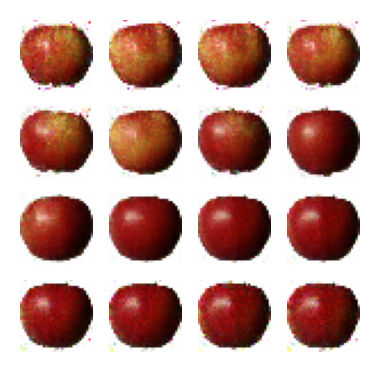

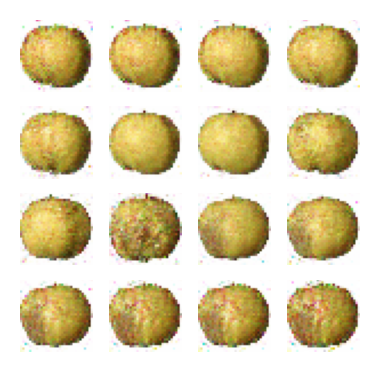

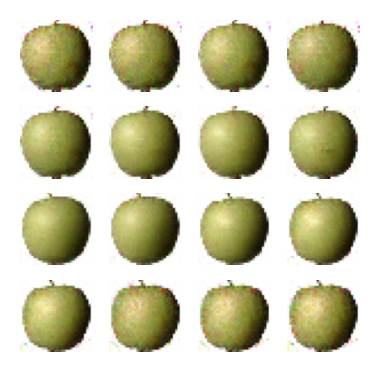

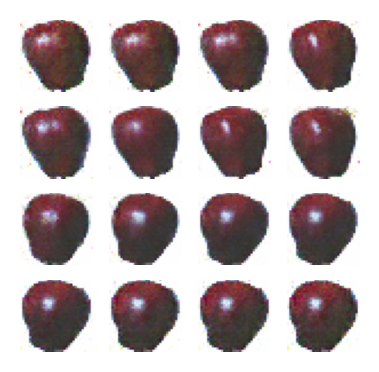

In [29]:
dpi = 200
num_imgs = 16
num_labels = len(apple_classes)

for label in range(num_labels):  
    code1 = 0
    code2 = 0
    p1 = True
    p2 = None    
    code1 = code1
    code2 = code2
    p1 = p1
    p2 = p2
    params = (label, num_labels, code1, code2, p1, p2)
    test_generator(generator, params, latent_size=my_latent_size, num_imgs=num_imgs, dpi=dpi)

Varying p2 and not p1

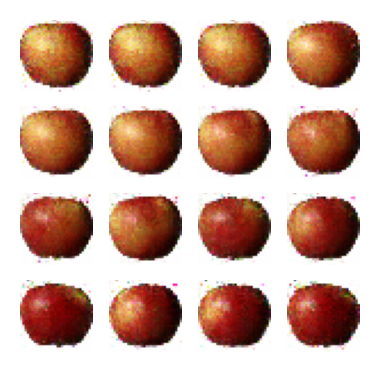

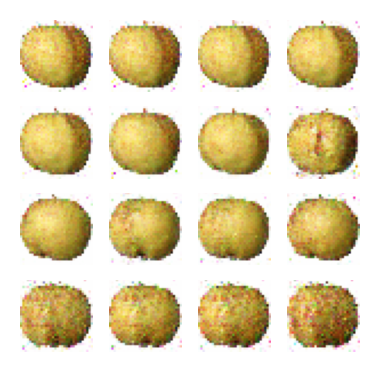

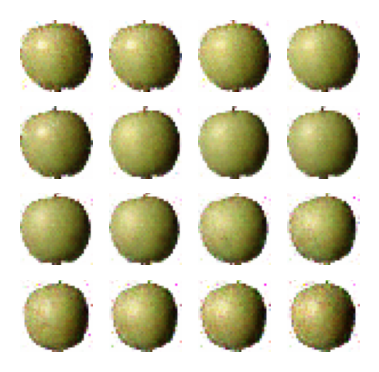

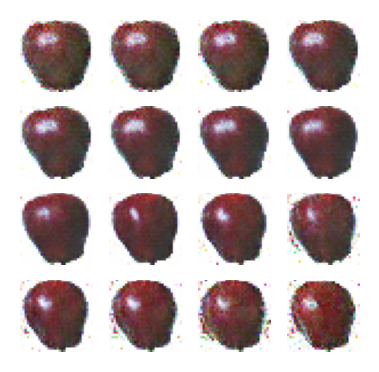

In [32]:
for label in range(num_labels):  
    code1 = -1
    code2 = 0
    p1 = None
    p2 = True    
    code1 = code1
    code2 = code2
    p1 = p1
    p2 = p2
    params = (label, num_labels, code1, code2, p1, p2)
    test_generator(generator, params, latent_size=my_latent_size, num_imgs=num_imgs, dpi=dpi)

## Final comments

Although I adapted the GAN network to work with RGB images (small changes), I did not change the architecture of the network much, so we are using a GAN designed primarily to work on the MNIST dataset

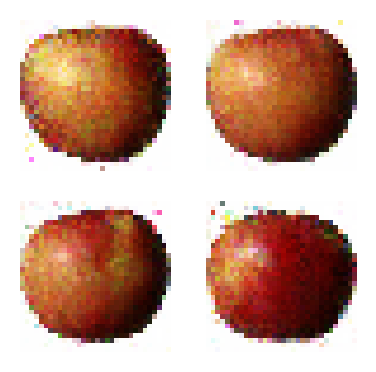

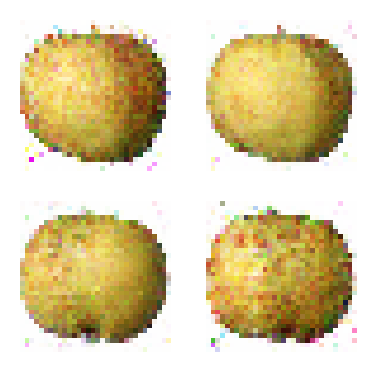

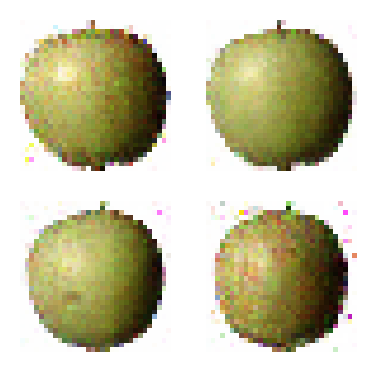

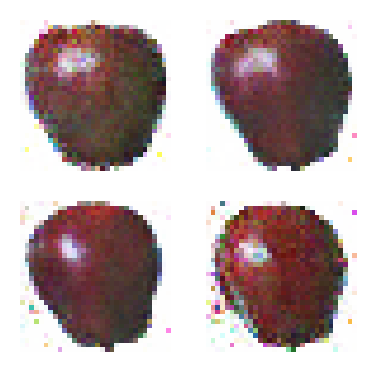

In [39]:
for label in range(num_labels):  
    code1 = -1
    code2 = 0
    p1 = None
    p2 = True    
    code1 = code1
    code2 = code2
    p1 = p1
    p2 = p2
    params = (label, num_labels, code1, code2, p1, p2)
    test_generator(generator, params, latent_size=my_latent_size, num_imgs=4, dpi=dpi)